# Predicting Default in P2P Lending: Leveraging Supervised Machine Learning and Macroeconomic Factors for Enhanced Risk Assessment

## Part One: Random Undersampling

## Data Collection

In [517]:
%reset -f

In [518]:
# Importing the required libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import os #??
import hvplot.pandas
import gc

In [519]:
# Reading the LendingClub Loan Data
df_loans = pd.read_csv(r"C:/Users/Lawrence/Documents/Master Digital Driven Business/Master Thesis/Python Research Folder/loan.csv")

Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.


In [520]:
# Reading the change in GDP Data per State
df_dGDP = pd.read_csv(r"C:/Users/Lawrence/Documents/Master Digital Driven Business/Master Thesis/Python Research Folder/Change in GDP.csv")

In [521]:
# Reading the change in Real GDP per State
df_dRGDP = pd.read_csv(r"C:/Users/Lawrence/Documents/Master Digital Driven Business/Master Thesis/Python Research Folder/Change in Real GDP.csv")

In [522]:
# Reading the Unemployment rate per State
df_unemp = pd.read_csv(r"C:/Users/Lawrence/Documents/Master Digital Driven Business/Master Thesis/Python Research Folder/Unemployment rate per state per month.csv")

In [523]:
# Reading the CPI per census region
df_CPI = pd.read_csv(r"C:/Users/Lawrence/Documents/Master Digital Driven Business/Master Thesis/Python Research Folder/CPI per census region.csv")

In [524]:
# Reading the Russell 2000 index
df_Russell = pd.read_csv(r"C:/Users/Lawrence/Documents/Master Digital Driven Business/Master Thesis/Python Research Folder/Russel 2000 index.csv")

In [525]:
# Reading the FED interest rates
df_fed = pd.read_csv(r"C:/Users/Lawrence/Documents/Master Digital Driven Business/Master Thesis/Python Research Folder/FEDFUNDS.csv")

### Data Understanding

LendingClub Loan Data

In [526]:
df_loans.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0 NaN        NaN       2500         2500           2500.0   36 months   
1 NaN        NaN      30000        30000          30000.0   60 months   
2 NaN        NaN       5000         5000           5000.0   36 months   
3 NaN        NaN       4000         4000           4000.0   36 months   
4 NaN        NaN      30000        30000          30000.0   60 months   

   int_rate  installment grade sub_grade  ... hardship_payoff_balance_amount  \
0     13.56        84.92     C        C1  ...                            NaN   
1     18.94       777.23     D        D2  ...                            NaN   
2     17.97       180.69     D        D1  ...                            NaN   
3     18.94       146.51     D        D2  ...                            NaN   
4     16.14       731.78     C        C4  ...                            NaN   

  hardship_last_payment_amount disbursement_method  debt_settlement_flag  \
0                          NaN                Cash                     N   
1                          NaN                Cash                     N   
2                          NaN                Cash                     N   
3                          NaN                Cash                     N   
4                          NaN                Cash                     N   

  debt_settlement_flag_date settlement_status settlement_date  \
0                       NaN               NaN             NaN   
1                       NaN               NaN             NaN   
2                       NaN               NaN             NaN   
3                       NaN               NaN             NaN   
4                       NaN               NaN             NaN   

  settlement_amount  settlement_percentage settlement_term  
0               NaN                    NaN             NaN  
1               NaN                    NaN             NaN  
2               NaN                    NaN             NaN  
3               NaN                    NaN             NaN  
4               NaN                    NaN             NaN  

[5 rows x 145 columns]

In [527]:
num_rows = df_loans.shape[0]
print("Number of rows: ", num_rows)

Number of rows:  2260668


Change in GDP per State year over year

In [528]:
df_dGDP.head(5)

addr_state  dGDP0607  dGDP0708  dGDP0809  dGDP0910  dGDP1011  dGDP1112  \
0         AL       3.9       0.9      -2.1       3.7       3.8       2.9   
1         AK      10.0      11.2      -9.4       6.8       6.7       2.4   
2         AZ       6.3       0.6      -6.3       1.9       3.9       4.0   
3         AR       2.6       1.3      -2.2       4.1       4.2       2.6   
4         CA       4.8       2.4      -2.8       3.4       3.6       4.4   

   dGDP1213  
0       2.9  
1      -1.8  
2       2.6  
3       4.4  
4       5.1

Change in Real GDP year over year

In [529]:
df_dRGDP.head(5)

addr_state  dRGDP0607  dRGDP0708  dRGDP0809  dRGDP0910  dRGDP1011  \
0         AL        0.9       -1.1       -3.3        2.2        1.6   
1         AK        5.1       -0.9        9.7       -2.9        1.2   
2         AZ        3.3       -0.9       -8.3        1.1        2.2   
3         AR       -0.8       -1.0       -3.3        2.6        2.1   
4         CA        1.9        1.0       -3.2        2.0        1.4   

   dRGDP1112  dRGDP1213  
0        0.9        1.1  
1        5.4       -5.0  
2        2.0        0.8  
3        0.5        2.1  
4        2.4        3.1

Unemployment rate per month per state

In [530]:
df_unemp.head()

addr_state  Dec/06  Jan/07  Feb/07  Mar/07  Apr/07  May/07  Jun/07  Jul/07  \
0         AL     3.8     3.8     3.8     3.9     3.9     3.9     4.0     4.0   
1         AK     6.3     6.3     6.2     6.2     6.2     6.2     6.3     6.3   
2         AZ     4.0     3.9     3.9     3.8     3.7     3.6     3.5     3.5   
3         AR     5.3     5.3     5.3     5.3     5.3     5.4     5.5     5.5   
4         CA     4.9     4.9     5.0     5.0     5.1     5.1     5.2     5.3   

   Aug/07  ...  Mar/13  Apr/13  May/13  Jun/13  Jul/13  Aug/13  Sep/13  \
0     4.1  ...     7.5     7.4     7.3     7.3     7.2     7.2     7.2   
1     6.3  ...     7.0     7.0     7.0     7.0     7.0     7.0     7.0   
2     3.5  ...     8.0     8.0     7.9     7.9     7.8     7.8     7.7   
3     5.5  ...     7.2     7.2     7.2     7.1     7.1     7.1     7.0   
4     5.4  ...     9.4     9.3     9.2     9.1     9.0     8.9     8.8   

   Oct/13  Nov/13  Dec/13  
0     7.2     7.2     7.2  
1     7.0     6.9     6.9  
2     7.6     7.5     7.4  
3     6.9     6.7     6.6  
4     8.6     8.5     8.4  

[5 rows x 86 columns]

Consumer Price Index per month per census region

In [531]:
df_CPI.head()

census_region  Dec/06   Jan/07   Feb/07   Mar/07   Apr/07   May/07   Jun/07  \
0     Northeast   215.2  215.813  216.651  218.334  219.501  220.591  221.579   
1       Midwest   192.9  193.068  194.458  196.389  197.405  199.194  199.263   
2         South   194.8  195.021  195.950  197.904  199.618  200.804  201.675   
3          West   206.2  207.790  208.995  210.778  212.036  213.063  212.680   

    Jul/07   Aug/07  ...   Mar/13   Apr/13   May/13   Jun/13   Jul/13  \
0  221.945  221.559  ...  248.719  248.464  248.584  248.851  249.411   
1  198.989  198.551  ...  222.121  221.931  223.049  223.775  222.902   
2  201.571  201.041  ...  226.628  226.202  226.289  227.148  227.548   
3  212.542  212.406  ...  235.511  235.488  235.979  236.227  236.341   

    Aug/13   Sep/13   Oct/13   Nov/13   Dec/13  
0  249.858  250.231  249.320  249.503  249.567  
1  223.046  223.252  222.171  221.718  221.194  
2  227.837  227.876  227.420  226.811  227.082  
3  236.591  237.146  237.000  236.153  236.096  

[4 rows x 86 columns]

Russell 2000 Index per month

In [532]:
df_Russell.head()

Date      Open      High       Low    Close* Adj Close**  \
0  Dec 01, 2013  1,142.30  1,167.96  1,099.67  1,163.64    1,163.64   
1  Nov 01, 2013  1,099.09  1,147.00  1,079.08  1,142.89    1,142.89   
2  Oct 01, 2013  1,073.69  1,123.26  1,037.86  1,100.15    1,100.15   
3  Sep 01, 2013  1,019.48  1,082.00  1,009.00  1,073.79    1,073.79   
4  Aug 01, 2013  1,051.23  1,063.52  1,009.46  1,010.90    1,010.90   

           Volume  
0  64,958,820,000  
1  63,509,720,000  
2  76,627,760,000  
3  66,174,410,000  
4  64,802,810,000

Federal Interest Rate per day

In [533]:
df_fed.head()

DATE  FEDFUNDS
0  2007-01-01      5.25
1  2007-02-01      5.26
2  2007-03-01      5.26
3  2007-04-01      5.25
4  2007-05-01      5.25

## Data Cleaning

LendingClub Data

The id and member_id have been removed by the administrator of this data, pressumably to protect the identity and preserve anonymity of the borrower.

The original dataset contains 145 columns.

We will continue by removing all the unnecessary columns. 

In [534]:
# Create a list of columns to keep. These are the variables listed in Table 2.
cols_to_keep = ['grade', 'sub_grade', 'int_rate', 'purpose', 'loan_amnt', 'annual_inc', 
                'home_ownership', 'emp_length', 'earliest_cr_line', 'delinq_2yrs', 
                'inq_last_6mths', 'pub_rec', 'revol_util', 'open_acc', 'installment',
                'mths_since_last_delinq', 'dti', 'issue_d', 'term', 'addr_state', 'loan_status']

# Drop other columns
df_loans1 = df_loans[cols_to_keep]

In [535]:
df_loans1.head(5)

grade sub_grade  int_rate             purpose  loan_amnt  annual_inc  \
0     C        C1     13.56  debt_consolidation       2500     55000.0   
1     D        D2     18.94  debt_consolidation      30000     90000.0   
2     D        D1     17.97  debt_consolidation       5000     59280.0   
3     D        D2     18.94  debt_consolidation       4000     92000.0   
4     C        C4     16.14  debt_consolidation      30000     57250.0   

  home_ownership emp_length earliest_cr_line  delinq_2yrs  ...  pub_rec  \
0           RENT  10+ years         Apr-2001          0.0  ...      1.0   
1       MORTGAGE  10+ years         Jun-1987          0.0  ...      1.0   
2       MORTGAGE    6 years         Apr-2011          0.0  ...      0.0   
3       MORTGAGE  10+ years         Feb-2006          0.0  ...      0.0   
4       MORTGAGE  10+ years         Dec-2000          0.0  ...      0.0   

   revol_util  open_acc  installment  mths_since_last_delinq    dti   issue_d  \
0        10.3       9.0        84.92                     NaN  18.24  Dec-2018   
1        24.2      13.0       777.23                    71.0  26.52  Dec-2018   
2        19.1       8.0       180.69                     NaN  10.51  Dec-2018   
3        78.1      10.0       146.51                     NaN  16.74  Dec-2018   
4         3.6      12.0       731.78                     NaN  26.35  Dec-2018   

         term addr_state loan_status  
0   36 months         NY     Current  
1   60 months         LA     Current  
2   36 months         MI     Current  
3   36 months         WA     Current  
4   60 months         MD     Current  

[5 rows x 21 columns]

In [536]:
# Changing 'issue_d' to date format
df_loans1['issue_d'] = pd.to_datetime(df_loans1['issue_d'], format='%b-%Y')


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [537]:
# Checking all loan issue dates
df_loans1.sort_values(by='issue_d', inplace=True)
print(df_loans1['issue_d'].unique())

['2007-06-01T00:00:00.000000000' '2007-07-01T00:00:00.000000000'
 '2007-08-01T00:00:00.000000000' '2007-09-01T00:00:00.000000000'
 '2007-10-01T00:00:00.000000000' '2007-11-01T00:00:00.000000000'
 '2007-12-01T00:00:00.000000000' '2008-01-01T00:00:00.000000000'
 '2008-02-01T00:00:00.000000000' '2008-03-01T00:00:00.000000000'
 '2008-04-01T00:00:00.000000000' '2008-05-01T00:00:00.000000000'
 '2008-06-01T00:00:00.000000000' '2008-07-01T00:00:00.000000000'
 '2008-08-01T00:00:00.000000000' '2008-09-01T00:00:00.000000000'
 '2008-10-01T00:00:00.000000000' '2008-11-01T00:00:00.000000000'
 '2008-12-01T00:00:00.000000000' '2009-01-01T00:00:00.000000000'
 '2009-02-01T00:00:00.000000000' '2009-03-01T00:00:00.000000000'
 '2009-04-01T00:00:00.000000000' '2009-05-01T00:00:00.000000000'
 '2009-06-01T00:00:00.000000000' '2009-07-01T00:00:00.000000000'
 '2009-08-01T00:00:00.000000000' '2009-09-01T00:00:00.000000000'
 '2009-10-01T00:00:00.000000000' '2009-11-01T00:00:00.000000000'
 '2009-12-01T00:00:00.000


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [538]:
print(df_loans1['term'].unique())

[' 36 months' ' 60 months']


The first loan issued in this dataset was on June 2007, and last loan issued was on December 2018. 

The loan term is either 36 months or 60 months.

So, in order to avoid any current loans, we remove all loans issued from Jan 2014 and after.

In [539]:
# Filter out rows from 2014 to 2018
df_loans2 = df_loans1[(df_loans1['issue_d'].dt.year < 2014) | (df_loans1['issue_d'].dt.year > 2018)]

In [540]:
print(df_loans2['loan_status'].value_counts())

Fully Paid                                             192610
Charged Off                                             35336
Does not meet the credit policy. Status:Fully Paid       1988
Does not meet the credit policy. Status:Charged Off       761
Current                                                     9
Late (31-120 days)                                          8
Late (16-30 days)                                           2
In Grace Period                                             2
Name: loan_status, dtype: int64


There are still 21 loans that have not fully matured yet, we can remove these loans without major consequences.

Loans that say: 'Does not meet the credit policy', have been granted a loan in the past, but would not meet the criteria for a loan today.

Only loans that are eligible for a loan today are relevant, so we remove the rest.

In [541]:
# Keep only 'Fully Paid' and 'Charged Off' loans
df_loans3 = df_loans2[(df_loans2['loan_status'] == 'Fully Paid') | (df_loans2['loan_status'] == 'Charged Off')]

In [542]:
df_loans3.head()

grade sub_grade  int_rate             purpose  loan_amnt  annual_inc  \
2139270     E        E2     13.75  debt_consolidation       7500     22000.0   
2139264     A        A2      7.43         credit_card       5000     85000.0   
2139247     B        B5      9.96         educational       3500     13500.0   
2139246     B        B2      9.01               other       5000    250000.0   
2139245     F        F4     15.96  debt_consolidation       2700     52200.0   

        home_ownership emp_length earliest_cr_line  delinq_2yrs  ...  pub_rec  \
2139270            OWN   < 1 year         Oct-2003          1.0  ...      0.0   
2139264            OWN     1 year         Oct-1997          0.0  ...      0.0   
2139247           RENT   < 1 year         Dec-2002          0.0  ...      0.0   
2139246       MORTGAGE     1 year         Apr-2003          2.0  ...      0.0   
2139245           RENT     1 year         Aug-2003          0.0  ...      0.0   

         revol_util  open_acc  installment  mths_since_last_delinq    dti  \
2139270        51.5       7.0       255.43                    11.0  14.29   
2139264         0.6       7.0       155.38                     0.0   0.31   
2139247        41.1      10.0       112.87                     0.0  16.44   
2139246        36.6       5.0       159.03                     5.0  10.00   
2139245        92.3      12.0        94.88                     0.0  12.57   

           issue_d        term addr_state loan_status  
2139270 2007-06-01   36 months         MA  Fully Paid  
2139264 2007-07-01   36 months         WI  Fully Paid  
2139247 2007-07-01   36 months         FL  Fully Paid  
2139246 2007-07-01   36 months         NY  Fully Paid  
2139245 2007-07-01   36 months         MA  Fully Paid  

[5 rows x 21 columns]

We will now check for missing values, and remove them if it is not a significant number.

In [543]:
# Count NaN values per column
nan_counts = df_loans3.isna().sum()

print(nan_counts)

grade                          0
sub_grade                      0
int_rate                       0
purpose                        0
loan_amnt                      0
annual_inc                     0
home_ownership                 0
emp_length                  8964
earliest_cr_line               0
delinq_2yrs                    0
inq_last_6mths                 0
pub_rec                        0
revol_util                   175
open_acc                       0
installment                    0
mths_since_last_delinq    133292
dti                            0
issue_d                        0
term                           0
addr_state                     0
loan_status                    0
dtype: int64


In [544]:
# Count NaN values per column
nan_counts1 = df_loans3.isna().sum()

# Calculate percentage of total
nan_percentage = (nan_counts1 / len(df_loans3)) * 100

print(nan_percentage)

grade                      0.000000
sub_grade                  0.000000
int_rate                   0.000000
purpose                    0.000000
loan_amnt                  0.000000
annual_inc                 0.000000
home_ownership             0.000000
emp_length                 3.932510
earliest_cr_line           0.000000
delinq_2yrs                0.000000
inq_last_6mths             0.000000
pub_rec                    0.000000
revol_util                 0.076773
open_acc                   0.000000
installment                0.000000
mths_since_last_delinq    58.475253
dti                        0.000000
issue_d                    0.000000
term                       0.000000
addr_state                 0.000000
loan_status                0.000000
dtype: float64


While analyzing the dataset, it was observed that 'Employment Length' had approximately 3.93% missing values and 'Revolving Utilisation' had around 0.1% missing values. Given the relatively low percentage of missing data in these categories, their removal is unlikely to significantly impact the validity or accuracy of subsequent analyses.

On the other hand, 'Months since last delinquency' presented a much more substantial missing data issue, with approximately 58.5% of its values missing. Such a high level of missing data could introduce bias if not handled appropriately. However, studies by Serrano-Cinca, Gutiérrez-Nieto, & López-Palacios (2015) and Emekter, Tu, Jirasakuldech, & Lu (2015) suggest that this variable does not significantly contribute to the prediction of loan defaults.

Therefore, to maintain the robustness of the dataset and avoid potential bias, the 'Months since last delinquency' column will be dropped entirely. This decision not only preserves the maximum number of rows for analysis but also ensures the robustness of future predictive models developed from this dataset.

In [545]:
df_loans4 = df_loans3.drop(columns=['mths_since_last_delinq']).dropna(subset=['revol_util']).dropna(subset=['emp_length'])

nan_counts1 = df_loans4.isna().sum()

print(nan_counts1)

grade               0
sub_grade           0
int_rate            0
purpose             0
loan_amnt           0
annual_inc          0
home_ownership      0
emp_length          0
earliest_cr_line    0
delinq_2yrs         0
inq_last_6mths      0
pub_rec             0
revol_util          0
open_acc            0
installment         0
dti                 0
issue_d             0
term                0
addr_state          0
loan_status         0
dtype: int64


In [546]:
# Checking data types
df_loans4.dtypes

grade                       object
sub_grade                   object
int_rate                   float64
purpose                     object
loan_amnt                    int64
annual_inc                 float64
home_ownership              object
emp_length                  object
earliest_cr_line            object
delinq_2yrs                float64
inq_last_6mths             float64
pub_rec                    float64
revol_util                 float64
open_acc                   float64
installment                float64
dti                        float64
issue_d             datetime64[ns]
term                        object
addr_state                  object
loan_status                 object
dtype: object

In [547]:
# Changing types 
df_loans4['annual_inc'] = df_loans4['annual_inc'].astype(int)
df_loans4['earliest_cr_line'] = pd.to_datetime(df_loans1['earliest_cr_line'], format='%b-%Y')
df_loans4['delinq_2yrs'] = df_loans4['delinq_2yrs'].astype(int)
df_loans4['inq_last_6mths'] = df_loans4['inq_last_6mths'].astype(int)
df_loans4['pub_rec'] = df_loans4['pub_rec'].astype(int)
df_loans4['revol_util'] = df_loans4['revol_util'].astype(int)
df_loans4['open_acc'] = df_loans4['open_acc'].astype(int)

In [548]:
df_loans4.head()

grade sub_grade  int_rate             purpose  loan_amnt  annual_inc  \
2139270     E        E2     13.75  debt_consolidation       7500       22000   
2139264     A        A2      7.43         credit_card       5000       85000   
2139247     B        B5      9.96         educational       3500       13500   
2139246     B        B2      9.01               other       5000      250000   
2139245     F        F4     15.96  debt_consolidation       2700       52200   

        home_ownership emp_length earliest_cr_line  delinq_2yrs  \
2139270            OWN   < 1 year       2003-10-01            1   
2139264            OWN     1 year       1997-10-01            0   
2139247           RENT   < 1 year       2002-12-01            0   
2139246       MORTGAGE     1 year       2003-04-01            2   
2139245           RENT     1 year       2003-08-01            0   

         inq_last_6mths  pub_rec  revol_util  open_acc  installment    dti  \
2139270               0        0          51         7       255.43  14.29   
2139264               0        0           0         7       155.38   0.31   
2139247               1        0          41        10       112.87  16.44   
2139246               0        0          36         5       159.03  10.00   
2139245               1        0          92        12        94.88  12.57   

           issue_d        term addr_state loan_status  
2139270 2007-06-01   36 months         MA  Fully Paid  
2139264 2007-07-01   36 months         WI  Fully Paid  
2139247 2007-07-01   36 months         FL  Fully Paid  
2139246 2007-07-01   36 months         NY  Fully Paid  
2139245 2007-07-01   36 months         MA  Fully Paid

In [549]:
# Checking for duplicate loans
df_loans4.duplicated().sum()

0

In [550]:
print(df_loans4.loan_status.value_counts())

Fully Paid     185304
Charged Off     33509
Name: loan_status, dtype: int64


## Remaining Data Description

Grade                       -
Sub_grade                    -
Int_rate                    -
Purpose                     -
Loan_amnt                   -
Annual_inc                  -
Home_ownership              -
Emp_length                  -
Earliest_cr_line            -
Delinq_2yrs                 -
Inq_last_6mths              -
Pub_rec                     -
Revol_util                  -
Open_acc                    -
Installment                 -
Mths_since_last_delinq      -
Dti                         -
Issue_d                     -
Term                        -
Addr_state                  -
Loan_status                 -

Change in GDP per state per year

In [551]:
df_dGDP.isna().sum()

addr_state    0
dGDP0607      0
dGDP0708      0
dGDP0809      0
dGDP0910      0
dGDP1011      0
dGDP1112      0
dGDP1213      0
dtype: int64

In [552]:
df_dGDP.dtypes

addr_state     object
dGDP0607      float64
dGDP0708      float64
dGDP0809      float64
dGDP0910      float64
dGDP1011      float64
dGDP1112      float64
dGDP1213      float64
dtype: object

Change in Real GDP per state per year

In [553]:
df_dRGDP.isna().sum()

addr_state    0
dRGDP0607     0
dRGDP0708     0
dRGDP0809     0
dRGDP0910     0
dRGDP1011     0
dRGDP1112     0
dRGDP1213     0
dtype: int64

In [554]:
df_dRGDP.dtypes

addr_state     object
dRGDP0607     float64
dRGDP0708     float64
dRGDP0809     float64
dRGDP0910     float64
dRGDP1011     float64
dRGDP1112     float64
dRGDP1213     float64
dtype: object

Russell 200 Index per month

In [555]:
df_Russell.isna().sum()

Date           1676
Open           1677
High           1677
Low            1677
Close*         1677
Adj Close**    1677
Volume         1677
dtype: int64

In [556]:
df_Russell = df_Russell.dropna()

In [557]:
# Convert 'Date' to datetime
df_Russell['Date'] = pd.to_datetime(df_Russell['Date'])

# Convert numeric columns to appropriate dtypes
cols = ['Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume']
for col in cols:
    df_Russell[col] = pd.to_numeric(df_Russell[col].str.replace(',', ''), errors='coerce')

df_Russell.dtypes

Date           datetime64[ns]
Open                  float64
High                  float64
Low                   float64
Close*                float64
Adj Close**           float64
Volume                  int64
dtype: object

In [558]:
df_Russell.head()

Date     Open     High      Low   Close*  Adj Close**       Volume
0 2013-12-01  1142.30  1167.96  1099.67  1163.64      1163.64  64958820000
1 2013-11-01  1099.09  1147.00  1079.08  1142.89      1142.89  63509720000
2 2013-10-01  1073.69  1123.26  1037.86  1100.15      1100.15  76627760000
3 2013-09-01  1019.48  1082.00  1009.00  1073.79      1073.79  66174410000
4 2013-08-01  1051.23  1063.52  1009.46  1010.90      1010.90  64802810000

Federal Funds Rate

In [559]:
df_fed.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      DATE  FEDFUNDS
0   False     False
1   False     False
2   False     False
3   False     False
4   False     False
5   False     False
6   False     False
7   False     False
8   False     False
9   False     False
10  False     False
11  False     False
12  False     False
13  False     False
14  False     False
15  False     False
16  False     False
17  False     False
18  False     False
19  False     False
20  False     False
21  False     False
22  False     False
23  False     False
24  False     False
25  False     False
26  False     False
27  False     False
28  False     False
29  False     False
30  False     False
31  False     False
32  False     False
33  False     False
34  False     False
35  False     False
36  False     False
37  False     False
38  False     False
39  False     False
40  False     False
41  False     False
42  False     False
43  False     False
44  False     False
45  False     Fals

In [560]:
df_fed.head()

DATE  FEDFUNDS
0  2007-01-01      5.25
1  2007-02-01      5.26
2  2007-03-01      5.26
3  2007-04-01      5.25
4  2007-05-01      5.25

In [561]:
df_fed.dtypes

DATE         object
FEDFUNDS    float64
dtype: object

In [562]:
# Converting DATE column from object to datetime
df_fed['DATE'] = pd.to_datetime(df_fed['DATE'])

### Integrating Macroeconomic Variables

Merging the loan dataset with the change in GDP dataset based on state and issue date

In [563]:
df2_melted = df_dGDP.melt(id_vars='addr_state', var_name='year', value_name='dGDP')

df2_melted['year'] = df2_melted['year'].str[-2:].map({'07': '2007', '08': '2008', '09': '2009', '10': '2010', '11': '2011', '12': '2012', '13': '2013'})

df_loans4['year'] = pd.DatetimeIndex(df_loans4['issue_d']).year.astype(str)

df_merged = pd.merge(df_loans4, df2_melted, left_on=['addr_state', 'year'], right_on=['addr_state', 'year'], how='left')

In [564]:
df3_melted = df_dRGDP.melt(id_vars='addr_state', var_name='year', value_name='dRGDP')

df3_melted['year'] = df3_melted['year'].str[-2:].map({'07': '2007', '08': '2008', '09': '2009', '10': '2010', '11': '2011', '12': '2012', '13': '2013'})

df_merged = pd.merge(df_merged, df3_melted, left_on=['addr_state', 'year'], right_on=['addr_state', 'year'], how='left')

In [565]:
# Merge the datasets on their date fields
df_merged = pd.merge(df_merged, df_Russell[['Date', 'Volume']], left_on='issue_d', right_on='Date', how='left')

In [566]:
df_merged# Rename the 'Volume' column to 'russell_vol'
df_merged = df_merged.rename(columns={'Volume': 'russell_vol'})

In [567]:
df4_melted = df_unemp.melt(id_vars='addr_state', var_name='month_year', value_name='unempl_rate')

df4_melted['month_year'] = pd.to_datetime(df4_melted['month_year'], format='%b/%y')

df4_melted['year'] = df4_melted['month_year'].dt.year.astype(str)

df4_melted['month'] = df4_melted['month_year'].dt.month

df_merged['month'] = df_merged['issue_d'].dt.month

df_merged = pd.merge(df_merged, df4_melted, left_on=['addr_state', 'year', 'month'], right_on=['addr_state', 'year', 'month'], how='left')

In [568]:
df_merged.head()

grade sub_grade  int_rate             purpose  loan_amnt  annual_inc  \
0     E        E2     13.75  debt_consolidation       7500       22000   
1     A        A2      7.43         credit_card       5000       85000   
2     B        B5      9.96         educational       3500       13500   
3     B        B2      9.01               other       5000      250000   
4     F        F4     15.96  debt_consolidation       2700       52200   

  home_ownership emp_length earliest_cr_line  delinq_2yrs  ...  addr_state  \
0            OWN   < 1 year       2003-10-01            1  ...          MA   
1            OWN     1 year       1997-10-01            0  ...          WI   
2           RENT   < 1 year       2002-12-01            0  ...          FL   
3       MORTGAGE     1 year       2003-04-01            2  ...          NY   
4           RENT     1 year       2003-08-01            0  ...          MA   

   loan_status  year  dGDP  dRGDP       Date  russell_vol month month_year  \
0   Fully Paid  2007   5.4    2.8 2007-06-01  65322800000     6 2007-06-01   
1   Fully Paid  2007   3.5    0.6 2007-07-01  70337430000     7 2007-07-01   
2   Fully Paid  2007   4.3    1.2 2007-07-01  70337430000     7 2007-07-01   
3   Fully Paid  2007   4.1    0.8 2007-07-01  70337430000     7 2007-07-01   
4   Fully Paid  2007   5.4    2.8 2007-07-01  70337430000     7 2007-07-01   

  unempl_rate  
0         4.5  
1         4.9  
2         3.3  
3         4.5  
4         4.5  

[5 rows x 28 columns]

In [569]:
# Melt the second additional dataset and convert the 'month_year' column to datetime
df5_melted = pd.melt(df_CPI, id_vars=['census_region'], var_name='month_year', value_name='cpi')
df5_melted['month_year'] = pd.to_datetime(df5_melted['month_year'], format='%b/%y')
df5_melted['year'] = df5_melted['month_year'].dt.year
df5_melted['month'] = df5_melted['month_year'].dt.month

# Now we have a state-to-region mapping dataset
state_to_region = {
    'CT': 'Northeast', 'ME': 'Northeast', 'MA': 'Northeast',
    'NH': 'Northeast', 'RI': 'Northeast', 'VT': 'Northeast',
    'NJ': 'Northeast', 'NY': 'Northeast', 'PA': 'Northeast',
    'IL': 'Midwest', 'IN': 'Midwest', 'MI': 'Midwest',
    'OH': 'Midwest', 'WI': 'Midwest', 'IA': 'Midwest',
    'KS': 'Midwest', 'MN': 'Midwest', 'MO': 'Midwest',
    'NE': 'Midwest', 'ND': 'Midwest', 'SD': 'Midwest',
    'DE': 'South', 'FL': 'South', 'GA': 'South',
    'MD': 'South', 'NC': 'South', 'SC': 'South',
    'VA': 'South', 'DC': 'South', 'WV': 'South',
    'AL': 'South', 'KY': 'South', 'MS': 'South',
    'TN': 'South', 'AR': 'South', 'LA': 'South',
    'OK': 'South', 'TX': 'South', 'AZ': 'West', 'CO': 'West',
    'ID': 'West', 'MT': 'West', 'NV': 'West', 'NM': 'West',
    'UT': 'West', 'WY': 'West', 'AK': 'West', 'CA': 'West',
    'HI': 'West', 'OR': 'West', 'WA': 'West'
}

# Map states in the main dataset to regions
df_merged['census_region'] = df_merged['addr_state'].map(state_to_region)

# Convert 'year' and 'month' in the main dataframe to int64
df_merged['year'] = df_merged['year'].astype('int64')
df_merged['month'] = df_merged['month'].astype('int64')

# Merge the reshaped second additional dataset with the main dataset
df_merged = pd.merge(df_merged, df5_melted,  how='left', left_on=['census_region','year','month'], right_on = ['census_region','year','month'])


In [570]:
# Converting datetime object from Fed interest rate to match issue_d
df_fed['DATE'] = pd.to_datetime(df_fed['DATE'])
df_merged['issue_d'] = pd.to_datetime(df_merged['issue_d'])

# Perform the merge
df_merged = pd.merge(df_merged, df_fed, left_on='issue_d', right_on='DATE', how='left')


In [571]:
df_merged = df_merged.drop(columns=['year', 'month', 'month_year_x', 'month_year_y', 'Date', 'DATE'])
df_merged = df_merged.rename(columns={'FEDFUNDS': 'fed_funds'})


In [572]:
df_merged.head()

grade sub_grade  int_rate             purpose  loan_amnt  annual_inc  \
0     E        E2     13.75  debt_consolidation       7500       22000   
1     A        A2      7.43         credit_card       5000       85000   
2     B        B5      9.96         educational       3500       13500   
3     B        B2      9.01               other       5000      250000   
4     F        F4     15.96  debt_consolidation       2700       52200   

  home_ownership emp_length earliest_cr_line  delinq_2yrs  ...        term  \
0            OWN   < 1 year       2003-10-01            1  ...   36 months   
1            OWN     1 year       1997-10-01            0  ...   36 months   
2           RENT   < 1 year       2002-12-01            0  ...   36 months   
3       MORTGAGE     1 year       2003-04-01            2  ...   36 months   
4           RENT     1 year       2003-08-01            0  ...   36 months   

   addr_state  loan_status  dGDP  dRGDP  russell_vol unempl_rate  \
0          MA   Fully Paid   5.4    2.8  65322800000         4.5   
1          WI   Fully Paid   3.5    0.6  70337430000         4.9   
2          FL   Fully Paid   4.3    1.2  70337430000         3.3   
3          NY   Fully Paid   4.1    0.8  70337430000         4.5   
4          MA   Fully Paid   5.4    2.8  70337430000         4.5   

  census_region      cpi fed_funds  
0     Northeast  221.579      5.25  
1       Midwest  198.989      5.26  
2         South  201.571      5.26  
3     Northeast  221.945      5.26  
4     Northeast  221.945      5.26  

[5 rows x 27 columns]

## Feature engineering

Creating a column for 'loan amount to annual income' and 'annual instalment to income'

In [573]:
# Create 'loan_to_income' column
df_merged['loan_to_income'] = df_merged['loan_amnt'] / df_merged['annual_inc']

# Create 'installment_to_income' column
df_merged['installment_to_income'] = df_merged['installment'] / df_merged['annual_inc']

In [575]:
# Convert 'earliest_cr_line' and 'issue_d' to datetime
df_merged['earliest_cr_line'] = pd.to_datetime(df_merged['earliest_cr_line'])
df_merged['issue_d'] = pd.to_datetime(df_merged['issue_d'])

# Compute the number of days since 'earliest_cr_line'
df_merged['days_since_earliest_cr_line'] = (df_merged['issue_d'] - df_merged['earliest_cr_line']).dt.days


# Exploratory Data Analysis

In [576]:
# Set the color theme for later use
basic = sns.color_palette()[0]
plt.style.use("dark_background")

In [577]:
df_merged.describe()

int_rate      loan_amnt    annual_inc    delinq_2yrs  \
count  218813.000000  218813.000000  2.188130e+05  218813.000000   
mean       13.890311   13919.163395  7.259485e+04       0.224626   
std         4.405709    8099.959218  5.467439e+04       0.673923   
min         5.420000     500.000000  4.000000e+03       0.000000   
25%        10.740000    8000.000000  4.500000e+04       0.000000   
50%        13.670000   12000.000000  6.200000e+04       0.000000   
75%        16.780000   19500.000000  8.700000e+04       0.000000   
max        26.060000   35000.000000  7.141778e+06      29.000000   

       inq_last_6mths        pub_rec     revol_util       open_acc  \
count   218813.000000  218813.000000  218813.000000  218813.000000   
mean         0.816775       0.093605      56.360253      10.746779   
std          1.039950       0.377855      24.275400       4.620698   
min          0.000000       0.000000       0.000000       1.000000   
25%          0.000000       0.000000      39.000000       7.000000   
50%          0.000000       0.000000      59.000000      10.000000   
75%          1.000000       0.000000      76.000000      13.000000   
max          8.000000      54.000000     140.000000      62.000000   

         installment            dti           dGDP          dRGDP  \
count  218813.000000  218813.000000  218813.000000  218813.000000   
mean      425.977742      16.363649       3.650872       1.614539   
std       241.560643       7.556504       1.795184       1.694974   
min         4.930000       0.000000     -15.300000      -9.000000   
25%       250.330000      10.710000       2.800000       0.700000   
50%       380.020000      16.100000       3.700000       1.600000   
75%       557.740000      21.770000       4.600000       2.600000   
max      1408.130000      34.990000      12.900000       9.700000   

        russell_vol    unempl_rate            cpi      fed_funds  \
count  2.188130e+05  218813.000000  218813.000000  218813.000000   
mean   7.501641e+10       7.972769     230.735677       0.134663   
std    1.210966e+10       1.615100      10.427944       0.240807   
min    5.780970e+10       2.600000     198.551000       0.070000   
25%    6.638818e+10       6.800000     223.109000       0.090000   
50%    7.175232e+10       7.900000     227.837000       0.100000   
75%    7.709800e+10       9.000000     236.341000       0.150000   
max    1.618436e+11      14.000000     250.231000       5.260000   

       loan_to_income  installment_to_income  days_since_earliest_cr_line  
count   218813.000000          218813.000000                218813.000000  
mean         0.214237               0.006616                  5495.107612  
std          0.111426               0.003388                  2498.785999  
min          0.000789               0.000024                  1095.000000  
25%          0.126415               0.003997                  3806.000000  
50%          0.200000               0.006218                  5052.000000  
75%          0.290909               0.008893                  6758.000000  
max          0.830000               0.026689                 23892.000000

<AxesSubplot:>

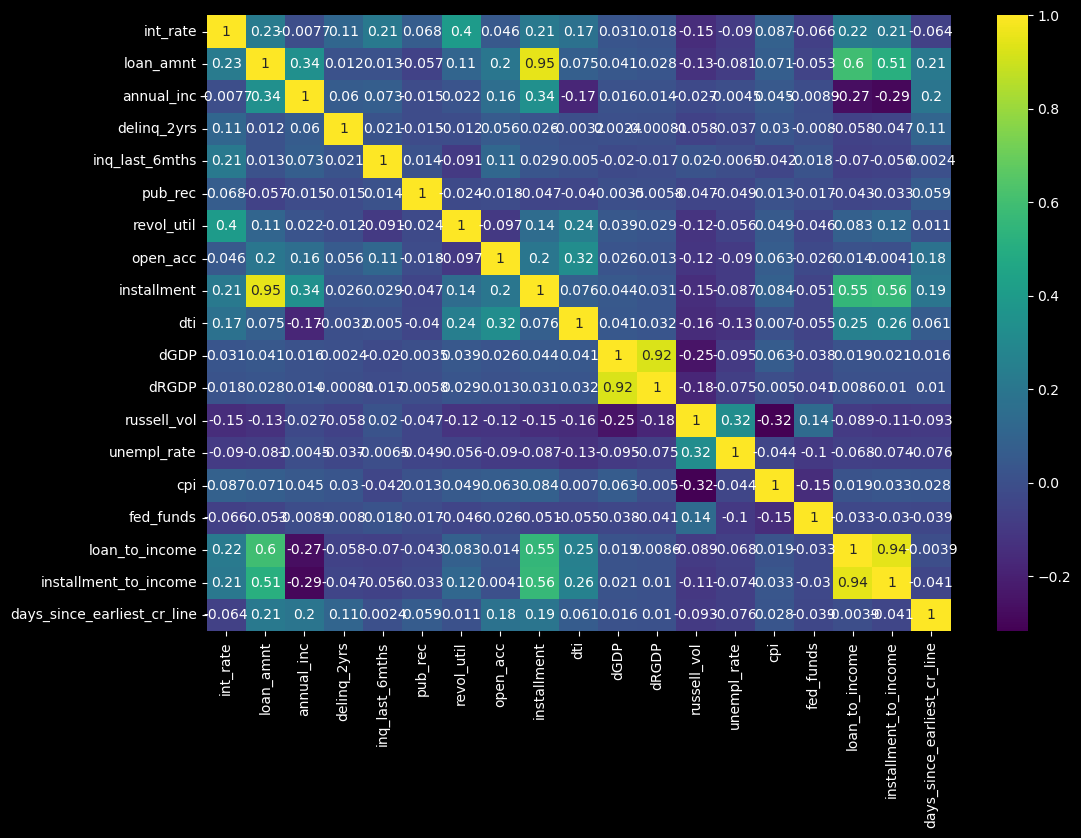

In [578]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_merged.corr(), annot=True, cmap='viridis')

Only installment and loan amount show a correlation of 0.95. In order to avoid multicollinearity, one of the variables should be dropped.

Other variables show no significant correlation to one and other.

### Histograms for all numerical variables

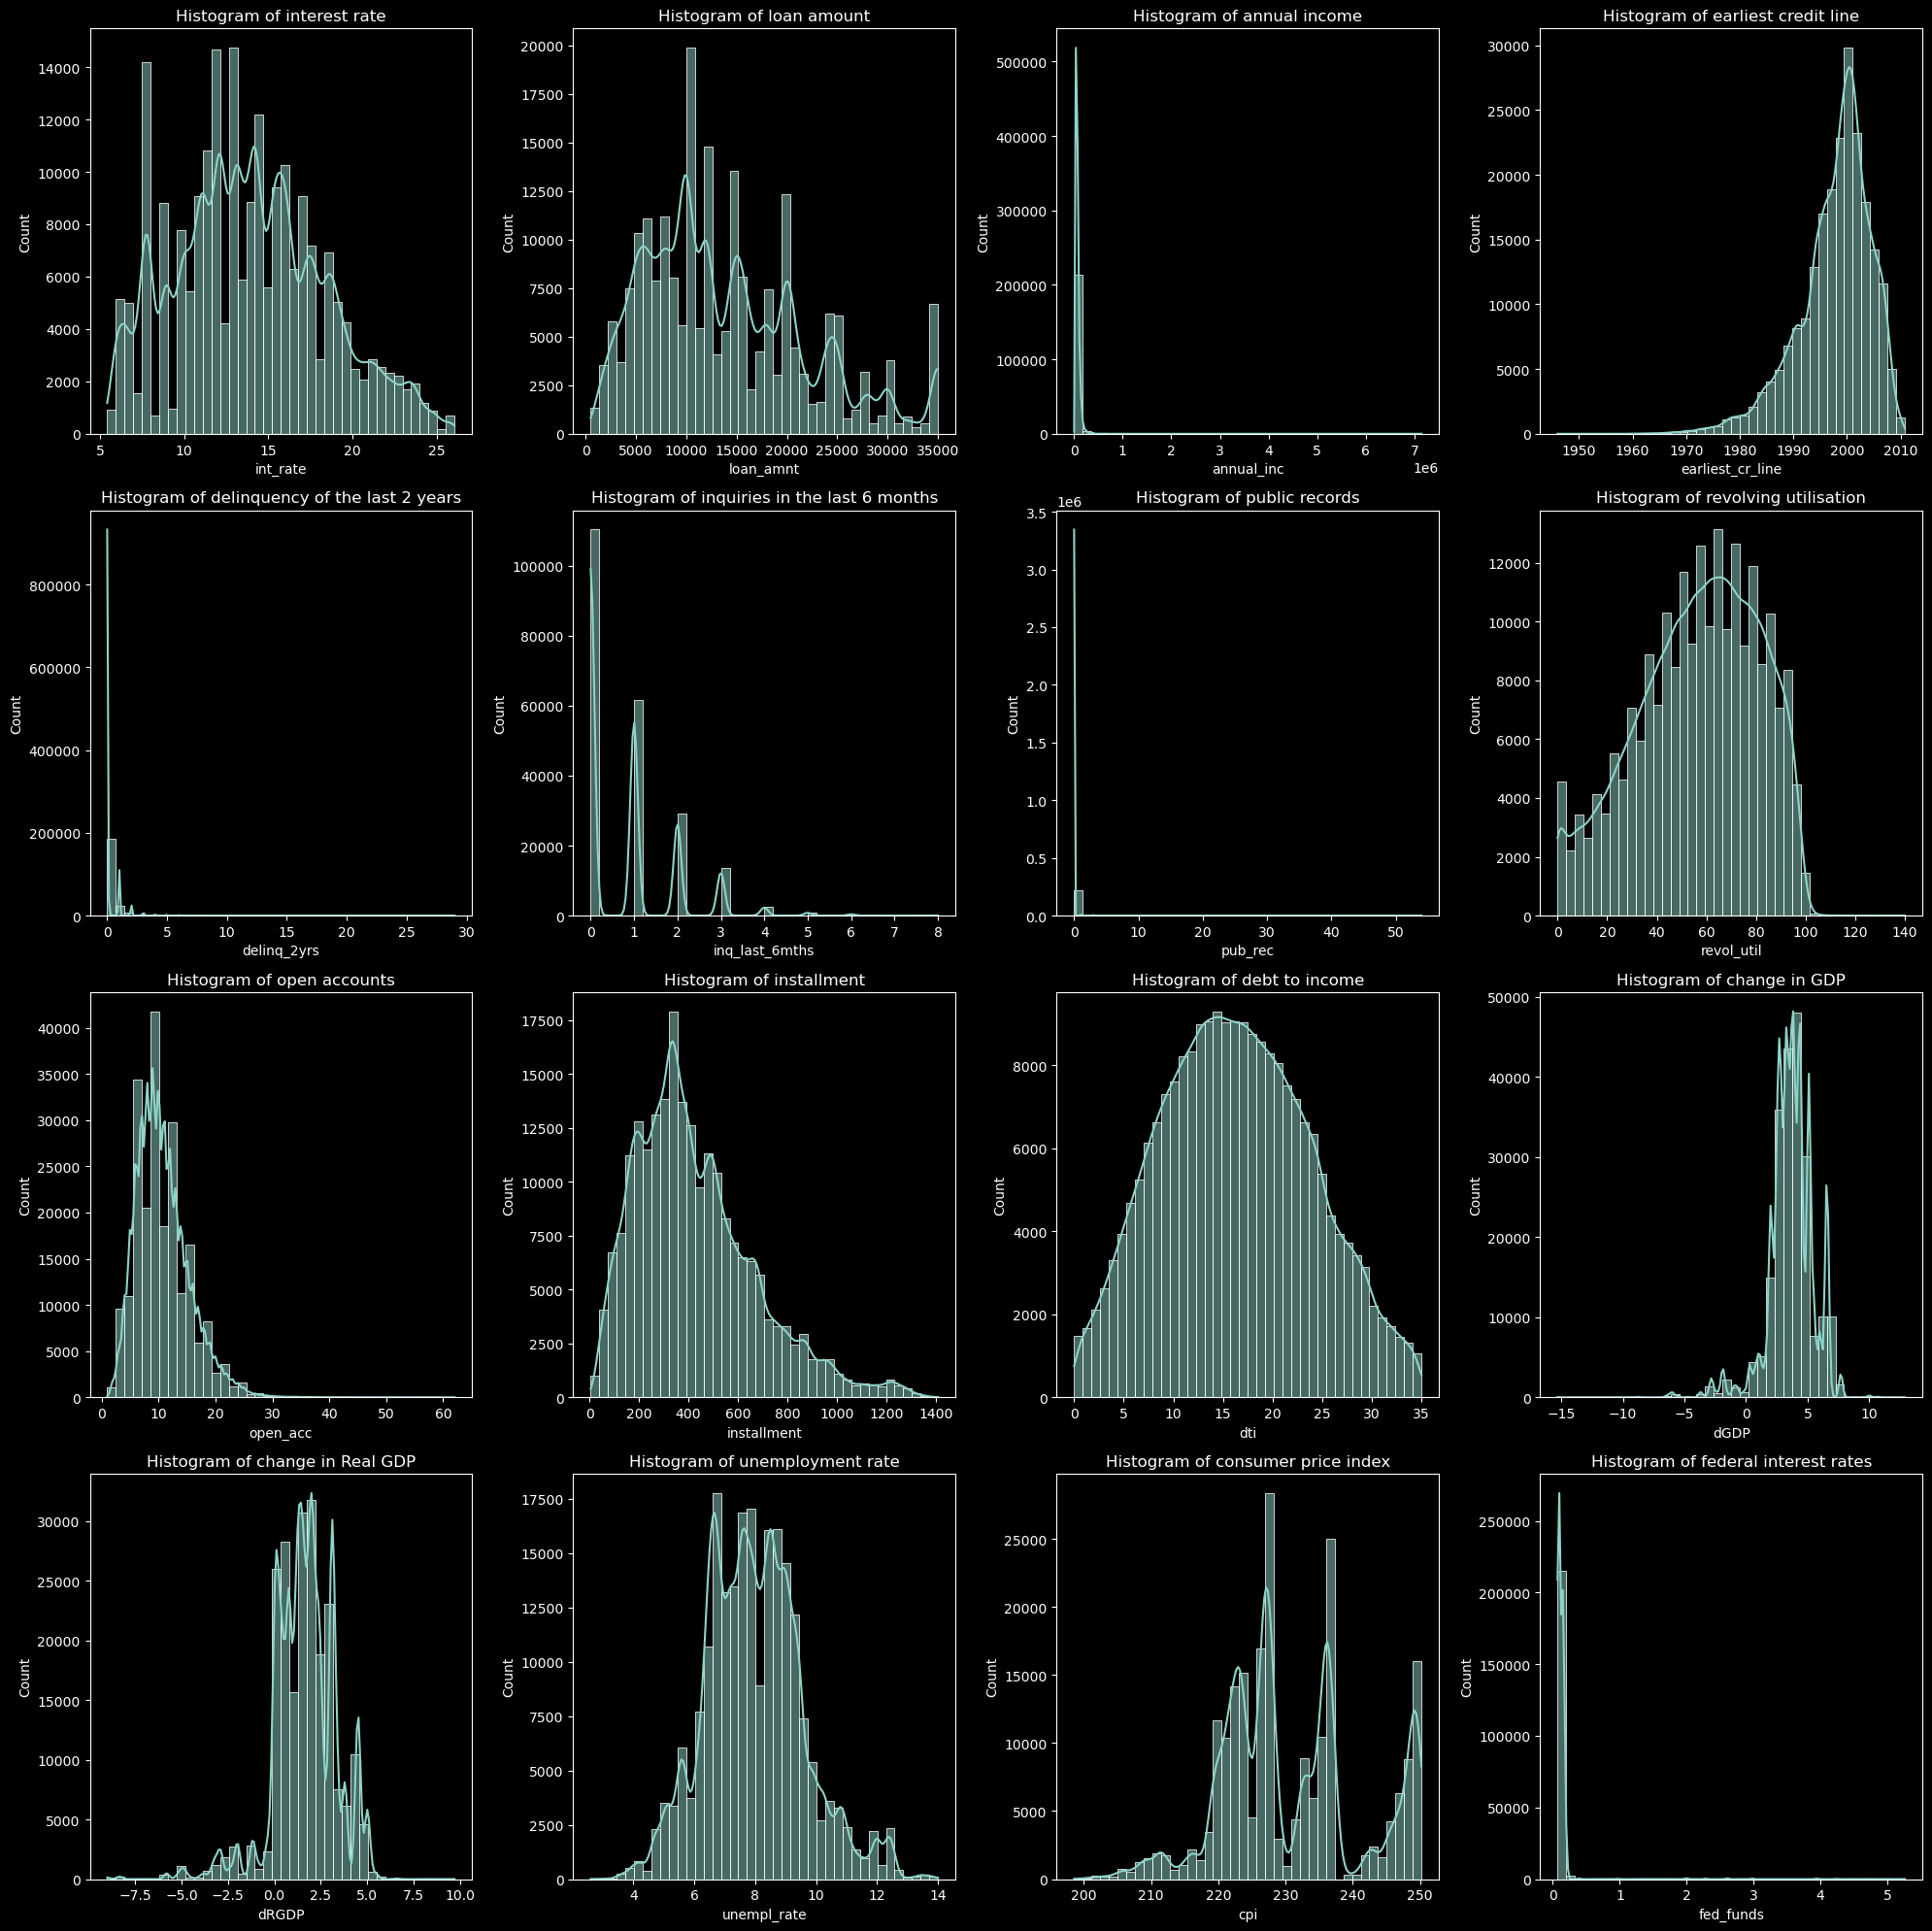

In [579]:
import seaborn as sns
import matplotlib.pyplot as plt

variables = ['int_rate', 'loan_amnt', 'annual_inc', 'earliest_cr_line', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'revol_util', 
             'open_acc', 'installment', 'dti', 'dGDP', 'dRGDP', 'unempl_rate', 'cpi', 'fed_funds']
titles = ['interest rate', 'loan amount', 'annual income', 'earliest credit line', 'delinquency of the last 2 years', 
          'inquiries in the last 6 months', 'public records', 'revolving utilisation', 'open accounts', 
          'installment', 'debt to income', 'change in GDP', 'change in Real GDP', 'unemployment rate', 
          'consumer price index', 'federal interest rates']

fig, axs = plt.subplots(4, 4, figsize=(20, 20))  # Create a grid of 4x4 subplots

for ax, var, title in zip(axs.ravel(), variables, titles):
    sns.histplot(data=df_merged, x=var, bins=40, kde=True, ax=ax)
    ax.set_title(f'Histogram of {title}')

plt.tight_layout()  # Ensure the subplots do not overlap
plt.show()


In [580]:
# Creat a column for listing year
df_merged['year'] = df_merged['issue_d'].dt.year 

# Creat a temporary dataframe for listing year and count
year_df = df_merged.groupby("year").issue_d.count().reset_index()
year_df

year  issue_d
0  2007      251
1  2008     1554
2  2009     4702
3  2010    11199
4  2011    20955
5  2012    51398
6  2013   128754

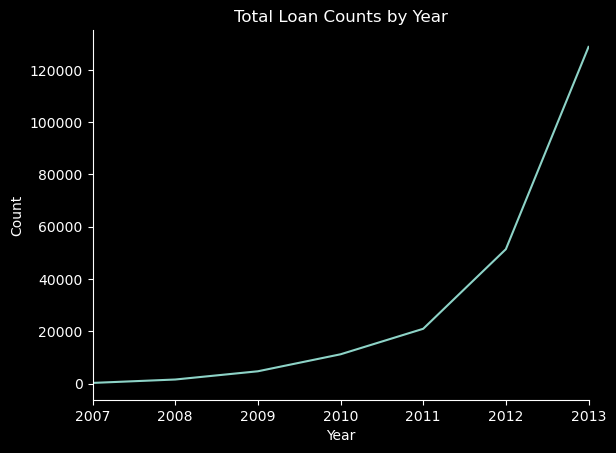

In [581]:
sns.lineplot(data = year_df, x = 'year', y = 'issue_d')
plt.title("Total Loan Counts by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xlim((2007, 2013))
plt.xticks([2007, 2008, 2009, 2010, 2011, 2012, 2013], [2007, 2008, 2009, 2010, 2011, 2012, 2013])

sns.despine()
plt.show();

The graph show an exponential growth of loans issued between 2007 and 2013.

In [582]:
df_merged.groupby(by='loan_status')['loan_amnt'].describe()

count          mean          std    min     25%      50%  \
loan_status                                                                
Charged Off   33509.0  15071.049569  8433.121658  900.0  8500.0  14000.0   
Fully Paid   185304.0  13710.864849  8020.619018  500.0  7675.0  12000.0   

                 75%      max  
loan_status                    
Charged Off  20000.0  35000.0  
Fully Paid   19000.0  35000.0

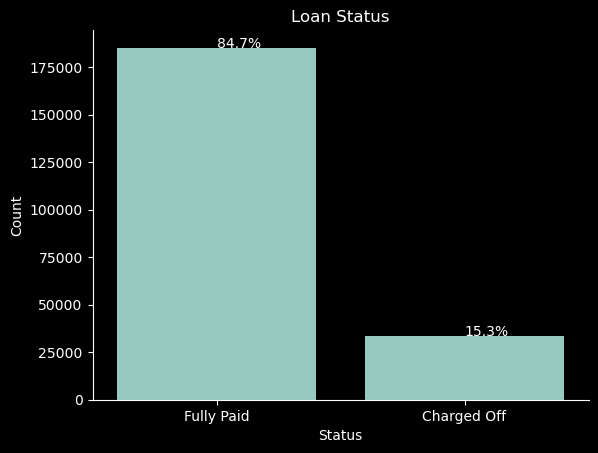

In [583]:
ax = sns.countplot(data = df_merged, x = 'loan_status', order = df_merged.loan_status.value_counts().index, 
                    color = basic)

# Annotation
a = 0
for p in ax.patches:
    if a < 4:
        total = len(df_merged.loan_status)
        percentage = "{:.1f}%".format(100 * p.get_height() / total)
        y = p.get_y() + p.get_height()
        x = (p.get_x() + p.get_width() / 2)
        ax.annotate(percentage, (x, y))
        a += 1
plt.title("Loan Status")
plt.xlabel('Status')
plt.ylabel('Count')

sns.despine()
plt.show();

Loans per LendingClub Grade

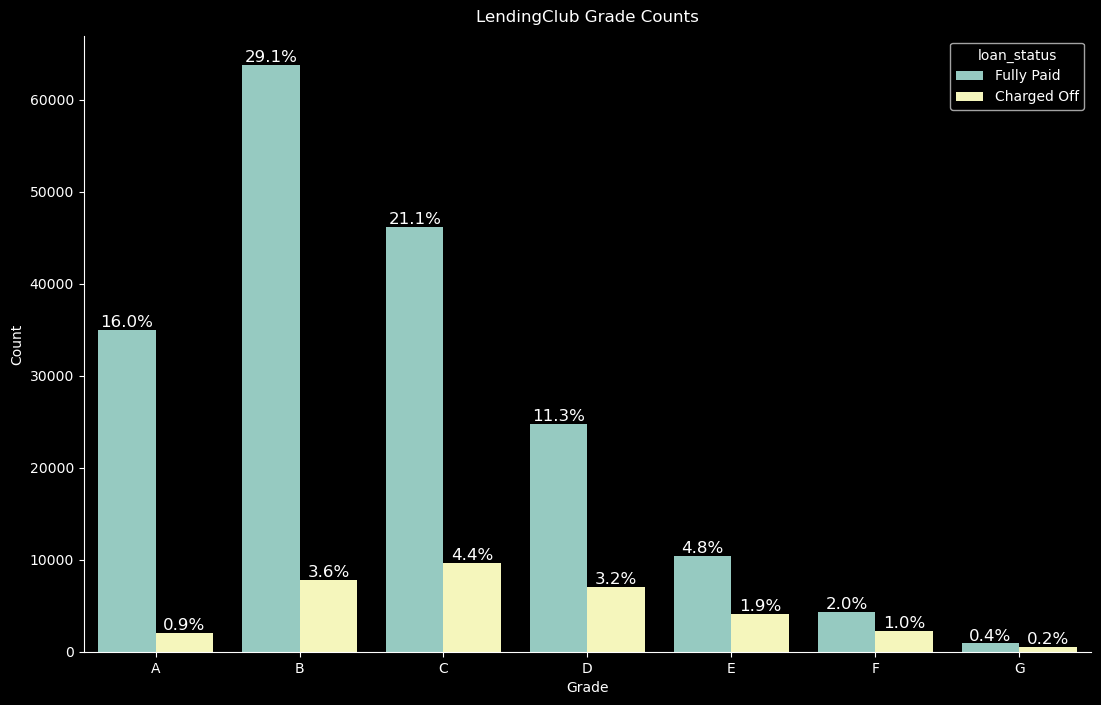

In [584]:
# Set the size of the plot
plt.figure(figsize=(13, 8))

# Plot for LendingClub grade
order = sorted(df_merged.grade.unique())
ax = sns.countplot(data = df_merged, x = 'grade', hue = 'loan_status', order = order)
ax.set_title('LendingClub Grade Counts', pad = 10)
ax.set_xlabel('Grade')
ax.set_ylabel('Count')

# Total number of loans
total_loans = len(df_merged)

# Add annotation
for p in ax.patches:
    percentage = "{:.1f}%".format(100 * p.get_height() / total_loans)
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), fontsize = 12, ha = 'center', va = 'bottom')
sns.despine()

plt.show();


From The graph above, we can see that 32.7% of the loans are labelled with a "B" grade, 25.5% with a "C" grade, and 16.9% with an "A" grade.
This indicates that 75.1% of all loans have a moderate to high level of creditworthiness, as per LendingClub's assessment.

Now, let us check how the subgrades are distributed.

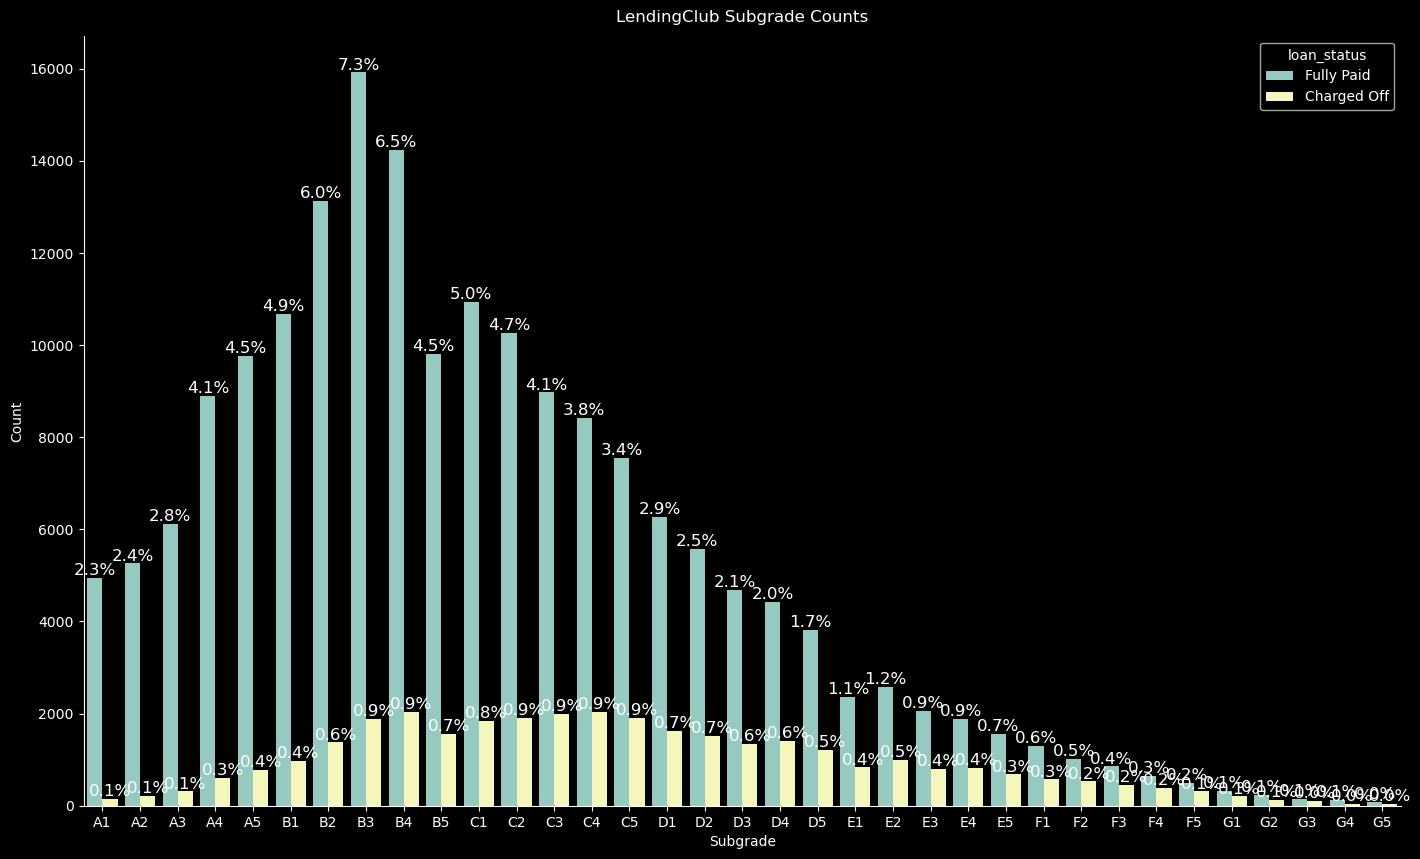

In [585]:
# Set the size of the plot
plt.figure(figsize=(17, 10))

# Plot for LendingClub subgrade
order = sorted(df_merged.sub_grade.unique())
ax = sns.countplot(data = df_merged, x = 'sub_grade', hue = 'loan_status', order = order)
ax.set_title('LendingClub Subgrade Counts', pad = 10)
ax.set_xlabel('Subgrade')
ax.set_ylabel('Count')

# Total number of loans
total_loans = len(df_merged)

# Add annotation
for p in ax.patches:
    percentage = "{:.1f}%".format(100 * p.get_height() / total_loans)
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), fontsize = 12, ha = 'center', va = 'bottom')
sns.despine()

plt.show();


Most of the paid off loans are between the A4 and C1 loan sub-grade. Whereas the charged off loans range between B3 and D1.

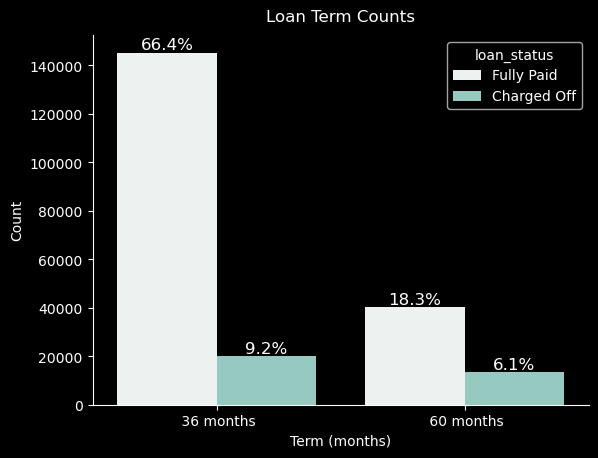

In [586]:
term_order = df_merged.term.value_counts().index

ax = sns.countplot(data = df_merged, x = 'term', hue = 'loan_status', color = basic, order = term_order)
ax.set_title("Loan Term Counts", pad = 10)
ax.set_xlabel('Term (months)')
ax.set_ylabel('Count')

for p in ax.patches:
    total = df_merged.term.count()
    percentage = "{:.1f}%".format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), fontsize = 12, ha = 'center', va = 'bottom')
    sns.despine()

plt.show();


Loans with a 60 month term have a relatively higher default rate than 36 month loans. However, there are also significantly more 36 month loans issued than 60 month loans.

Nevertheless, we can dummify the loan terms for our regression analysis.

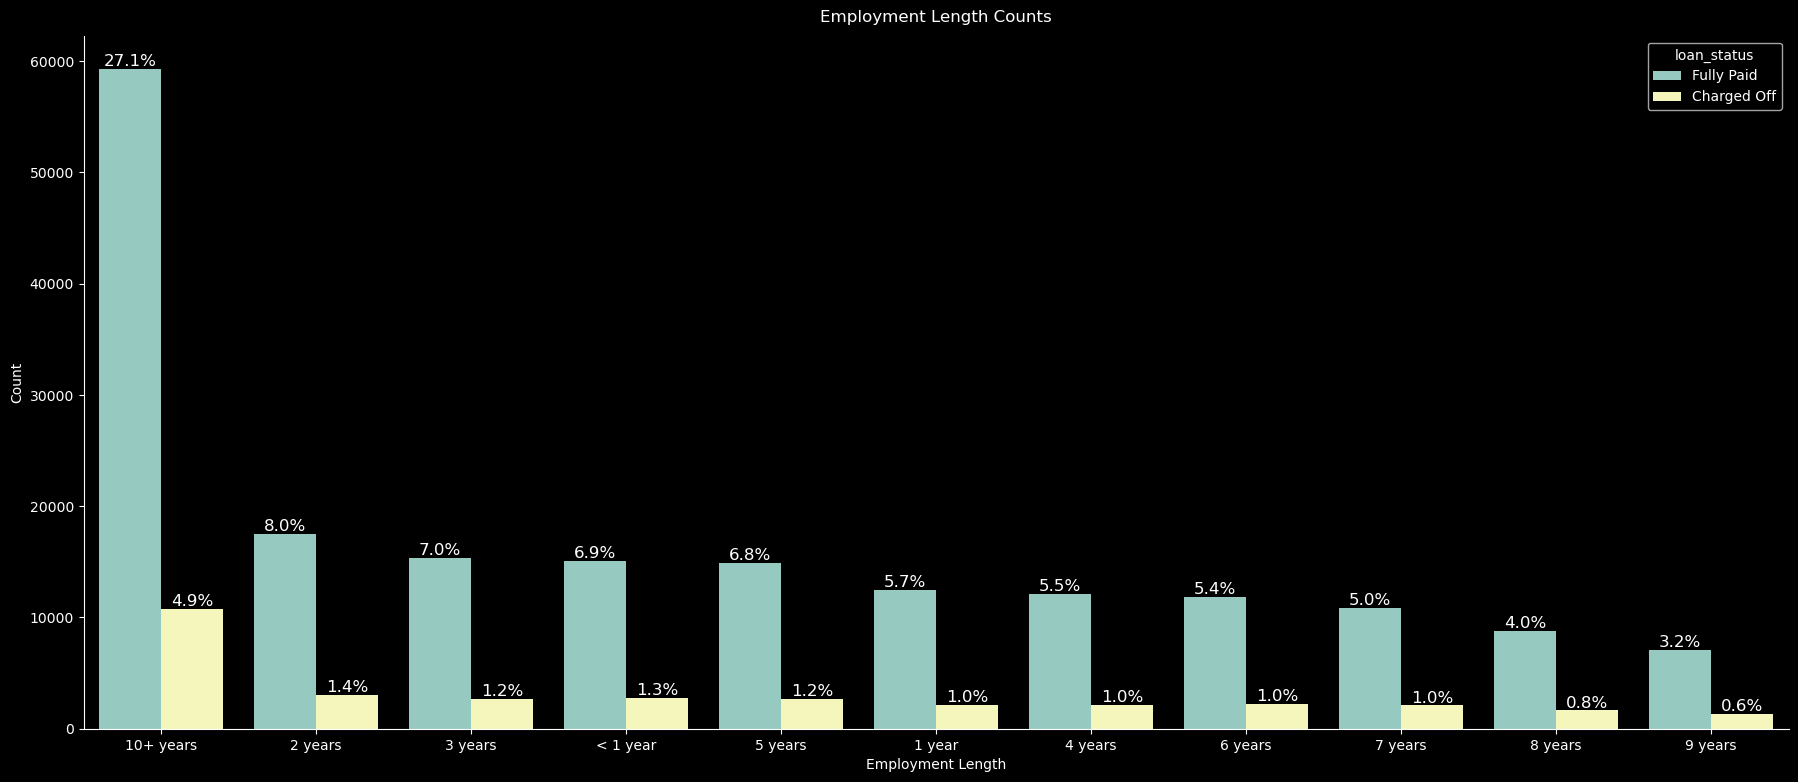

In [587]:
plt.figure(figsize=(22, 9))

emp_length_order = df_merged.emp_length.value_counts().index

ax = sns.countplot(data = df_merged, x = 'emp_length', hue = 'loan_status', order = emp_length_order)
ax.set_title("Employment Length Counts", pad = 10)
ax.set_xlabel('Employment Length')
ax.set_ylabel('Count')

for p in ax.patches:
    total = df_merged.emp_length.count()
    percentage = "{:.1f}%".format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), fontsize = 12, ha = 'center', va = 'bottom')
sns.despine()

plt.show();

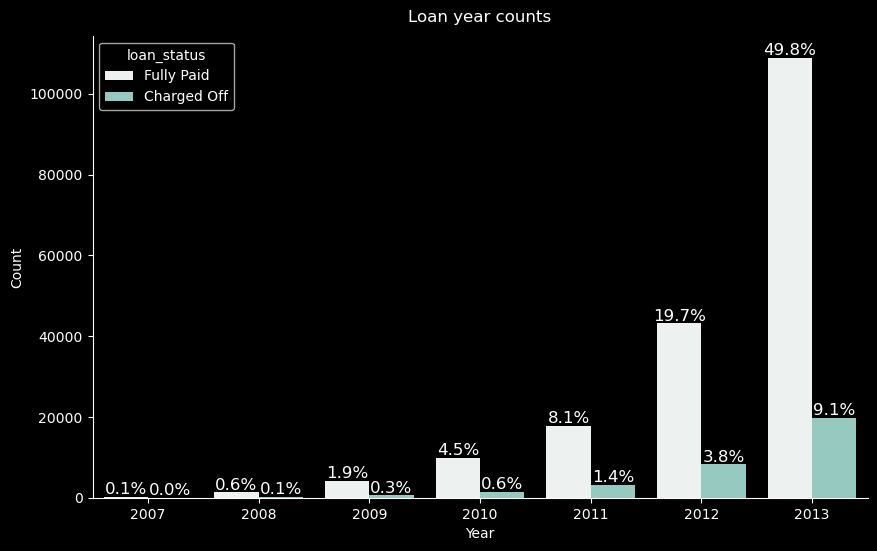

In [588]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(data = df_merged, x = 'year', hue = 'loan_status', color = basic)
ax.set_title("Loan year counts", pad = 10)
ax.set_xlabel('Year')
ax.set_ylabel('Count')

for p in ax.patches:
    total = df_merged.year.count()
    percentage = "{:.1f}%".format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), fontsize = 12, ha = 'center', va = 'bottom')
    sns.despine()

plt.show();

In [589]:
# Group by state and loan_status, then count the number of occurrences
loan_status_year_counts = df_merged.groupby(['year', 'loan_status']).size().reset_index(name='counts')

# Pivot the DataFrame to get states on the index and loan statuses on the columns
pivot_df = loan_status_year_counts.pivot(index='year', columns='loan_status', values='counts')

# Add a new column 'ratio' which is the ratio of 'Charged Off' to 'Fully Paid'
pivot_df['ratio'] = pivot_df['Charged Off'] / pivot_df['Fully Paid']

# Display the DataFrame to see the ratios
print(pivot_df)

loan_status  Charged Off  Fully Paid     ratio
year                                          
2007                  45         206  0.218447
2008                 243        1311  0.185355
2009                 591        4111  0.143761
2010                1407        9792  0.143689
2011                3139       17816  0.176190
2012                8256       43142  0.191368
2013               19828      108926  0.182032


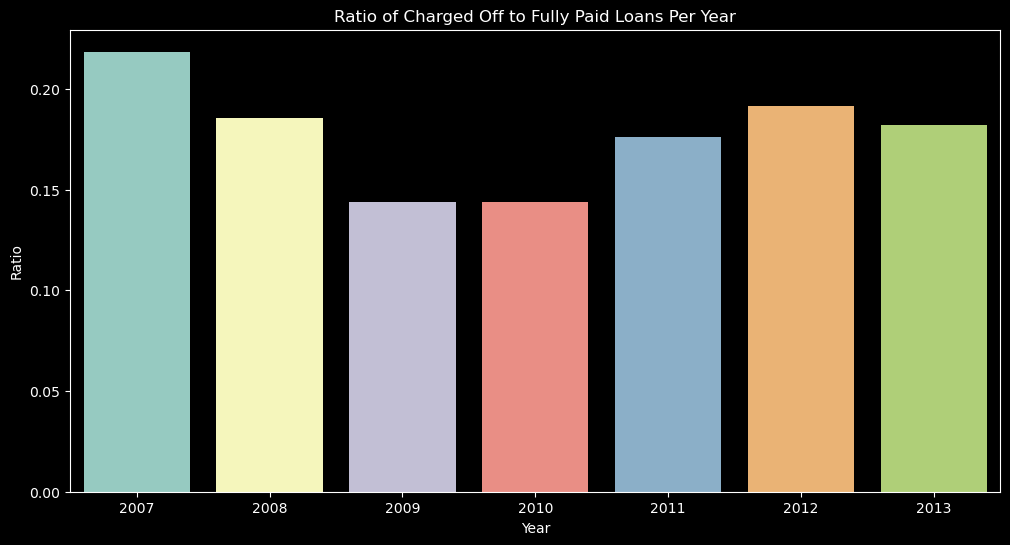

In [590]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use seaborn's barplot function to plot the 'ratio' column
plt.figure(figsize=(12,6))
sns.barplot(x=pivot_df.index, y=pivot_df['ratio'])
plt.title("Ratio of Charged Off to Fully Paid Loans Per Year")
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.show()

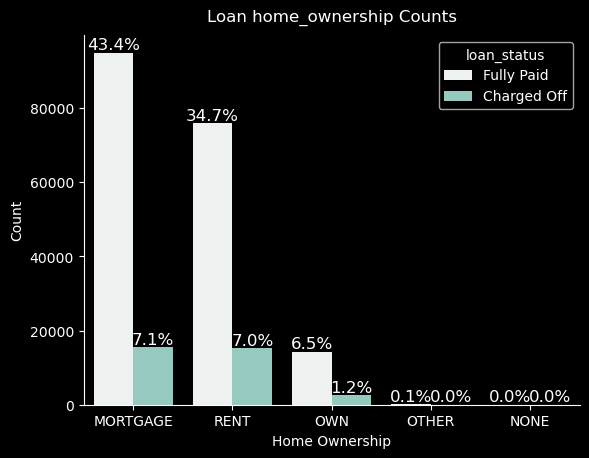

In [591]:
home_ownership_order = df_merged.home_ownership.value_counts().index

ax = sns.countplot(data = df_merged, x = 'home_ownership', hue = 'loan_status', color = basic, order = home_ownership_order)
ax.set_title("Loan home_ownership Counts", pad = 10)
ax.set_xlabel('Home Ownership')
ax.set_ylabel('Count')

for p in ax.patches:
    total = df_merged.home_ownership.count()
    percentage = "{:.1f}%".format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), fontsize = 12, ha = 'center', va = 'bottom')
    sns.despine()

plt.show();

SAY SOMETHING

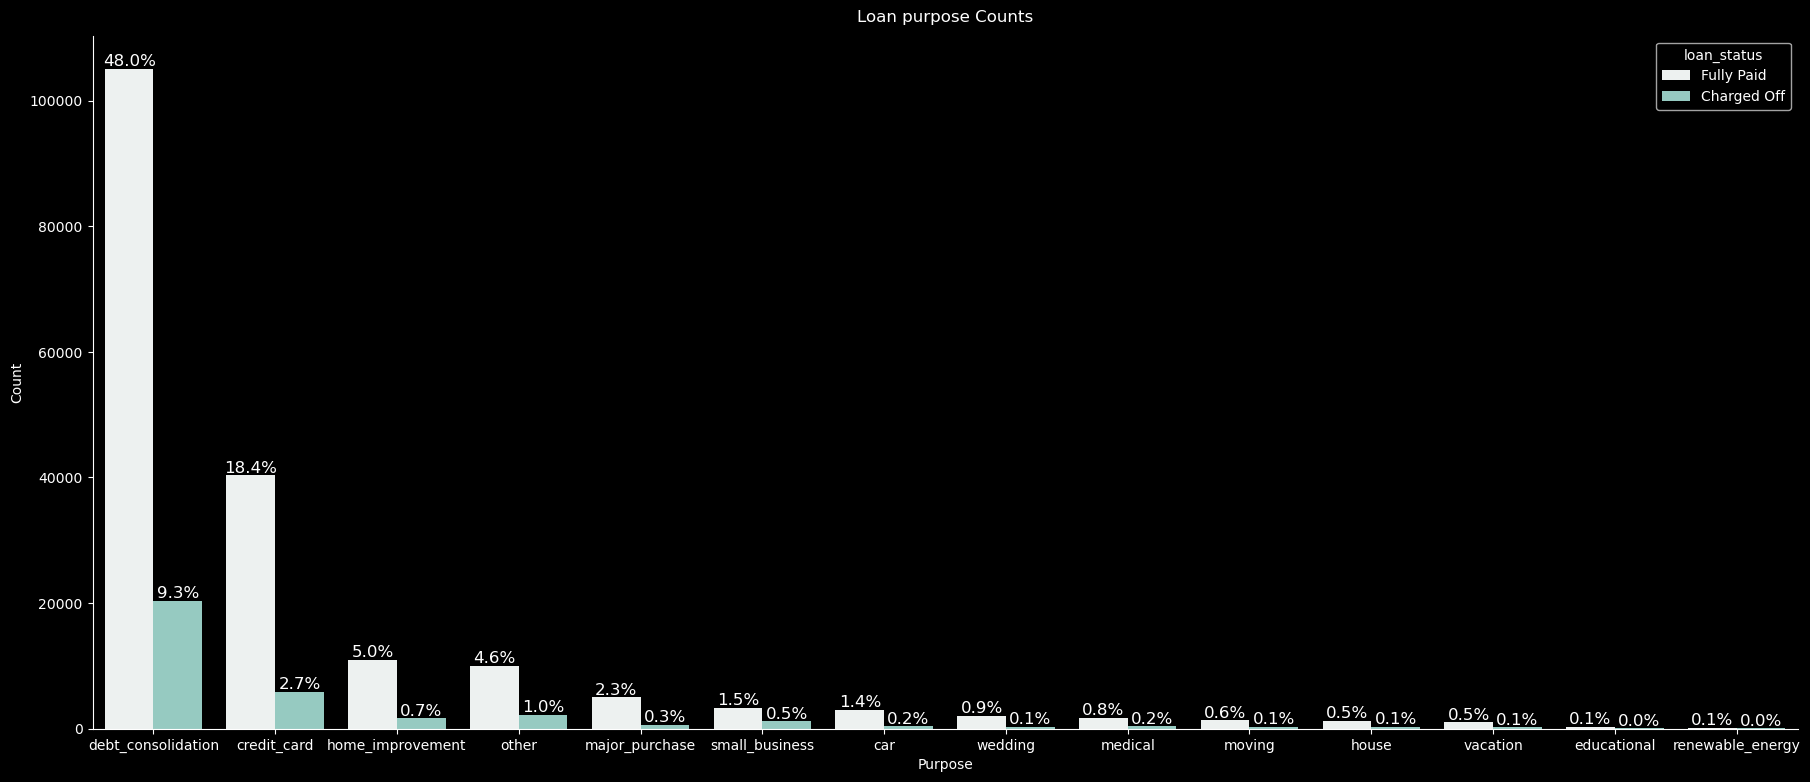

In [592]:
plt.figure(figsize=(22, 9))

purpose_order = df_merged.purpose.value_counts().index

ax = sns.countplot(data = df_merged, x = 'purpose', hue = 'loan_status', color = basic, order = purpose_order)
ax.set_title("Loan purpose Counts", pad = 10)
ax.set_xlabel('Purpose')
ax.set_ylabel('Count')

for p in ax.patches:
    total = df_merged.purpose.count()
    percentage = "{:.1f}%".format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), fontsize = 12, ha = 'center', va = 'bottom')
    sns.despine()

plt.show();

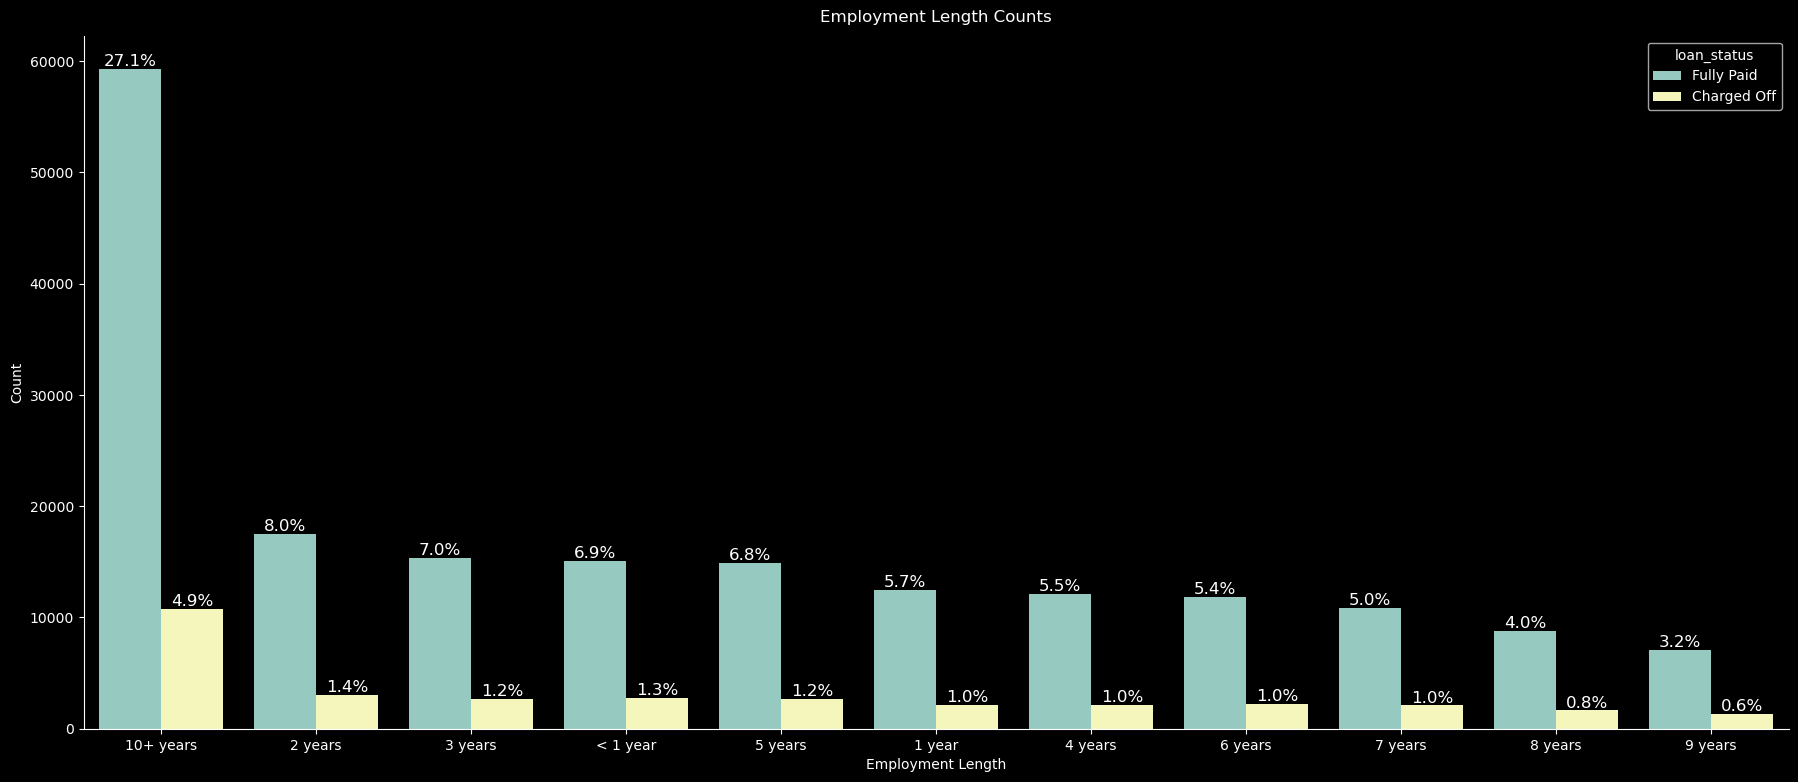

In [593]:
plt.figure(figsize=(22, 9))

emp_length_order = df_merged.emp_length.value_counts().index

ax = sns.countplot(data = df_merged, x = 'emp_length', hue = 'loan_status', order = emp_length_order)
ax.set_title("Employment Length Counts", pad = 10)
ax.set_xlabel('Employment Length')
ax.set_ylabel('Count')

for p in ax.patches:
    total = df_merged.emp_length.count()
    percentage = "{:.1f}%".format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), fontsize = 12, ha = 'center', va = 'bottom')
sns.despine()

plt.show();

SAY SOMETHING?

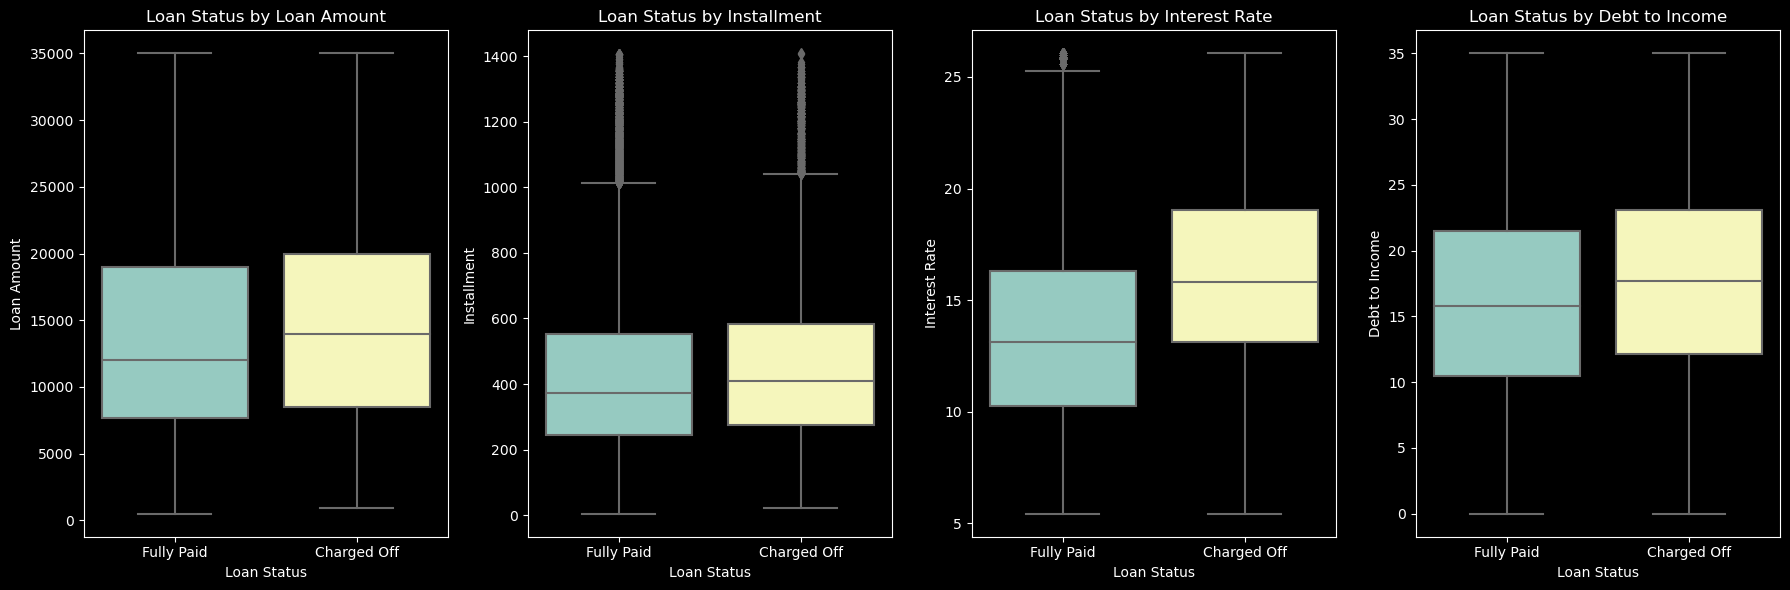

In [594]:
fig, axes = plt.subplots(1, 4, figsize=(18, 6)) 

# Box plot for loan_amnt
sns.boxplot(data=df_merged, x='loan_status', y='loan_amnt', ax=axes[0])
axes[0].set_title('Loan Status by Loan Amount')
axes[0].set_xlabel('Loan Status')
axes[0].set_ylabel('Loan Amount')

# Box plot for installment
sns.boxplot(data=df_merged, x='loan_status', y='installment', ax=axes[1])
axes[1].set_title('Loan Status by Installment')
axes[1].set_xlabel('Loan Status')
axes[1].set_ylabel('Installment')

# Box plot for interest rate
sns.boxplot(data=df_merged, x='loan_status', y='int_rate', ax=axes[2])
axes[2].set_title('Loan Status by Interest Rate')
axes[2].set_xlabel('Loan Status')
axes[2].set_ylabel('Interest Rate')

# Box plot for dti
sns.boxplot(data=df_merged, x='loan_status', y='dti', ax=axes[3])
axes[3].set_title('Loan Status by Debt to Income')
axes[3].set_xlabel('Loan Status')
axes[3].set_ylabel('Debt to Income')

plt.tight_layout()
plt.show()


SAY SOMETHING

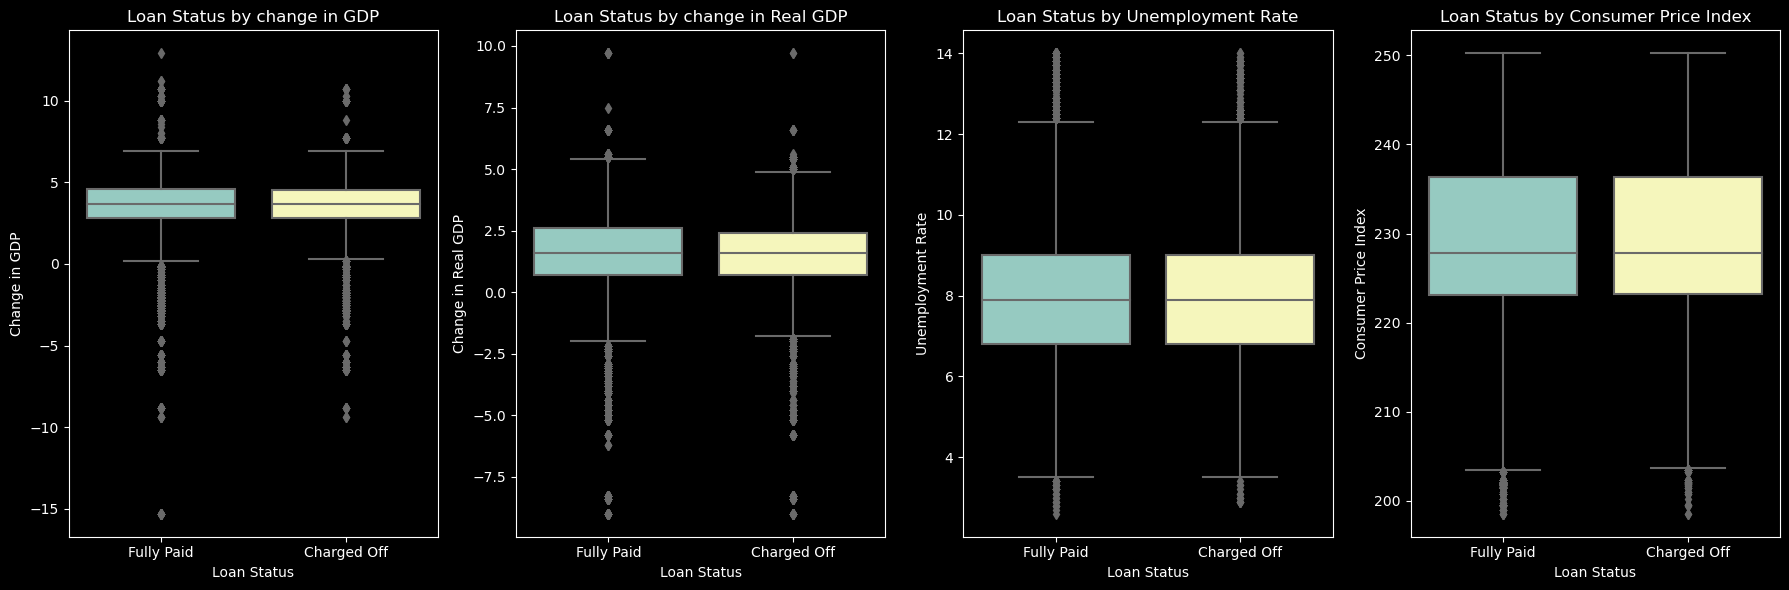

In [595]:
fig, axes = plt.subplots(1, 4, figsize=(18, 6)) 

# Box plot for change in GDP
sns.boxplot(data=df_merged, x='loan_status', y='dGDP', ax=axes[0])
axes[0].set_title('Loan Status by change in GDP')
axes[0].set_xlabel('Loan Status')
axes[0].set_ylabel('Change in GDP')

# Box plot for installment
sns.boxplot(data=df_merged, x='loan_status', y='dRGDP', ax=axes[1])
axes[1].set_title('Loan Status by change in Real GDP')
axes[1].set_xlabel('Loan Status')
axes[1].set_ylabel('Change in Real GDP')

# Box plot for interest rate
sns.boxplot(data=df_merged, x='loan_status', y='unempl_rate', ax=axes[2])
axes[2].set_title('Loan Status by Unemployment Rate')
axes[2].set_xlabel('Loan Status')
axes[2].set_ylabel('Unemployment Rate')

# Box plot for dti
sns.boxplot(data=df_merged, x='loan_status', y='cpi', ax=axes[3])
axes[3].set_title('Loan Status by Consumer Price Index')
axes[3].set_xlabel('Loan Status')
axes[3].set_ylabel('Consumer Price Index')

plt.tight_layout()
plt.show()

SAY SOMETHING

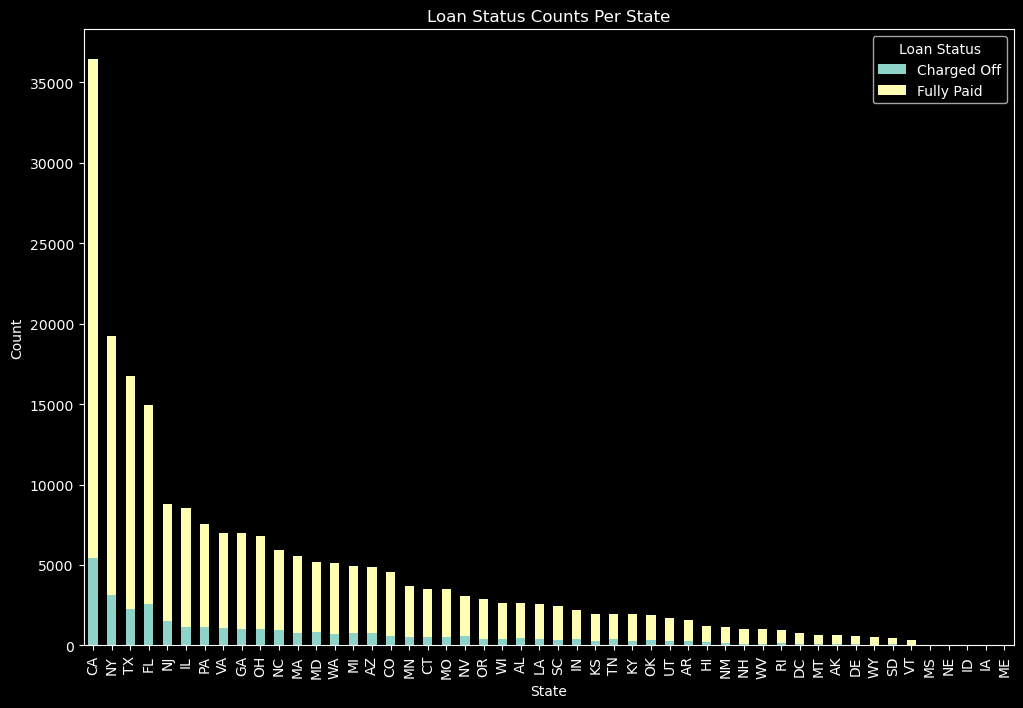

In [596]:
# Group by state and loan_status, then count the number of occurrences
loan_status_counts = df_loans4.groupby(['addr_state', 'loan_status']).size().reset_index(name='counts')

# Pivot the DataFrame to get states on the index and loan statuses on the columns
pivot_df = loan_status_counts.pivot(index='addr_state', columns='loan_status', values='counts')

# Calculate total count per state and sort by it in descending order
pivot_df['total'] = pivot_df.sum(axis=1)
pivot_df = pivot_df.sort_values(by='total', ascending=False)

# Drop the total column as we don't need it anymore
pivot_df = pivot_df.drop(columns=['total'])

# Plot a stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(12,8))

plt.title('Loan Status Counts Per State')
plt.xlabel('State')
plt.ylabel('Count')
plt.legend(title='Loan Status')

plt.show()


The graph clearly illustrates that California leads in the number of issued loans, significantly surpassing New York, Texas, and Florida. This is expected considering that LendingClub, the loan issuer, is headquartered in San Francisco, California.

Nonetheless, a closer examination reveals that California also has the highest count of charged-off loans. Despite this, it's essential to look beyond absolute numbers and assess the ratio between fully paid and charged-off loans per state, as it offers insights into the default rate.

In [597]:
# Group by state and loan_status, then count the number of occurrences
loan_status_counts = df_loans4.groupby(['addr_state', 'loan_status']).size().reset_index(name='counts')

# Pivot the DataFrame to get states on the index and loan statuses on the columns
pivot_df = loan_status_counts.pivot(index='addr_state', columns='loan_status', values='counts')

# Add a new column 'ratio' which is the ratio of 'Charged Off' to 'Fully Paid'
pivot_df['ratio'] = pivot_df['Charged Off'] / pivot_df['Fully Paid']

# Display the DataFrame to see the ratios
print(pivot_df)

loan_status  Charged Off  Fully Paid     ratio
addr_state                                    
AK                  89.0       536.0  0.166045
AL                 455.0      2193.0  0.207478
AR                 262.0      1317.0  0.198937
AZ                 750.0      4115.0  0.182260
CA                5456.0     31010.0  0.175943
CO                 575.0      4005.0  0.143571
CT                 511.0      3020.0  0.169205
DC                  65.0       698.0  0.093123
DE                  84.0       474.0  0.177215
FL                2603.0     12339.0  0.210957
GA                1011.0      5964.0  0.169517
HI                 214.0      1026.0  0.208577
IA                   1.0         5.0  0.200000
ID                   1.0         6.0  0.166667
IL                1161.0      7359.0  0.157766
IN                 385.0      1830.0  0.210383
KS                 263.0      1721.0  0.152818
KY                 303.0      1632.0  0.185662
LA                 420.0      2174.0  0.193192
MA           

Differences in this ratio across states suggest that certain state-specific factors may be influencing the likelihood of loan default. For instance, while Texas has issued more loans than Florida, the default rate in Florida surprisingly exceeds that of Texas. This underlines the importance of considering regional factors when evaluating the risk of loan default.

In [598]:
import plotly.express as px

# Group by state and loan status, then count the number of occurrences
state_loan_counts = df_merged.groupby('addr_state').size().reset_index(name='counts')

# Group by state and loan status, then count the number of occurrences
loan_status_counts = df_merged[df_merged['loan_status'].isin(['Charged Off', 'Fully Paid'])].groupby(['addr_state', 'loan_status']).size().unstack(fill_value=0)
loan_status_counts['Ratio'] = loan_status_counts['Charged Off'] / loan_status_counts['Fully Paid']
loan_status_counts = loan_status_counts.reset_index()

# Merge the loan count and loan status ratio
state_loan_counts = state_loan_counts.merge(loan_status_counts[['addr_state', 'Charged Off', 'Fully Paid', 'Ratio']], on='addr_state', how='left')

fig = px.choropleth(state_loan_counts, 
                    locations='addr_state', 
                    color='counts', 
                    locationmode="USA-states", 
                    scope="usa",
                    labels={'counts': 'Loan Count'},
                    title='Loan Count per State',
                    color_continuous_scale='Blues')

fig.update_layout(
    coloraxis_colorbar=dict(title='Loan Count'),
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
        font_family="Arial"
    )
)

# Add extra information to hover text
fig.update_traces(hovertemplate='<b>%{location}</b><br>Loan Count: %{z}<br>Charged Off: %{customdata[0]}<br>Fully Paid: %{customdata[1]}<br>Ratio: %{customdata[2]:.2f}')

# Assign charged off, fully paid counts, and ratio as custom data
fig.data[0].update(customdata=state_loan_counts[['Charged Off', 'Fully Paid', 'Ratio']].values)

fig.show()


In [599]:
raise SystemExit("Stop right there!")

SystemExit: Stop right there!

To exit: use 'exit', 'quit', or Ctrl-D.


# Data Preparation

All variables will be grouped as follows:

Borrower Assessment: {Grade, Sub grade, Interest Rate}

Loan Characteristics: {Loan Purpose, Loan Amount, Term}

Borrower Characteristics: {Annual Income, Housing Situation, Employment Length}

Credit History: {Earliest Credit Line, Delinquency 2 Years, Inquiries Last 6 Months, Public Records,Revolving Utilisation, Open Accounts, Months Since Last Delinquency}

Borrower Indebtedness: {Loan Amount to Annual Income, Annual Instalment to Income, Debt to Income}

Macroeconomic: {Change in Real GDP, Unemployment Rate, Consumer Price Index, Russell 2000 Index, Federal Interest Rate}

Please beware that some variables have been removed due to multicollinearity.

To effectively evaluate the impact of each variable group on predicting loan defaults, we'll establish seven distinctive models, each encompassing a unique combination of variable groups. By analyzing these different models, we can determine the relative importance of each variable in predicting loan defaults. Furthermore, this approach can help us identify potential instances of overfitting, where the model might be too closely tailored to the training data, thereby reducing its predictive accuracy with new data. 

Model 1 incorporates the borrower assessment & loan characteristic. These two variable groups serve as the main variables. Model 2 add borrower characteristics, model 3 credit history, model 4 borrower indebtedness, model 5 macroeconomics. Then, model 6 includes all variable groups except macroeconomics. And model 7 includes all variable groups. 

The seven models for logistic regression are as follows:

Model 1: PD_i = B_0 + B_1 * Dummy_sub_grade + B_2 * int_rate + B_3 * purpose + B_4 * loan_amnt + B_5 * Dummy_term

Model 2: PD_i = B_0 + B_1 * Dummy_sub_grade + B_2 * int_rate + B_3 * purpose + B_4 * loan_amnt + B_5 * Dummy_term + B_6 * annual_inc + B_7 * Dummy_home_ownership + B_8 * Dummy_emp_length

Model 3: PD_i = PD_i = B_0 + B_1 * Dummy_sub_grade + B_2 * int_rate + B_3 * purpose + B_4 * loan_amnt + B_5 * Dummy_term + B_6 * days_since_earliest_cr_line + B_7 * delinq_2yrs + B_8 * inq_last_6mths + B_9 * pub_rec + B_10 * revol_util + B_11 * open_acc

Model 4: PD_i = B_0 + B_1 * Dummy_sub_grade + B_2 * int_rate + B_3 * purpose + B_4 * loan_amnt + B_5 * Dummy_term + B_6 * loan_to_income + B_7 * dti

Model 5: PD_i = B_0 + B_1 * Dummy_sub_grade + B_2 * int_rate + B_3 * purpose + B_4 * loan_amnt + B_5 * Dummy_term + B_6 * dRGDP + B_7 * unempl_rate + B_8 * russell_vol + B_9 * cpi + B_10 * fed_funds

Model 6: PD_i = B_0 + B_1 * Dummy_sub_grade + B_2 * int_rate + B_3 * purpose + B_4 * loan_amnt + B_5 * Dummy_term + B_6 * annual_inc + B_7 * Dummy_home_ownership + B_8 * Dummy_emp_length + B_9 * days_since_earliest_cr_line + B_10 * delinq_2yrs + B_11 * inq_last_6mths + B_12 * pub_rec + B_13 * revol_util + B_14 * open_acc + B_15 * loan_to_income + B_16 * dti

Model 7: PD_i = B_0 + B_1 * Dummy_sub_grade + B_2 * int_rate + B_3 * purpose + B_4 * loan_amnt + B_5 * Dummy_term + B_6 * annual_inc + B_7 * Dummy_home_ownership + B_8 * Dummy_emp_length + B_9 * days_since_earliest_cr_line + B_10 * delinq_2yrs + B_11 * inq_last_6mths + B_12 * pub_rec + B_13 * revol_util + B_14 * open_acc + B_15 * loan_to_income + B_16 * dti + B_17 * dRGDP + B_18 * unempl_rate + B_19 * russell_vol + B_20 * cpi + B_21 * fed_funds 

In [600]:
df_merged.head()

grade sub_grade  int_rate             purpose  loan_amnt  annual_inc  \
0     E        E2     13.75  debt_consolidation       7500       22000   
1     A        A2      7.43         credit_card       5000       85000   
2     B        B5      9.96         educational       3500       13500   
3     B        B2      9.01               other       5000      250000   
4     F        F4     15.96  debt_consolidation       2700       52200   

  home_ownership emp_length earliest_cr_line  delinq_2yrs  ...  dRGDP  \
0            OWN   < 1 year       2003-10-01            1  ...    2.8   
1            OWN     1 year       1997-10-01            0  ...    0.6   
2           RENT   < 1 year       2002-12-01            0  ...    1.2   
3       MORTGAGE     1 year       2003-04-01            2  ...    0.8   
4           RENT     1 year       2003-08-01            0  ...    2.8   

   russell_vol  unempl_rate  census_region      cpi  fed_funds loan_to_income  \
0  65322800000          4.5      Northeast  221.579       5.25       0.340909   
1  70337430000          4.9        Midwest  198.989       5.26       0.058824   
2  70337430000          3.3          South  201.571       5.26       0.259259   
3  70337430000          4.5      Northeast  221.945       5.26       0.020000   
4  70337430000          4.5      Northeast  221.945       5.26       0.051724   

  installment_to_income days_since_earliest_cr_line  year  
0              0.011610                        1339  2007  
1              0.001828                        3560  2007  
2              0.008361                        1673  2007  
3              0.000636                        1552  2007  
4              0.001818                        1430  2007  

[5 rows x 31 columns]

Preparing X variables

In [601]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler

# # Prepare the features for Model 1
# X1 = df_merged[['sub_grade', 'int_rate', 'purpose', 'loan_amnt', 'term']]

# # Create dummy variables for Model 1
# X1 = pd.get_dummies(X1, columns=['sub_grade', 'purpose', 'term'], drop_first=True)

# # Add intercept for Model 1
# X1 = sm.add_constant(X1)

# # Prepare the features for Model 2
# X2 = df_merged[['sub_grade', 'int_rate', 'purpose', 'loan_amnt', 'term', 'annual_inc', 'home_ownership', 'emp_length']]

# # Create dummy variables for Model 2
# X2 = pd.get_dummies(X2, columns=['sub_grade', 'purpose', 'term', 'home_ownership', 'emp_length'], drop_first=True)

# # Add intercept for Model 2
# X2 = sm.add_constant(X2)

# # Prepare the features for Model 3
# X3 = df_merged[['sub_grade', 'int_rate', 'purpose', 'loan_amnt', 'term', 'days_since_earliest_cr_line', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'revol_util', 'open_acc']]

# # Create dummy variables for Model 3
# X3 = pd.get_dummies(X3, columns=['sub_grade', 'purpose', 'term'], drop_first=True)

# # Add intercept for Model 3
# X3 = sm.add_constant(X3)

# # Prepare the features for Model 4
# X4 = df_merged[['sub_grade', 'int_rate', 'purpose', 'loan_amnt', 'term', 'loan_to_income', 'dti']]

# # Create dummy variables for Model 4
# X4 = pd.get_dummies(X4, columns=['sub_grade', 'purpose', 'term'], drop_first=True)

# # Add intercept for Model 4
# X4 = sm.add_constant(X4)

# # Prepare the features for Model 5
# X5 = df_merged[['sub_grade', 'int_rate', 'purpose', 'loan_amnt', 'term', 'dRGDP', 'unempl_rate', 'russell_vol', 'cpi', 'fed_funds']]

# # Create dummy variables for Model 5
# X5 = pd.get_dummies(X5, columns=['sub_grade', 'purpose', 'term'], drop_first=True)

# # Add intercept for Model 5
# X5 = sm.add_constant(X5)

# Prepare the features for Model 6
X6 = df_merged[['sub_grade', 'int_rate', 'purpose', 'loan_amnt', 'term', 'annual_inc', 'home_ownership', 'emp_length', 'days_since_earliest_cr_line', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'revol_util', 'open_acc', 'loan_to_income', 'dti']]

# Create dummy variables for Model 6
X6 = pd.get_dummies(X6, columns=['sub_grade', 'purpose', 'term', 'home_ownership', 'emp_length'], drop_first=True)

# Add intercept for Model 6
X6 = sm.add_constant(X6)

# Prepare the features for Model 7
X7 = df_merged[['sub_grade', 'int_rate', 'purpose', 'loan_amnt', 'term', 'annual_inc', 'home_ownership', 'emp_length', 'days_since_earliest_cr_line', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'revol_util', 'open_acc', 'loan_to_income', 'dti', 'dRGDP', 'unempl_rate', 'russell_vol', 'cpi', 'fed_funds']] 

# Create dummy variables for Model 7
X7 = pd.get_dummies(X7, columns=['sub_grade', 'purpose', 'term', 'home_ownership', 'emp_length'], drop_first=True)

# Add intercept for Model 7
X7 = sm.add_constant(X7)

Prepare Y variable

In [602]:
# Prepare the target 0 = default, 1 = paid off
y = df_merged['loan_status']
le = LabelEncoder()
y = le.fit_transform(y)

Splitting Data 80/20 Train/Test

In [603]:
# # Split the data for Model 1
# X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# # Split the data for Model 2
# X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=42)

# # Split the data for Model 3
# X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.2, random_state=42)

# # Split the data for Model 4
# X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y, test_size=0.2, random_state=42)

# # Split the data for Model 5
# X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y, test_size=0.2, random_state=42)

# Split the data for Model 6
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y, test_size=0.2, random_state=42)

# Split the data for Model 7
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y, test_size=0.2, random_state=42)

Apply Scaling Technique

In [604]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer

# List of numerical features
num_features6 = ['int_rate', 'loan_amnt', 'annual_inc', 'days_since_earliest_cr_line', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'revol_util', 'open_acc', 'loan_to_income', 'dti']

# Create a column transformer
preprocessor6 = make_column_transformer(
    (StandardScaler(), num_features6),
    remainder='passthrough'  # leave remaining categorical features untouched
)

# Fit and transform the numerical features of the undersampled training data
X6_train_scaled = preprocessor6.fit_transform(X6_train)
X6_test = preprocessor6.transform(X6_test)

In [605]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer

# List of your numerical features
num_features7 = ['int_rate', 'loan_amnt', 'annual_inc', 'days_since_earliest_cr_line', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'revol_util', 'open_acc', 'loan_to_income', 'dti', 'dRGDP', 'unempl_rate', 'russell_vol', 'cpi', 'fed_funds']

# Create a column transformer
preprocessor7 = make_column_transformer(
    (StandardScaler(), num_features7),
    remainder='passthrough'  # leave remaining categorical features untouched
)

# Fit and transform the numerical features of the undersampled training data
X7_train_scaled = preprocessor7.fit_transform(X7_train)
X7_test = preprocessor7.transform(X7_test)

Exploratory data analysis reveals a significant class imbalance in our dataset, with 85% of loans being paid off and only 15% being charged off. This severe imbalance can negatively impact the predictive performance of our models. While the models may achieve high accuracy in predicting 'good' loans, they are likely to struggle with accurately identifying 'bad' loans. To address this issue and improve model performance, it is essential to balance the data to achieve a 50/50 ratio.

There are two primary approaches for data balancing: undersampling and oversampling. Undersampling involves removing samples from the majority class, while oversampling generates synthetic samples for the minority class. In our case, due to the sufficient amount of available data and the potential bias that oversampling might introduce, we will focus on undersampling. Additionally, to ensure unbiased evaluation and assess model performance on unseen data, we will employ the K-fold cross-validation technique.

Furthermore, we will explore the class weight method, which assigns higher importance to the minority class during model training without altering the original dataset. This approach allows us to give appropriate consideration to charged off loans, as they carry a higher significance for the company and accurate prediction is crucial in mitigating potential losses.

By implementing undersampling and evaluating the model through K-fold cross-validation, we aim to achieve balanced data representation and robust performance on unseen data. Additionally, the class weight method will be examined as a non-invasive alternative to address the class imbalance. This comprehensive approach will improve our ability to predict loan defaults while minimizing biases and maintaining the integrity of the original dataset.

Apply Data Balancing Technique only to Train set

In [606]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize a RandomUnderSampler object
undersampler = RandomUnderSampler(random_state=42)

# Fit the undersampler and resample the training data
X6_train_scaled_undersampled, y6_train_undersampled = undersampler.fit_resample(X6_train_scaled, y6_train)

# Fit the undersampler and resample the training data
X7_train_scaled_undersampled, y7_train_undersampled = undersampler.fit_resample(X7_train_scaled, y7_train)


Splitting Train Data 80/20 Train/Validation

In [607]:
# # Further split the train set into train and validation sets (80% train, 20% validation)
# X1_train, X1_val, y1_train, y1_val = train_test_split(X1_train, y1_train, test_size=0.2, random_state=1234)

# X2_train, X2_val, y2_train, y2_val = train_test_split(X2_train, y2_train, test_size=0.2, random_state=1234)

# X3_train, X3_val, y3_train, y3_val = train_test_split(X3_train, y3_train, test_size=0.2, random_state=1234)

# X4_train, X4_val, y4_train, y4_val = train_test_split(X4_train, y4_train, test_size=0.2, random_state=1234)

# X5_train, X5_val, y5_train, y5_val = train_test_split(X5_train, y5_train, test_size=0.2, random_state=1234)

X6_train, X6_val, y6_train, y6_val = train_test_split(X6_train_scaled_undersampled, y6_train_undersampled, test_size=0.2, random_state=1234)

X7_train, X7_val, y7_train, y7_val = train_test_split(X7_train_scaled_undersampled, y7_train_undersampled, test_size=0.2, random_state=1234)

In [608]:
# Print the shape of each set for Model 6
print("Train set shape:", X6_train.shape, y6_train.shape)
print("Validation set shape:", X6_val.shape, y6_val.shape)
print("Test set shape:", X6_test.shape, y6_test.shape)

Train set shape: (42881, 74) (42881,)
Validation set shape: (10721, 74) (10721,)
Test set shape: (43763, 74) (43763,)


In [609]:
# Print the shape of each set for Model 7
print("Train set shape:", X7_train.shape, y7_train.shape)
print("Validation set shape:", X7_val.shape, y7_val.shape)
print("Test set shape:", X7_test.shape, y7_test.shape)


Train set shape: (42881, 79) (42881,)
Validation set shape: (10721, 79) (10721,)
Test set shape: (43763, 79) (43763,)


In [610]:
# Get column names from original DataFrame
original_columns = X6.columns

# Convert numpy arrays back to pandas DataFrame
X6_train = pd.DataFrame(X6_train, columns=original_columns)
X6_val = pd.DataFrame(X6_val, columns=original_columns)
X6_test = pd.DataFrame(X6_test, columns=original_columns)


In [611]:
# Get column names from original DataFrame
original_columns = X7.columns

# Convert numpy arrays back to pandas DataFrame
X7_train = pd.DataFrame(X7_train, columns=original_columns)
X7_val = pd.DataFrame(X7_val, columns=original_columns)
X7_test = pd.DataFrame(X7_test, columns=original_columns)


In [612]:
# Check column consistency between training and test sets
train_columns = set(X6_train.columns)
val_columns = set(X6_val.columns)
test_columns = set(X6_test.columns)

# Columns present in training set but not in validation or test set
missing_columns_val = train_columns - val_columns
missing_columns_test = train_columns - test_columns

# Columns present in validation or test set but not in training set
extra_columns_val = val_columns - train_columns
extra_columns_test = test_columns - train_columns

print("Columns present in training set but not in validation set:", missing_columns_val)
print("Columns present in training set but not in test set:", missing_columns_test)
print("Columns present in validation set but not in training set:", extra_columns_val)
print("Columns present in test set but not in training set:", extra_columns_test)

Columns present in training set but not in validation set: set()
Columns present in training set but not in test set: set()
Columns present in validation set but not in training set: set()
Columns present in test set but not in training set: set()


In [613]:
# Check column consistency between training and test sets
train_columns = set(X7_train.columns)
val_columns = set(X7_val.columns)
test_columns = set(X7_test.columns)

# Columns present in training set but not in validation or test set
missing_columns_val = train_columns - val_columns
missing_columns_test = train_columns - test_columns

# Columns present in validation or test set but not in training set
extra_columns_val = val_columns - train_columns
extra_columns_test = test_columns - train_columns

print("Columns present in training set but not in validation set:", missing_columns_val)
print("Columns present in training set but not in test set:", missing_columns_test)
print("Columns present in validation set but not in training set:", extra_columns_val)
print("Columns present in test set but not in training set:", extra_columns_test)


Columns present in training set but not in validation set: set()
Columns present in training set but not in test set: set()
Columns present in validation set but not in training set: set()
Columns present in test set but not in training set: set()


In [614]:
raise SystemExit("Stop right there!")

SystemExit: Stop right there!

To exit: use 'exit', 'quit', or Ctrl-D.


# Neural Network Model VI

All neural network codes are taken from https://github.com/riccardopinosio/DDB_AI/blob/main/credit_risk_case_study/modelling.ipynb

In [615]:


import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense
print('tensorflow: %s' % tensorflow.__version__)
print('keras: %s' % keras.__version__)

tensorflow: 2.10.0
keras: 2.10.0


In [616]:
print(f"The number of neurons for the input layer must be: {X6_train.shape[1]}")

The number of neurons for the input layer must be: 74


In [617]:
# define the neural network model class instance
simple_nn6 = Sequential()
# add the first input layer with 29 nodes and the first hidden layer, with  relu activation function
# note that the first command does two things: create a first input layer with 29 nodes, and then a hidden layer
# we set the number of neurons to be equal to the (# of nodes in the input layer + # neurons in the output layer)/2,
# i.e. the mean of the number of neurons in the input layer and the output layer. This is usually a good heuristic to get started.
simple_nn6.add(Dense(20, input_dim=X6_train.shape[1], activation='relu'))
# add the output layer with sigmoid function (the sigmoid function is exactly the same as that used in the formulation of logisitc regression
simple_nn6.add(Dense(1, activation='sigmoid'))

In [618]:
print(simple_nn6.summary())

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_99 (Dense)            (None, 20)                1500      
                                                                 
 dense_100 (Dense)           (None, 1)                 21        
                                                                 
Total params: 1,521
Trainable params: 1,521
Non-trainable params: 0
_________________________________________________________________
None


In [619]:
simple_nn6.compile(loss='binary_crossentropy', optimizer='adam')

In [620]:
print(X6_train.shape)
print(y6_train.shape)
print(X6_val.shape)
print(y6_val.shape)

(42881, 74)
(42881,)
(10721, 74)
(10721,)


In [621]:
# Define model architecture
def create_model():
    model = Sequential()
    model.add(Dense(20, input_dim=X6_train.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

# Create a new instance of the model
simple_nn6_new = create_model()

# Now fit the model
simple_nn6_new.fit(X6_train, y6_train, epochs=100, batch_size = 150)

Epoch 1/100
286/286 [==============================] - 2s 4ms/step - loss: 0.6529
Epoch 2/100
286/286 [==============================] - 1s 3ms/step - loss: 0.6371
Epoch 3/100
286/286 [==============================] - 1s 4ms/step - loss: 0.6345
Epoch 4/100
286/286 [==============================] - 1s 4ms/step - loss: 0.6329
Epoch 5/100
286/286 [==============================] - 1s 3ms/step - loss: 0.6321
Epoch 6/100
286/286 [==============================] - 1s 4ms/step - loss: 0.6312
Epoch 7/100
286/286 [==============================] - 1s 3ms/step - loss: 0.6306
Epoch 8/100
286/286 [==============================] - 1s 3ms/step - loss: 0.6302
Epoch 9/100
286/286 [==============================] - 1s 3ms/step - loss: 0.6295
Epoch 10/100
286/286 [==============================] - 1s 3ms/step - loss: 0.6291
Epoch 11/100
286/286 [==============================] - 1s 3ms/step - loss: 0.6285
Epoch 12/100
286/286 [==============================] - 1s 3ms/step - loss: 0.6281
Epoch 13/100


dict_keys(['loss'])


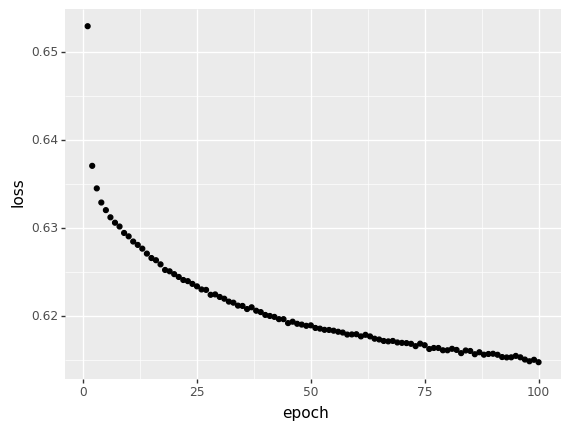

<ggplot: (138784185378)>

In [622]:
from plotnine import ggplot, aes, geom_point
import numpy as np
import pandas as pd

# see what information has been logged during the training process
print(simple_nn6_new.history.history.keys())

# plot the training loss over epochs
loss_df = pd.DataFrame(simple_nn6_new.history.history['loss'])
loss_df.columns = ['loss']
loss_df = loss_df.assign(epoch = np.arange(1, len(loss_df) + 1))

(
    ggplot(loss_df, aes(x='epoch', y='loss')) +
    geom_point()
)


In [623]:
# Define model architecture
def create_model():
    model = Sequential()
    model.add(Dense(20, input_dim=X6_train.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

# Create a new instance of the model
simple_nn6_new = create_model()

# Now fit the model
simple_nn6_new.fit(X6_train, y6_train, epochs=100, batch_size = 150, validation_data=(X6_val, y6_val))

Epoch 1/100
286/286 [==============================] - 7s 24ms/step - loss: 0.6599 - val_loss: 0.6473
Epoch 2/100
286/286 [==============================] - 1s 3ms/step - loss: 0.6379 - val_loss: 0.6440
Epoch 3/100
286/286 [==============================] - 1s 4ms/step - loss: 0.6352 - val_loss: 0.6426
Epoch 4/100
286/286 [==============================] - 1s 3ms/step - loss: 0.6336 - val_loss: 0.6416
Epoch 5/100
286/286 [==============================] - 1s 4ms/step - loss: 0.6326 - val_loss: 0.6404
Epoch 6/100
286/286 [==============================] - 1s 3ms/step - loss: 0.6316 - val_loss: 0.6408
Epoch 7/100
286/286 [==============================] - 1s 4ms/step - loss: 0.6310 - val_loss: 0.6405
Epoch 8/100
286/286 [==============================] - 1s 4ms/step - loss: 0.6303 - val_loss: 0.6403
Epoch 9/100
286/286 [==============================] - 1s 3ms/step - loss: 0.6296 - val_loss: 0.6407
Epoch 10/100
286/286 [==============================] - 1s 3ms/step - loss: 0.6291 - val_l

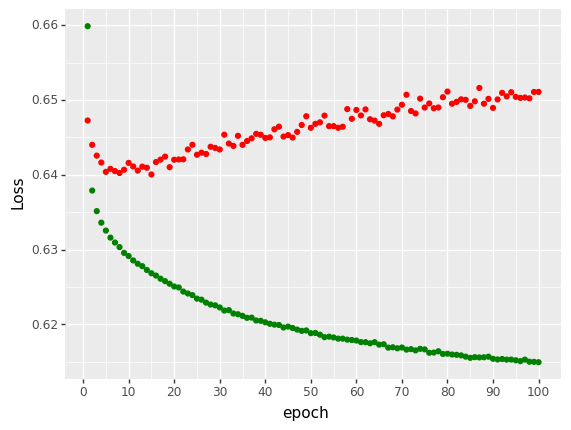

<ggplot: (138745132882)>

In [624]:
from plotnine import ggplot, aes, geom_point, scale_x_continuous, ylab
import numpy as np
import pandas as pd

# plot the training loss over epochs
def plot_loss(nn_model):
    loss_df = pd.DataFrame({
        'train_loss': nn_model.history.history['loss'],
        'val_loss': nn_model.history.history['val_loss']
    })
    loss_df = loss_df.assign(epoch = np.arange(1, len(loss_df['train_loss']) + 1))

    p = (
        ggplot(loss_df) +
        geom_point(aes(x='epoch', y='train_loss'), color='green') +
        geom_point(aes(x='epoch', y='val_loss'), color='red') +
        scale_x_continuous(breaks = np.arange(0, 150, 10)) +
        ylab("Loss")
    )
    return p

plot_loss(simple_nn6_new)


The plot above shows an extreme overfit as there is a great discrepancy between the validation loss and training loss.

In [625]:
# Assuming you have a list of the original column names
original_columns = X6.columns  # Replace this with your actual column names list

# Convert numpy arrays back to pandas DataFrame
X6_train1 = pd.DataFrame(X6_train, columns=original_columns)
X6_val1 = pd.DataFrame(X6_val, columns=original_columns)

# Assuming y7_train and y7_val are 1-D numpy arrays, you can convert them to pandas Series
y6_train1 = pd.Series(y6_train)
y6_val1 = pd.Series(y6_val)

# Now you can concatenate
X6_train_validation = pd.concat([X6_train1, X6_val1])
y6_train_validation = pd.concat([y6_train1, y6_val1])


In [626]:
from sklearn.metrics import f1_score

final_nn6 = Sequential()
final_nn6.add(Dense(20, input_dim=X6_train.shape[1], activation='relu'))
final_nn6.add(Dense(1, activation='sigmoid'))
final_nn6.compile(loss='binary_crossentropy', optimizer='adam')
final_nn6.fit(X6_train_validation, y6_train_validation, epochs=50, batch_size = 20, verbose=0)
y_hat_test_nn6 = final_nn6.predict(X6_test)
y_hat_test_nn6 = np.where(y_hat_test_nn6 >= 0.5, 1, 0)
print("The f1 score of the 6th nn model is {}".format(f1_score(y6_test, y_hat_test_nn6)))

1368/1368 [==============================] - 2s 2ms/step
The f1 score of the 6th nn model is 0.753713396520017


In [627]:
import shap

# Initialize JavaScript visualization
shap.initjs()

# Select a random subset of the training data
background = X6_train.iloc[np.random.choice(X6_train.shape[0], 100, replace=False)]

# KernelExplainer
explainer = shap.KernelExplainer(final_nn6.predict, background)

# Calculate Shap values
shap_values_single = explainer.shap_values(X6_test.iloc[0,:].values.reshape(1,-1))

# Plot
shap.force_plot(explainer.expected_value[0], shap_values_single[0], X6_test.iloc[0,:])


4/4 [==============================] - 0s 4ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

6788/6788 [==============================] - 10s 1ms/step


The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 


The SHAP bar shows to what extent the features influence the probability of default or to be paid off. For example, a loan with a 60 month term increases the probability of default, whereas a loan with subgrade C3 will decrease the probability of default.

In [628]:
raise SystemExit("Stop right there!")

SystemExit: Stop right there!

To exit: use 'exit', 'quit', or Ctrl-D.


Running the code below takes approximately 160 minutes

keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
You have provided over 5k background samples! For better performance consider using smaller random sample.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


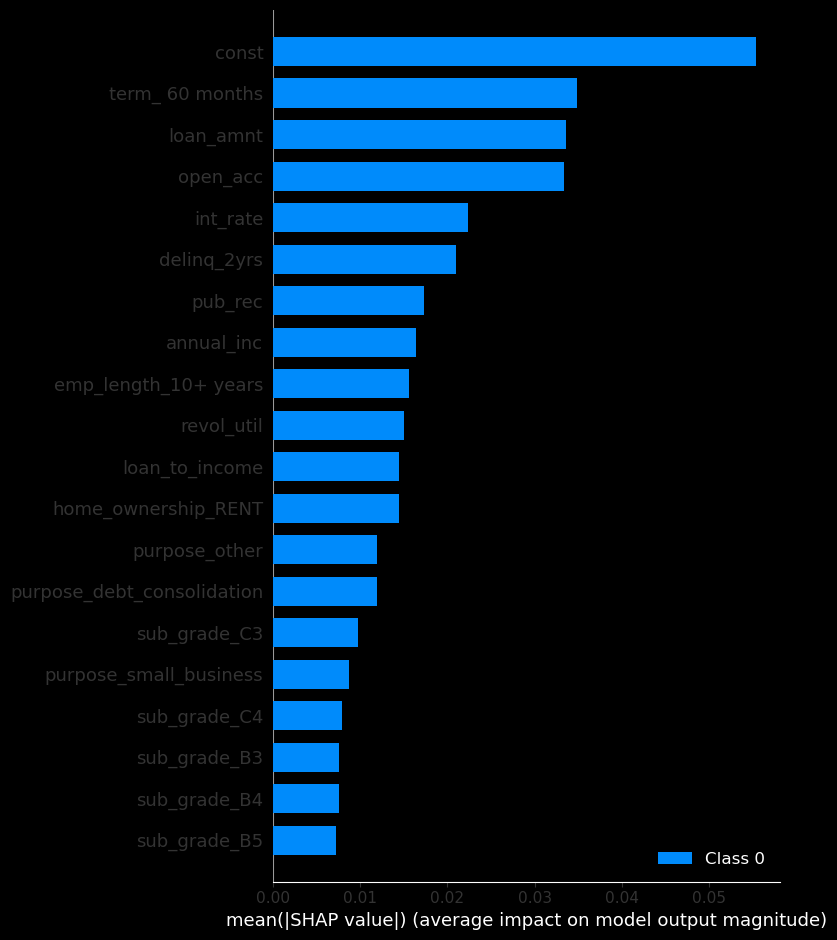

In [ ]:
import numpy as np
import shap
explainer = shap.DeepExplainer(final_nn6, X6_train.values)
X6_test_values = X6_test.values
shap_values6 = explainer.shap_values(X6_test_values)
shap.summary_plot(shap_values6, X6_test)

In [629]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score

# Classification report
print("Classification Report:\n", classification_report(y6_test, y_hat_test_nn6))

# AUC
auc = roc_auc_score(y6_test, y_hat_test_nn6)
print(f'AUC: {auc}')

# Confusion Matrix
cm = confusion_matrix(y6_test, y_hat_test_nn6)
print(f'Confusion Matrix: \n{cm}')


Classification Report:
               precision    recall  f1-score   support

           0       0.24      0.61      0.34      6708
           1       0.90      0.65      0.75     37055

    accuracy                           0.64     43763
   macro avg       0.57      0.63      0.55     43763
weighted avg       0.80      0.64      0.69     43763

AUC: 0.6304660222797309
Confusion Matrix: 
[[ 4118  2590]
 [13079 23976]]


Epoch 1/100
429/429 [==============================] - 8s 16ms/step - loss: 0.6437 - val_loss: 0.6446
Epoch 2/100
429/429 [==============================] - 1s 3ms/step - loss: 0.6331 - val_loss: 0.6426
Epoch 3/100
429/429 [==============================] - 2s 4ms/step - loss: 0.6300 - val_loss: 0.6406
Epoch 4/100
429/429 [==============================] - 2s 4ms/step - loss: 0.6279 - val_loss: 0.6400
Epoch 5/100
429/429 [==============================] - 2s 4ms/step - loss: 0.6253 - val_loss: 0.6416
Epoch 6/100
429/429 [==============================] - 2s 4ms/step - loss: 0.6232 - val_loss: 0.6433
Epoch 7/100
429/429 [==============================] - 2s 4ms/step - loss: 0.6210 - val_loss: 0.6433
Epoch 8/100
429/429 [==============================] - 2s 4ms/step - loss: 0.6180 - val_loss: 0.6456
Epoch 9/100
429/429 [==============================] - 1s 3ms/step - loss: 0.6153 - val_loss: 0.6468
Epoch 10/100
429/429 [==============================] - 2s 4ms/step - loss: 0.6125 - val_l

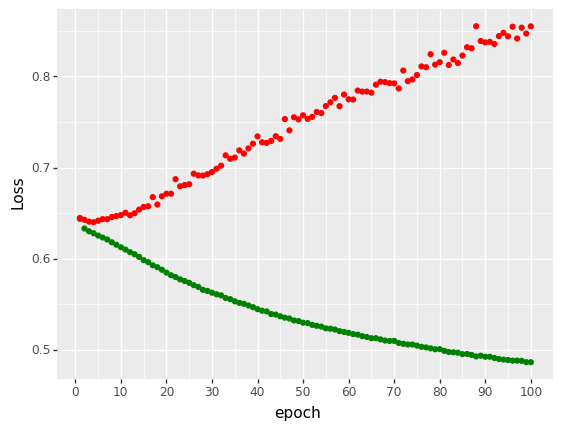

<ggplot: (138749919320)>

In [630]:
from keras.regularizers import l2
from plotnine import ggplot, aes, geom_point, scale_x_continuous, ylab
import pandas as pd
import numpy as np

def plot_loss(history):
    loss_df = pd.DataFrame({
        'train_loss': history.history['loss'],
        'val_loss': history.history['val_loss']
    })
    loss_df = loss_df.assign(epoch = np.arange(1, len(loss_df['train_loss']) + 1))

    p = (
        ggplot(loss_df) +
        geom_point(aes(x='epoch', y='train_loss'), color='green') +
        geom_point(aes(x='epoch', y='val_loss'), color='red') +
        scale_x_continuous(breaks = np.arange(0, 150, 10)) +
        ylab("Loss")
    )
    return p

oversized_nn6 = Sequential()
oversized_nn6.add(Dense(60, input_dim=X6_train.shape[1], activation='relu'))
oversized_nn6.add(Dense(40, activation='relu'))
oversized_nn6.add(Dense(15, activation='relu'))
oversized_nn6.add(Dense(1, activation='sigmoid'))
oversized_nn6.compile(loss="binary_crossentropy", optimizer="adam")

history_oversized_nn6 = oversized_nn6.fit(X6_train, y6_train, epochs=100, batch_size = 100, validation_data=(X6_val, y6_val))

# After the model has been trained, plot the loss
plot_loss(history_oversized_nn6)


As we can see from the graph, the additional hidden layers and neurons compared to the simple NN makes it extremely overfit immediately from the start. We can attempt to mitigate this effect by applying L2 regularization to the model.

Epoch 1/100
429/429 [==============================] - 9s 19ms/step - loss: 0.9211 - val_loss: 0.6753
Epoch 2/100
429/429 [==============================] - 2s 6ms/step - loss: 0.6603 - val_loss: 0.6639
Epoch 3/100
429/429 [==============================] - 2s 6ms/step - loss: 0.6555 - val_loss: 0.6602
Epoch 4/100
429/429 [==============================] - 3s 7ms/step - loss: 0.6537 - val_loss: 0.6609
Epoch 5/100
429/429 [==============================] - 3s 6ms/step - loss: 0.6526 - val_loss: 0.6587
Epoch 6/100
429/429 [==============================] - 3s 7ms/step - loss: 0.6520 - val_loss: 0.6587
Epoch 7/100
429/429 [==============================] - 3s 6ms/step - loss: 0.6509 - val_loss: 0.6572
Epoch 8/100
429/429 [==============================] - 3s 7ms/step - loss: 0.6506 - val_loss: 0.6568
Epoch 9/100
429/429 [==============================] - 3s 6ms/step - loss: 0.6502 - val_loss: 0.6568
Epoch 10/100
429/429 [==============================] - 2s 5ms/step - loss: 0.6500 - val_l

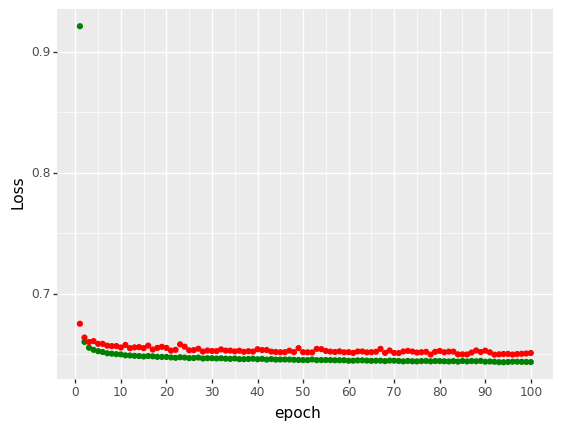

<ggplot: (138832448729)>

In [631]:
from keras.regularizers import l2
from plotnine import ggplot, aes, geom_point, scale_x_continuous, ylab
import pandas as pd
import numpy as np

def plot_loss(history):
    loss_df = pd.DataFrame({
        'train_loss': history.history['loss'],
        'val_loss': history.history['val_loss']
    })
    loss_df = loss_df.assign(epoch = np.arange(1, len(loss_df['train_loss']) + 1))

    p = (
        ggplot(loss_df) +
        geom_point(aes(x='epoch', y='train_loss'), color='green') +
        geom_point(aes(x='epoch', y='val_loss'), color='red') +
        scale_x_continuous(breaks = np.arange(0, 150, 10)) +
        ylab("Loss")
    )
    return p

oversized_nn6 = Sequential()
oversized_nn6.add(Dense(60, input_dim=X6_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)))
oversized_nn6.add(Dense(40, activation='relu', kernel_regularizer=l2(0.01)))
oversized_nn6.add(Dense(15, activation='relu', kernel_regularizer=l2(0.01)))
oversized_nn6.add(Dense(1, activation='sigmoid'))
oversized_nn6.compile(loss="binary_crossentropy", optimizer="adam")

history_oversized_nn6 = oversized_nn6.fit(X6_train, y6_train, epochs=100, batch_size = 100, validation_data=(X6_val, y6_val))

# After the model has been trained, plot the loss
plot_loss(history_oversized_nn6)


We see that L2 regularization has limited the losses of the validation set. However, it is too similar to the training set, which may indicate underfitting. Therefore, we adjust the L2 regularization factor.

Epoch 1/100
429/429 [==============================] - 7s 16ms/step - loss: 0.7207 - val_loss: 0.6889
Epoch 2/100
429/429 [==============================] - 2s 4ms/step - loss: 0.6682 - val_loss: 0.6675
Epoch 3/100
429/429 [==============================] - 3s 6ms/step - loss: 0.6539 - val_loss: 0.6572
Epoch 4/100
429/429 [==============================] - 3s 6ms/step - loss: 0.6471 - val_loss: 0.6524
Epoch 5/100
429/429 [==============================] - 3s 6ms/step - loss: 0.6438 - val_loss: 0.6509
Epoch 6/100
429/429 [==============================] - 2s 4ms/step - loss: 0.6418 - val_loss: 0.6491
Epoch 7/100
429/429 [==============================] - 2s 5ms/step - loss: 0.6404 - val_loss: 0.6499
Epoch 8/100
429/429 [==============================] - 2s 5ms/step - loss: 0.6390 - val_loss: 0.6480
Epoch 9/100
429/429 [==============================] - 2s 5ms/step - loss: 0.6384 - val_loss: 0.6472
Epoch 10/100
429/429 [==============================] - 3s 6ms/step - loss: 0.6379 - val_l

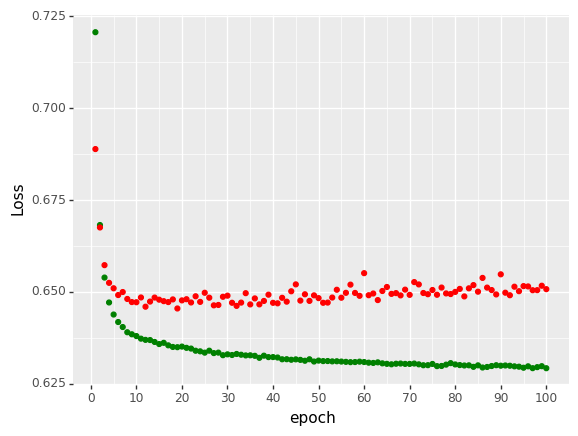

<ggplot: (138768709443)>

In [632]:
from keras.regularizers import L2
from plotnine import ggplot, aes, geom_point, scale_x_continuous, ylab
import pandas as pd
import numpy as np

def plot_loss(history):
    loss_df = pd.DataFrame({
        'train_loss': history.history['loss'],
        'val_loss': history.history['val_loss']
    })
    loss_df = loss_df.assign(epoch = np.arange(1, len(loss_df['train_loss']) + 1))

    p = (
        ggplot(loss_df) +
        geom_point(aes(x='epoch', y='train_loss'), color='green') +
        geom_point(aes(x='epoch', y='val_loss'), color='red') +
        scale_x_continuous(breaks = np.arange(0, 150, 10)) +
        ylab("Loss")
    )
    return p

oversized_nn6 = Sequential()
oversized_nn6.add(Dense(60, input_dim=X6_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
oversized_nn6.add(Dense(40, activation='relu', kernel_regularizer=l2(0.001)))
oversized_nn6.add(Dense(15, activation='relu', kernel_regularizer=l2(0.001)))
oversized_nn6.add(Dense(1, activation='sigmoid'))
oversized_nn6.compile(loss="binary_crossentropy", optimizer="adam")

history_oversized_nn6 = oversized_nn6.fit(X6_train, y6_train, epochs=100, batch_size = 100, validation_data=(X6_val, y6_val))

# After the model has been trained, plot the loss
plot_loss(history_oversized_nn6)


L2 regularization with factor 0.001 shows much better results compared to factor 0.01. Although, the validation loss is still slightly increasing after the 10th epoch,factor 0.001 seems optimal, as it is around the 0.650. We attempt to further improve the model by adjusting the learning rate.

Epoch 1/100
429/429 [==============================] - 9s 18ms/step - loss: 0.8299 - val_loss: 0.8012
Epoch 2/100
429/429 [==============================] - 2s 5ms/step - loss: 0.7823 - val_loss: 0.7705
Epoch 3/100
429/429 [==============================] - 3s 6ms/step - loss: 0.7559 - val_loss: 0.7500
Epoch 4/100
429/429 [==============================] - 2s 5ms/step - loss: 0.7369 - val_loss: 0.7340
Epoch 5/100
429/429 [==============================] - 2s 5ms/step - loss: 0.7212 - val_loss: 0.7204
Epoch 6/100
429/429 [==============================] - 2s 5ms/step - loss: 0.7075 - val_loss: 0.7090
Epoch 7/100
429/429 [==============================] - 2s 4ms/step - loss: 0.6961 - val_loss: 0.7001
Epoch 8/100
429/429 [==============================] - 2s 5ms/step - loss: 0.6878 - val_loss: 0.6942
Epoch 9/100
429/429 [==============================] - 3s 6ms/step - loss: 0.6819 - val_loss: 0.6891
Epoch 10/100
429/429 [==============================] - 3s 8ms/step - loss: 0.6775 - val_l

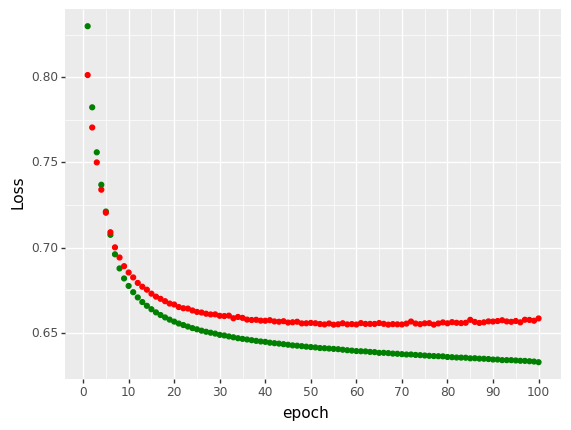

<ggplot: (138750040751)>

In [633]:
from keras.regularizers import L2
from plotnine import ggplot, aes, geom_point, scale_x_continuous, ylab
import pandas as pd
import numpy as np
from keras.optimizers import Adam


def plot_loss(history):
    loss_df = pd.DataFrame({
        'train_loss': history.history['loss'],
        'val_loss': history.history['val_loss']
    })
    loss_df = loss_df.assign(epoch = np.arange(1, len(loss_df['train_loss']) + 1))

    p = (
        ggplot(loss_df) +
        geom_point(aes(x='epoch', y='train_loss'), color='green') +
        geom_point(aes(x='epoch', y='val_loss'), color='red') +
        scale_x_continuous(breaks = np.arange(0, 150, 10)) +
        ylab("Loss")
    )
    return p

oversized_nn6 = Sequential()
oversized_nn6.add(Dense(60, input_dim=X6_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
oversized_nn6.add(Dense(40, activation='relu', kernel_regularizer=l2(0.001)))
oversized_nn6.add(Dense(15, activation='relu', kernel_regularizer=l2(0.001)))
oversized_nn6.add(Dense(5, activation='relu', kernel_regularizer=l2(0.001)))
oversized_nn6.add(Dense(1, activation='sigmoid'))

# Define custom learning rate
custom_adam = Adam(learning_rate=0.0001) 

oversized_nn6.compile(loss="binary_crossentropy", optimizer=custom_adam)

history_oversized_nn6 = oversized_nn6.fit(X6_train, y6_train, epochs=100, batch_size = 100, validation_data=(X6_val, y6_val))

# After the model has been trained, plot the loss
plot_loss(history_oversized_nn6)


After adjusting the learning rate, we see that the validation loss is significantly less scattered. Furtermore, the validation loss shows a decrease which is similar to the training loss. However, after the 50th epoch, the validation loss starts to increase slightly, which might suggests that the model starts to capture noise in the data. Thus, we add a early stoppage, and we fit the model to see how it performs on the test data.

In [634]:
from tensorflow.keras.callbacks import EarlyStopping

final_nn6 = Sequential()
final_nn6.add(Dense(60, input_dim=X6_train_validation.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
final_nn6.add(Dense(40, activation='relu', kernel_regularizer=l2(0.001)))
final_nn6.add(Dense(15, activation='relu', kernel_regularizer=l2(0.001)))
final_nn6.add(Dense(5, activation='relu', kernel_regularizer=l2(0.001)))
final_nn6.add(Dense(1, activation='sigmoid'))

# Define custom learning rate
custom_adam = Adam(learning_rate=0.0001)

final_nn6.compile(loss="binary_crossentropy", optimizer=custom_adam)

# Define the early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

final_nn6.fit(X6_train_validation, y6_train_validation, epochs=100, batch_size = 100, verbose=0, 
              callbacks=[early_stopping], validation_split=0.2)  # 20% of the data will be used for validation

y_hat_test_nn6 = final_nn6.predict(X6_test)
y_hat_test_nn6 = np.where(y_hat_test_nn6 >= 0.5, 1, 0)

print("The f1 score of the 6th nn model is {}".format(f1_score(y6_test, y_hat_test_nn6)))


1368/1368 [==============================] - 3s 2ms/step
The f1 score of the 6th nn model is 0.7297336585208277


1368/1368 [==============================] - 3s 2ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.23      0.66      0.35      6708
           1       0.91      0.61      0.73     37055

    accuracy                           0.62     43763
   macro avg       0.57      0.64      0.54     43763
weighted avg       0.81      0.62      0.67     43763

ROC AUC Score: 0.6901917623619808
Confusion Matrix: 
[[ 4440  2268]
 [14465 22590]]


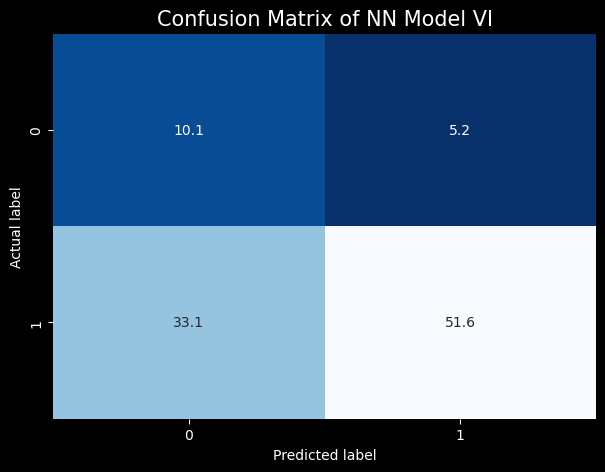

In [635]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Get the predictions
y_hat_test_nn6 = final_nn6.predict(X6_test)
y_hat_test_nn6_class = np.where(y_hat_test_nn6 >= 0.5, 1, 0)

# Classification report
print("Classification Report:\n", classification_report(y6_test, y_hat_test_nn6_class))

# ROC AUC score
print("ROC AUC Score:", roc_auc_score(y6_test, y_hat_test_nn6))

# Confusion Matrix
cm = confusion_matrix(y6_test, y_hat_test_nn6_class)
print(f'Confusion Matrix: \n{cm}')

# Calculate percentages in the confusion matrix
cm_percent = cm / cm.sum() * 100

# Plot confusion matrix with percentages
plt.figure(figsize=(7, 5))
sns.heatmap(cm_percent, annot=True, fmt=".1f", cmap='Blues_r', cbar=False)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix of NN Model VI', size=15)
plt.show()

The results of the model are fairly positive considering the fact that it was able to capture 62% of the loans. Additionally, the AUC score is 0.69 which is an acceptable rate. Since this model has the highest AUC score, we will perform a gridsearch and cross validation on the model to see if it holds true under other circumstances.

In [636]:

from scikeras.wrappers import KerasClassifier

In [637]:
# function that creates the model
# note that we pass the number of neurons as a parameter to the network
def create_model(neurons=60):
    nn_model6 = Sequential()
    nn_model6.add(Dense(neurons, input_dim=X6_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
    nn_model6.add(Dense(40, activation='relu', kernel_regularizer=l2(0.001)))
    nn_model6.add(Dense(15, activation='relu', kernel_regularizer=l2(0.001)))
    nn_model6.add(Dense(5, activation='relu', kernel_regularizer=l2(0.001)))
    nn_model6.add(Dense(1, activation='sigmoid'))

    # Define custom learning rate
    custom_adam = Adam(learning_rate=0.0001) 

    nn_model6.compile(loss="binary_crossentropy", optimizer=custom_adam)
    return nn_model6

seed = 1234
np.random.seed(seed)

# turn the keras model into a sklearn compatible model
# note that the neurons parameter needs to be specified in the interface of KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0, neurons=1)

In [638]:
# define the grid search parameters
batch_size = [50, 100, 150, 200]
epochs = [30, 50, 100]
neurons = [40, 50, 60, 100]
params_grid = dict(batch_size=batch_size, epochs=epochs, neurons=neurons)

In [639]:
params_grid

{'batch_size': [50, 100, 150, 200],
 'epochs': [30, 50, 100],
 'neurons': [40, 50, 60, 100]}

In [640]:
from sklearn.model_selection import PredefinedSplit, GridSearchCV

# use PredefinedSplit to specify which observations are train and which are validation
fold_index = PredefinedSplit([-1]* X6_train.shape[0] + [0] * X6_val.shape[0])

In [641]:
raise SystemExit("Stop right there!")

SystemExit: Stop right there!

To exit: use 'exit', 'quit', or Ctrl-D.


In [ ]:
import datetime
import os
import pickle
from sklearn.model_selection import GridSearchCV

start_time = datetime.datetime.now()
grid_search_nn = GridSearchCV(estimator=model, param_grid=params_grid, n_jobs=-1, cv=fold_index)
grid_search_nn = grid_search_nn.fit(X6_train_validation, y6_train_validation)
end_time = datetime.datetime.now()
print(f'hypertuning with sklearn grid search for neural networks complete in {round((end_time - start_time).seconds/60, 2)} minutes')
# store the results of the grid search to disk
with open('../dataset/nn_grid_search.pickle', 'wb') as handle:
    pickle.dump(grid_search_nn, handle)


One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.


hypertuning with sklearn grid search for neural networks complete in 25.07 minutes
INFO:tensorflow:Assets written to: C:\Users\Lawrence\AppData\Local\Temp\tmpoossj4ce\assets


In [ ]:
grid_search_nn

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=KerasClassifier(build_fn=<function create_model at 0x00000204F5C22F70>, neurons=1, verbose=0),
             n_jobs=-1,
             param_grid={'batch_size': [50, 100, 150, 200],
                         'epochs': [30, 50, 100],
                         'neurons': [40, 50, 60, 100]})

In [ ]:
print("The best parameter combination is: {} with score: {}".format(grid_search_nn.best_params_, grid_search_nn.best_score_))

The best parameter combination is: {'batch_size': 50, 'epochs': 30, 'neurons': 40} with score: nan


In [ ]:
best_model6 = create_model(40)
best_model6.fit(X6_train_validation, y6_train_validation, epochs=30, batch_size=50, verbose=0)

In [ ]:
from sklearn.metrics import f1_score
y6_hat_test = best_model6.predict(X6_test)
y6_hat_test = np.where(y6_hat_test >= 0.5, 1, 0)
print("The f1 score of the 6th gridsearched nn model is {}".format(f1_score(y6_test, y6_hat_test)))

1368/1368 [==============================] - 4s 2ms/step
The f1 score of the 6th gridsearched nn model is 0.7479700583608221


Classification Report:
               precision    recall  f1-score   support

           0       0.24      0.64      0.35      6708
           1       0.91      0.64      0.75     37055

    accuracy                           0.64     43763
   macro avg       0.57      0.64      0.55     43763
weighted avg       0.80      0.64      0.69     43763

AUC: 0.637895575699453
Confusion Matrix: 
[[ 4289  2419]
 [13473 23582]]


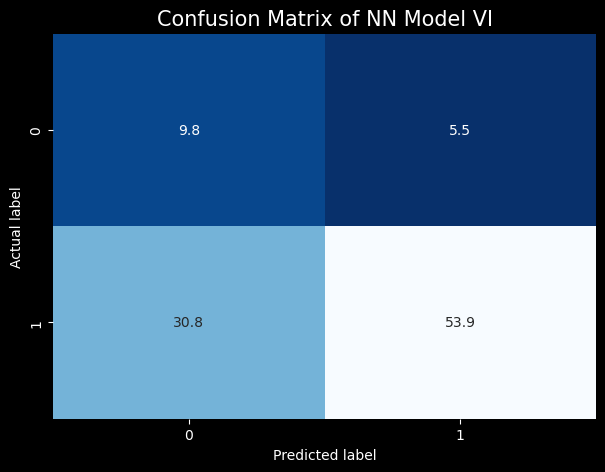

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score

# Classification report
print("Classification Report:\n", classification_report(y6_test, y6_hat_test))

# AUC
auc = roc_auc_score(y6_test, y6_hat_test)
print(f'AUC: {auc}')

# Confusion Matrix
cm = confusion_matrix(y6_test, y6_hat_test)
print(f'Confusion Matrix: \n{cm}')

# Calculate percentages in the confusion matrix
cm_percent = cm / cm.sum() * 100

# Plot confusion matrix with percentages
plt.figure(figsize=(7, 5))
sns.heatmap(cm_percent, annot=True, fmt=".1f", cmap='Blues_r', cbar=False)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix of NN Model VI', size=15)
plt.show()


The results of the grid searched & cross validated model slightly increased the AUC score from 0.63 to 0.64, while the F1 scores and accuracy remained relatively the same.

In [ ]:
import shap

# Initialize JavaScript visualization
shap.initjs()

# Select a random subset of the training data
background = X6_train.iloc[np.random.choice(X6_train.shape[0], 100, replace=False)]

# KernelExplainer
explainer = shap.KernelExplainer(best_model6.predict, background)

# Calculate Shap values
shap_values_single = explainer.shap_values(X6_test.iloc[0,:].values.reshape(1,-1))

# Plot
shap.force_plot(explainer.expected_value[0], shap_values_single[0], X6_test.iloc[0,:])


4/4 [==============================] - 0s 2ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

6788/6788 [==============================] - 10s 1ms/step


The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The SHAP values of the final model suggests that a loan granted for the purpose of "credit card" has the highest influence for the probability of default followed by a term of 60 months and interest rate. In contrast, the number of open accounts and debt consolidation purposes have the opposite effect, and decreases the probability of default. 

In [ ]:
raise SystemExit("Stop right there!")

SystemExit: Stop right there!

To exit: use 'exit', 'quit', or Ctrl-D.


# Neural Network Model VII

In [642]:
print(f"The number of neurons for the input layer must be: {X7_train.shape[1]}")

The number of neurons for the input layer must be: 79


In [643]:
# define the neural network model class instance
simple_nn7 = Sequential()
# add the first input layer with 79 nodes and the first hidden layer, with  relu activation function
# note that the first command does two things: create a first input layer with 29 nodes, and then a hidden layer
# we set the number of neurons to be equal to the (# of nodes in the input layer + # neurons in the output layer)/2,
# i.e. the mean of the number of neurons in the input layer and the output layer. This is usually a good heuristic to get started.
simple_nn7.add(Dense(40, input_dim=X7_train.shape[1], activation='relu'))
# add the output layer with sigmoid function (the sigmoid function is exactly the same as that used in the formulation of logisitc regression
simple_nn7.add(Dense(1, activation='sigmoid'))

In [644]:
print(simple_nn7.summary())

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_129 (Dense)           (None, 40)                3200      
                                                                 
 dense_130 (Dense)           (None, 1)                 41        
                                                                 
Total params: 3,241
Trainable params: 3,241
Non-trainable params: 0
_________________________________________________________________
None


In [645]:
simple_nn7.compile(loss='binary_crossentropy', optimizer='adam')

In [646]:
print(X7_train.shape)
print(y7_train.shape)
print(X7_val.shape)
print(y7_val.shape)

(42881, 79)
(42881,)
(10721, 79)
(10721,)


In [647]:
simple_nn7.fit(X7_train, y7_train, epochs=100, batch_size = 150)

Epoch 1/100
286/286 [==============================] - 1s 2ms/step - loss: 0.6466
Epoch 2/100
286/286 [==============================] - 1s 3ms/step - loss: 0.6347
Epoch 3/100
286/286 [==============================] - 1s 3ms/step - loss: 0.6323
Epoch 4/100
286/286 [==============================] - 1s 3ms/step - loss: 0.6305
Epoch 5/100
286/286 [==============================] - 1s 3ms/step - loss: 0.6294
Epoch 6/100
286/286 [==============================] - 1s 3ms/step - loss: 0.6280
Epoch 7/100
286/286 [==============================] - 1s 3ms/step - loss: 0.6268
Epoch 8/100
286/286 [==============================] - 1s 3ms/step - loss: 0.6258
Epoch 9/100
286/286 [==============================] - 1s 3ms/step - loss: 0.6247
Epoch 10/100
286/286 [==============================] - 1s 3ms/step - loss: 0.6236
Epoch 11/100
286/286 [==============================] - 1s 3ms/step - loss: 0.6228
Epoch 12/100
286/286 [==============================] - 1s 3ms/step - loss: 0.6217
Epoch 13/100


dict_keys(['loss'])


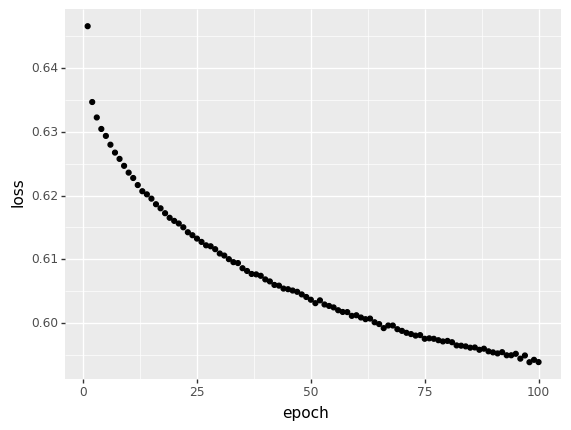

<ggplot: (138596181330)>

In [648]:
from plotnine import ggplot, aes, geom_point
import numpy as np
import pandas as pd

# see what information has been logged during the training process
print(simple_nn7.history.history.keys())

# plot the training loss over epochs
loss_df = pd.DataFrame(simple_nn7.history.history['loss'])
loss_df.columns = ['loss']
loss_df = loss_df.assign(epoch = np.arange(1, len(loss_df) + 1))

(
    ggplot(loss_df, aes(x='epoch', y='loss')) +
    geom_point()
)


The learning rate on the training set looks positive, as it is on a down ward trend.

In [649]:
simple_nn7.fit(X7_train, y7_train, epochs=100, batch_size = 100, validation_data=(X7_val, y7_val))

Epoch 1/100
429/429 [==============================] - 7s 16ms/step - loss: 0.5965 - val_loss: 0.6675
Epoch 2/100
429/429 [==============================] - 1s 3ms/step - loss: 0.5963 - val_loss: 0.6687
Epoch 3/100
429/429 [==============================] - 1s 3ms/step - loss: 0.5953 - val_loss: 0.6661
Epoch 4/100
429/429 [==============================] - 1s 3ms/step - loss: 0.5954 - val_loss: 0.6656
Epoch 5/100
429/429 [==============================] - 2s 4ms/step - loss: 0.5953 - val_loss: 0.6655
Epoch 6/100
429/429 [==============================] - 1s 3ms/step - loss: 0.5948 - val_loss: 0.6682
Epoch 7/100
429/429 [==============================] - 1s 3ms/step - loss: 0.5945 - val_loss: 0.6715
Epoch 8/100
429/429 [==============================] - 1s 3ms/step - loss: 0.5946 - val_loss: 0.6681
Epoch 9/100
429/429 [==============================] - 1s 3ms/step - loss: 0.5944 - val_loss: 0.6682
Epoch 10/100
429/429 [==============================] - 1s 3ms/step - loss: 0.5940 - val_l

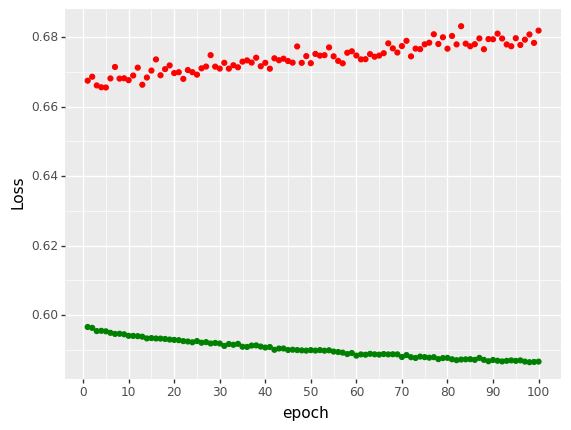

<ggplot: (138732460005)>

In [650]:
from plotnine import ggplot, aes, geom_point, scale_x_continuous, ylab
import numpy as np
import pandas as pd

# plot the training loss over epochs
def plot_loss(nn_model):
    loss_df = pd.DataFrame({
        'train_loss': nn_model.history.history['loss'],
        'val_loss': nn_model.history.history['val_loss']
    })
    loss_df = loss_df.assign(epoch = np.arange(1, len(loss_df['train_loss']) + 1))

    p = (
        ggplot(loss_df) +
        geom_point(aes(x='epoch', y='train_loss'), color='green') +
        geom_point(aes(x='epoch', y='val_loss'), color='red') +
        scale_x_continuous(breaks = np.arange(0, 150, 10)) +
        ylab("Loss")
    )
    return p

plot_loss(simple_nn7)


This plot shows an extreme case of overfitting, but it is not surprising since the model only had 1 layer with 40 neurons.

In [651]:
# Making a list of the original column names
original_columns = X7.columns

# Convert numpy arrays back to pandas DataFrame
X7_train1 = pd.DataFrame(X7_train, columns=original_columns)
X7_val1 = pd.DataFrame(X7_val, columns=original_columns)

# y7_train and y7_val are 1-D numpy arrays, converting them to pandas Series
y7_train1 = pd.Series(y7_train)
y7_val1 = pd.Series(y7_val)

# Concatenating the datasets
X7_train_validation = pd.concat([X7_train1, X7_val1])
y7_train_validation = pd.concat([y7_train1, y7_val1])


In [652]:
from sklearn.metrics import f1_score

final_nn7 = Sequential()
final_nn7.add(Dense(40, input_dim=X7_train.shape[1], activation='relu'))
final_nn7.add(Dense(1, activation='sigmoid'))
final_nn7.compile(loss='binary_crossentropy', optimizer='adam')
final_nn7.fit(X7_train_validation, y7_train_validation, epochs=50, batch_size = 20, verbose=0)
y_hat_test_nn7 = final_nn7.predict(X7_test)
y_hat_test_nn7 = np.where(y_hat_test_nn7 >= 0.5, 1, 0)
print("The f1 score of the 7th nn model is {}".format(f1_score(y7_test, y_hat_test_nn7)))

1368/1368 [==============================] - 3s 2ms/step
The f1 score of the 7th nn model is 0.7008088040307611


Validation Set Classification report: 
               precision    recall  f1-score   support

           0       0.22      0.68      0.34      6708
           1       0.91      0.57      0.70     37055

    accuracy                           0.59     43763
   macro avg       0.57      0.63      0.52     43763
weighted avg       0.80      0.59      0.64     43763

AUC: 0.6258421461208488
Confusion Matrix: 
[[ 4569  2139]
 [15913 21142]]


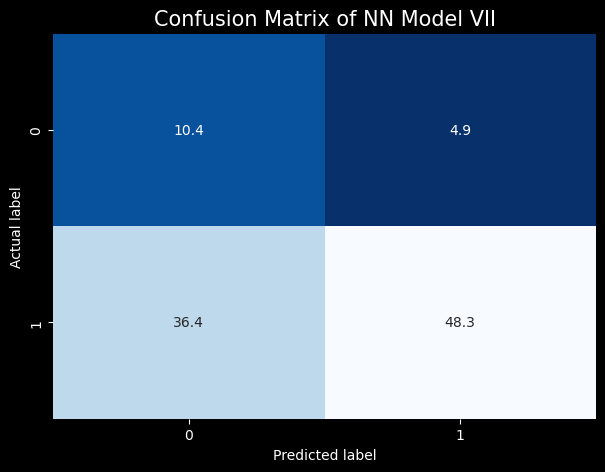

In [653]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score

# Print classification report
print("Validation Set Classification report: \n", classification_report(y7_test, y_hat_test_nn7))

# AUC
auc = roc_auc_score(y7_test, y_hat_test_nn7)
print(f'AUC: {auc}')

# Confusion Matrix
cm = confusion_matrix(y7_test, y_hat_test_nn7)
print(f'Confusion Matrix: \n{cm}')

# Calculate percentages in the confusion matrix
cm_percent = cm / cm.sum() * 100

# Plot confusion matrix with percentages
plt.figure(figsize=(7, 5))
sns.heatmap(cm_percent, annot=True, fmt=".1f", cmap='Blues_r', cbar=False)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix of NN Model VII', size=15)
plt.show()

Despite the extreme overfit, the model was still able to generate relatively good results. The F1 and accuracy score are comparable to the best performance of model 6. However, the AUC score of 0.62 shows that is has trouble to classify. The following codes should perform better as we enhance the model with more layers.

In [654]:
oversized_nn7 = Sequential()
oversized_nn7.add(Dense(60, input_dim=X7_train.shape[1], activation='relu'))
oversized_nn7.add(Dense(40, activation='relu'))
oversized_nn7.add(Dense(15, activation='relu'))
oversized_nn7.add(Dense(1, activation='sigmoid'))
oversized_nn7.compile(loss="binary_crossentropy", optimizer="adam")
oversized_nn7.fit(X7_train, y7_train, epochs=150, batch_size = 100, validation_data=(X7_val, y7_val))

Epoch 1/150
429/429 [==============================] - 10s 22ms/step - loss: 0.6435 - val_loss: 0.6436
Epoch 2/150
429/429 [==============================] - 2s 5ms/step - loss: 0.6327 - val_loss: 0.6416
Epoch 3/150
429/429 [==============================] - 2s 6ms/step - loss: 0.6293 - val_loss: 0.6418
Epoch 4/150
429/429 [==============================] - 2s 5ms/step - loss: 0.6260 - val_loss: 0.6425
Epoch 5/150
429/429 [==============================] - 2s 4ms/step - loss: 0.6236 - val_loss: 0.6440
Epoch 6/150
429/429 [==============================] - 2s 5ms/step - loss: 0.6209 - val_loss: 0.6436
Epoch 7/150
429/429 [==============================] - 2s 5ms/step - loss: 0.6179 - val_loss: 0.6461
Epoch 8/150
429/429 [==============================] - 2s 5ms/step - loss: 0.6148 - val_loss: 0.6519
Epoch 9/150
429/429 [==============================] - 2s 6ms/step - loss: 0.6115 - val_loss: 0.6497
Epoch 10/150
429/429 [==============================] - 2s 5ms/step - loss: 0.6082 - val_

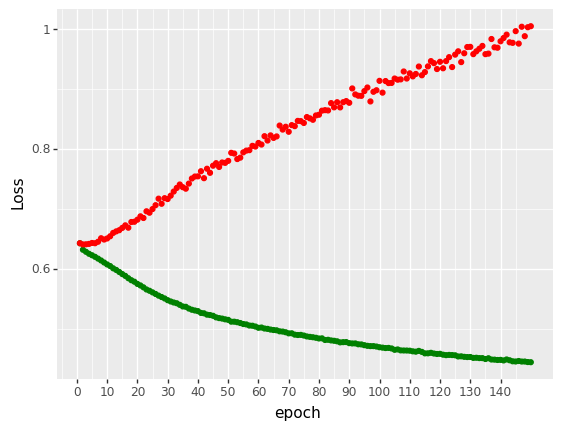

<ggplot: (138789593113)>

In [655]:
plot_loss(oversized_nn7)

As expected, the additional layers and neurons has caused the model to overfit as we had seen in model 6. We apply L2 regularization.

Epoch 1/100
429/429 [==============================] - 14s 30ms/step - loss: 0.9430 - val_loss: 0.6784
Epoch 2/100
429/429 [==============================] - 2s 4ms/step - loss: 0.6619 - val_loss: 0.6660
Epoch 3/100
429/429 [==============================] - 2s 4ms/step - loss: 0.6560 - val_loss: 0.6641
Epoch 4/100
429/429 [==============================] - 2s 5ms/step - loss: 0.6537 - val_loss: 0.6599
Epoch 5/100
429/429 [==============================] - 2s 5ms/step - loss: 0.6526 - val_loss: 0.6583
Epoch 6/100
429/429 [==============================] - 2s 4ms/step - loss: 0.6509 - val_loss: 0.6591
Epoch 7/100
429/429 [==============================] - 2s 6ms/step - loss: 0.6506 - val_loss: 0.6576
Epoch 8/100
429/429 [==============================] - 2s 5ms/step - loss: 0.6501 - val_loss: 0.6564
Epoch 9/100
429/429 [==============================] - 2s 4ms/step - loss: 0.6497 - val_loss: 0.6550
Epoch 10/100
429/429 [==============================] - 2s 5ms/step - loss: 0.6491 - val_

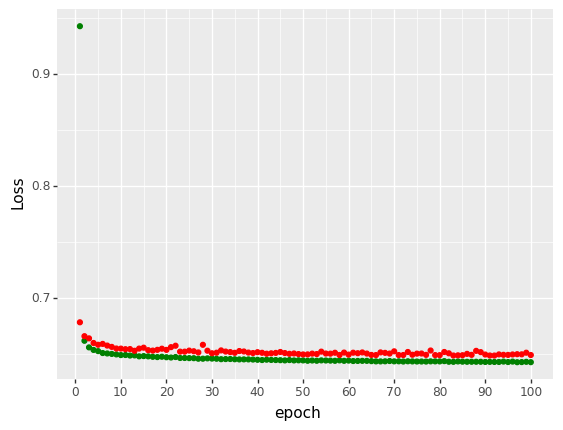

<ggplot: (138850177898)>

In [656]:
from keras.regularizers import l2
from plotnine import ggplot, aes, geom_point, scale_x_continuous, ylab
import pandas as pd
import numpy as np

def plot_loss(history):
    loss_df = pd.DataFrame({
        'train_loss': history.history['loss'],
        'val_loss': history.history['val_loss']
    })
    loss_df = loss_df.assign(epoch = np.arange(1, len(loss_df['train_loss']) + 1))

    p = (
        ggplot(loss_df) +
        geom_point(aes(x='epoch', y='train_loss'), color='green') +
        geom_point(aes(x='epoch', y='val_loss'), color='red') +
        scale_x_continuous(breaks = np.arange(0, 150, 10)) +
        ylab("Loss")
    )
    return p

oversized_nn7 = Sequential()
oversized_nn7.add(Dense(60, input_dim=X7_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)))
oversized_nn7.add(Dense(40, activation='relu', kernel_regularizer=l2(0.01)))
oversized_nn7.add(Dense(15, activation='relu', kernel_regularizer=l2(0.01)))
oversized_nn7.add(Dense(1, activation='sigmoid'))
oversized_nn7.compile(loss="binary_crossentropy", optimizer="adam")
history = oversized_nn7.fit(X7_train, y7_train, epochs=100, batch_size=100, validation_data=(X7_val, y7_val))

# After the model has been trained, plot the loss
plot_loss(history)


There is extreme underfit after applying Lasso 2 regularization of 0.01. We can attempt to minimize the effect by applying a smaller factor of L2.

Epoch 1/100
429/429 [==============================] - 8s 17ms/step - loss: 0.7173 - val_loss: 0.6850
Epoch 2/100
429/429 [==============================] - 2s 4ms/step - loss: 0.6658 - val_loss: 0.6726
Epoch 3/100
429/429 [==============================] - 2s 4ms/step - loss: 0.6520 - val_loss: 0.6578
Epoch 4/100
429/429 [==============================] - 2s 5ms/step - loss: 0.6462 - val_loss: 0.6554
Epoch 5/100
429/429 [==============================] - 2s 4ms/step - loss: 0.6427 - val_loss: 0.6506
Epoch 6/100
429/429 [==============================] - 2s 4ms/step - loss: 0.6409 - val_loss: 0.6493
Epoch 7/100
429/429 [==============================] - 2s 4ms/step - loss: 0.6397 - val_loss: 0.6468
Epoch 8/100
429/429 [==============================] - 2s 4ms/step - loss: 0.6389 - val_loss: 0.6481
Epoch 9/100
429/429 [==============================] - 2s 4ms/step - loss: 0.6377 - val_loss: 0.6484
Epoch 10/100
429/429 [==============================] - 2s 5ms/step - loss: 0.6372 - val_l

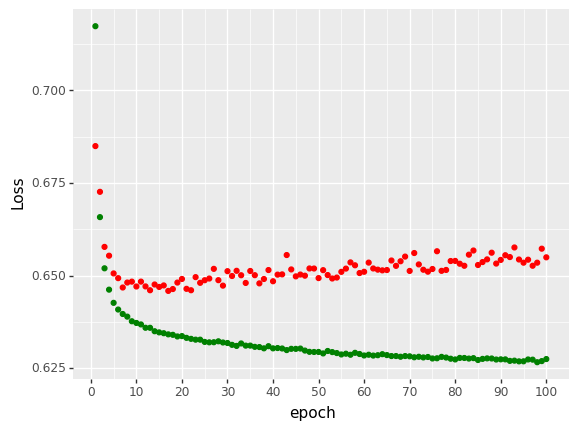

<ggplot: (138783325001)>

In [657]:
from keras.regularizers import l2
from plotnine import ggplot, aes, geom_point, scale_x_continuous, ylab
import pandas as pd
import numpy as np

def plot_loss(history):
    loss_df = pd.DataFrame({
        'train_loss': history.history['loss'],
        'val_loss': history.history['val_loss']
    })
    loss_df = loss_df.assign(epoch = np.arange(1, len(loss_df['train_loss']) + 1))

    p = (
        ggplot(loss_df) +
        geom_point(aes(x='epoch', y='train_loss'), color='green') +
        geom_point(aes(x='epoch', y='val_loss'), color='red') +
        scale_x_continuous(breaks = np.arange(0, 150, 10)) +
        ylab("Loss")
    )
    return p

oversized_nn7 = Sequential()
oversized_nn7.add(Dense(60, input_dim=X7_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
oversized_nn7.add(Dense(40, activation='relu', kernel_regularizer=l2(0.001)))
oversized_nn7.add(Dense(15, activation='relu', kernel_regularizer=l2(0.001)))
oversized_nn7.add(Dense(1, activation='sigmoid'))
oversized_nn7.compile(loss="binary_crossentropy", optimizer="adam")

history_oversized_nn7 = oversized_nn7.fit(X7_train, y7_train, epochs=100, batch_size = 100, validation_data=(X7_val, y7_val))

# After the model has been trained, plot the loss
plot_loss(history_oversized_nn7)


After applying L2 by factor 0.001, we can see that our model is slightly overfitting. We try again with factor 0.002.

Epoch 1/100
429/429 [==============================] - 8s 18ms/step - loss: 0.7612 - val_loss: 0.6834
Epoch 2/100
429/429 [==============================] - 1s 3ms/step - loss: 0.6631 - val_loss: 0.6603
Epoch 3/100
429/429 [==============================] - 2s 5ms/step - loss: 0.6508 - val_loss: 0.6575
Epoch 4/100
429/429 [==============================] - 2s 4ms/step - loss: 0.6468 - val_loss: 0.6522
Epoch 5/100
429/429 [==============================] - 2s 4ms/step - loss: 0.6448 - val_loss: 0.6529
Epoch 6/100
429/429 [==============================] - 2s 4ms/step - loss: 0.6434 - val_loss: 0.6565
Epoch 7/100
429/429 [==============================] - 2s 4ms/step - loss: 0.6431 - val_loss: 0.6491
Epoch 8/100
429/429 [==============================] - 1s 3ms/step - loss: 0.6425 - val_loss: 0.6480
Epoch 9/100
429/429 [==============================] - 2s 4ms/step - loss: 0.6417 - val_loss: 0.6481
Epoch 10/100
429/429 [==============================] - 2s 4ms/step - loss: 0.6412 - val_l

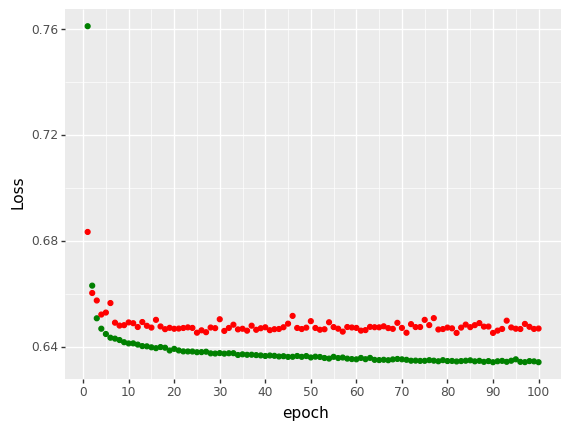

<ggplot: (138748727471)>

In [658]:
from keras.regularizers import l2
from plotnine import ggplot, aes, geom_point, scale_x_continuous, ylab
import pandas as pd
import numpy as np

def plot_loss(history):
    loss_df = pd.DataFrame({
        'train_loss': history.history['loss'],
        'val_loss': history.history['val_loss']
    })
    loss_df = loss_df.assign(epoch = np.arange(1, len(loss_df['train_loss']) + 1))

    p = (
        ggplot(loss_df) +
        geom_point(aes(x='epoch', y='train_loss'), color='green') +
        geom_point(aes(x='epoch', y='val_loss'), color='red') +
        scale_x_continuous(breaks = np.arange(0, 150, 10)) +
        ylab("Loss")
    )
    return p

oversized_nn7 = Sequential()
oversized_nn7.add(Dense(60, input_dim=X7_train.shape[1], activation='relu', kernel_regularizer=l2(0.002)))
oversized_nn7.add(Dense(40, activation='relu', kernel_regularizer=l2(0.002)))
oversized_nn7.add(Dense(15, activation='relu', kernel_regularizer=l2(0.002)))
oversized_nn7.add(Dense(1, activation='sigmoid'))
oversized_nn7.compile(loss="binary_crossentropy", optimizer="adam")

history_oversized_nn7_1 = oversized_nn7.fit(X7_train, y7_train, epochs=100, batch_size = 100, validation_data=(X7_val, y7_val))

# After the model has been trained, plot the loss
plot_loss(history_oversized_nn7_1)


This looks a lot better, but let's see how it looks when we apply factor 0.0015

Epoch 1/100
429/429 [==============================] - 10s 21ms/step - loss: 0.7389 - val_loss: 0.6890
Epoch 2/100
429/429 [==============================] - 2s 5ms/step - loss: 0.6664 - val_loss: 0.6649
Epoch 3/100
429/429 [==============================] - 2s 5ms/step - loss: 0.6513 - val_loss: 0.6567
Epoch 4/100
429/429 [==============================] - 2s 5ms/step - loss: 0.6457 - val_loss: 0.6524
Epoch 5/100
429/429 [==============================] - 2s 5ms/step - loss: 0.6429 - val_loss: 0.6496
Epoch 6/100
429/429 [==============================] - 2s 5ms/step - loss: 0.6414 - val_loss: 0.6477
Epoch 7/100
429/429 [==============================] - 2s 5ms/step - loss: 0.6404 - val_loss: 0.6480
Epoch 8/100
429/429 [==============================] - 2s 5ms/step - loss: 0.6397 - val_loss: 0.6470
Epoch 9/100
429/429 [==============================] - 2s 6ms/step - loss: 0.6397 - val_loss: 0.6480
Epoch 10/100
429/429 [==============================] - 2s 5ms/step - loss: 0.6388 - val_

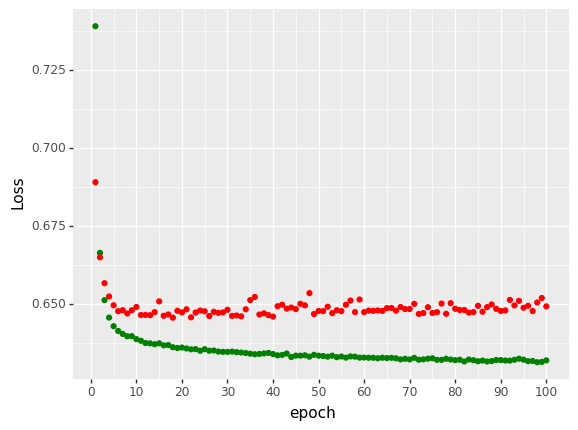

<ggplot: (138764059368)>

In [659]:
from keras.regularizers import l2
from plotnine import ggplot, aes, geom_point, scale_x_continuous, ylab
import pandas as pd
import numpy as np

def plot_loss(history):
    loss_df = pd.DataFrame({
        'train_loss': history.history['loss'],
        'val_loss': history.history['val_loss']
    })
    loss_df = loss_df.assign(epoch = np.arange(1, len(loss_df['train_loss']) + 1))

    p = (
        ggplot(loss_df) +
        geom_point(aes(x='epoch', y='train_loss'), color='green') +
        geom_point(aes(x='epoch', y='val_loss'), color='red') +
        scale_x_continuous(breaks = np.arange(0, 150, 10)) +
        ylab("Loss")
    )
    return p

oversized_nn7 = Sequential()
oversized_nn7.add(Dense(60, input_dim=X7_train.shape[1], activation='relu', kernel_regularizer=l2(0.0015)))
oversized_nn7.add(Dense(40, activation='relu', kernel_regularizer=l2(0.0015)))
oversized_nn7.add(Dense(15, activation='relu', kernel_regularizer=l2(0.0015)))
oversized_nn7.add(Dense(1, activation='sigmoid'))
oversized_nn7.compile(loss="binary_crossentropy", optimizer="adam")

history_oversized_nn7_2 = oversized_nn7.fit(X7_train, y7_train, epochs=100, batch_size = 100, validation_data=(X7_val, y7_val))

# After the model has been trained, plot the loss
plot_loss(history_oversized_nn7_2)


Applying factor 0.0015 provides us with a result which look similar to model 6. To further improve it, we can attempt a custom learning rate of 0.0001 and L2 regularization of factor 0.001. And a third hidden layer.

Epoch 1/100
429/429 [==============================] - 15s 19ms/step - loss: 0.8101 - val_loss: 0.7784
Epoch 2/100
429/429 [==============================] - 2s 4ms/step - loss: 0.7479 - val_loss: 0.7342
Epoch 3/100
429/429 [==============================] - 2s 5ms/step - loss: 0.7172 - val_loss: 0.7165
Epoch 4/100
429/429 [==============================] - 2s 5ms/step - loss: 0.7020 - val_loss: 0.7047
Epoch 5/100
429/429 [==============================] - 2s 4ms/step - loss: 0.6914 - val_loss: 0.6966
Epoch 6/100
429/429 [==============================] - 2s 4ms/step - loss: 0.6837 - val_loss: 0.6894
Epoch 7/100
429/429 [==============================] - 2s 4ms/step - loss: 0.6778 - val_loss: 0.6842
Epoch 8/100
429/429 [==============================] - 2s 4ms/step - loss: 0.6731 - val_loss: 0.6804
Epoch 9/100
429/429 [==============================] - 2s 4ms/step - loss: 0.6694 - val_loss: 0.6773
Epoch 10/100
429/429 [==============================] - 2s 4ms/step - loss: 0.6664 - val_

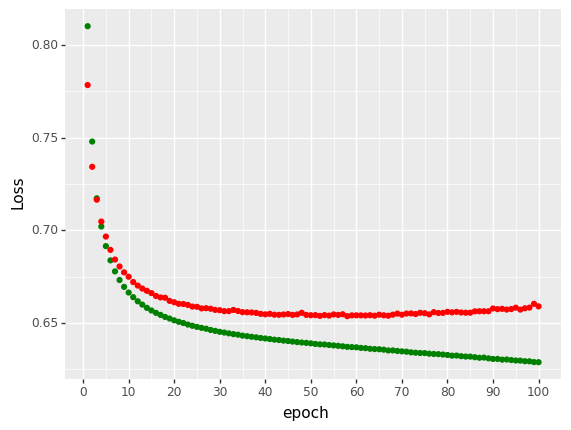

<ggplot: (138888562728)>

In [660]:
from keras.regularizers import l2
from plotnine import ggplot, aes, geom_point, scale_x_continuous, ylab
import pandas as pd
import numpy as np

def plot_loss(history):
    loss_df = pd.DataFrame({
        'train_loss': history.history['loss'],
        'val_loss': history.history['val_loss']
    })
    loss_df = loss_df.assign(epoch = np.arange(1, len(loss_df['train_loss']) + 1))

    p = (
        ggplot(loss_df) +
        geom_point(aes(x='epoch', y='train_loss'), color='green') +
        geom_point(aes(x='epoch', y='val_loss'), color='red') +
        scale_x_continuous(breaks = np.arange(0, 150, 10)) +
        ylab("Loss")
    )
    return p

oversized_nn7 = Sequential()
oversized_nn7.add(Dense(60, input_dim=X7_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
oversized_nn7.add(Dense(40, activation='relu', kernel_regularizer=l2(0.001)))
oversized_nn7.add(Dense(15, activation='relu', kernel_regularizer=l2(0.001)))
oversized_nn7.add(Dense(5, activation='relu', kernel_regularizer=l2(0.001)))
oversized_nn7.add(Dense(1, activation='sigmoid'))

# Define custom learning rate
custom_adam = Adam(learning_rate=0.0001)

oversized_nn7.compile(loss="binary_crossentropy", optimizer=custom_adam)

history_oversized_nn7_2 = oversized_nn7.fit(X7_train, y7_train, epochs=100, batch_size = 100, validation_data=(X7_val, y7_val))

# After the model has been trained, plot the loss
plot_loss(history_oversized_nn7_2)


The adjusted learning rate smoothed out the validation and training losses, but we can see that it is starting to overfit at the the 50th epoch approximately, we can tune this a little bit more by adjusting the L2 to 0.0015 and adding an early stoppage.

Epoch 1/100
429/429 [==============================] - 9s 20ms/step - loss: 0.8751 - val_loss: 0.8353
Epoch 2/100
429/429 [==============================] - 2s 5ms/step - loss: 0.8066 - val_loss: 0.7886
Epoch 3/100
429/429 [==============================] - 3s 6ms/step - loss: 0.7681 - val_loss: 0.7583
Epoch 4/100
429/429 [==============================] - 3s 6ms/step - loss: 0.7413 - val_loss: 0.7368
Epoch 5/100
429/429 [==============================] - 2s 5ms/step - loss: 0.7211 - val_loss: 0.7198
Epoch 6/100
429/429 [==============================] - 2s 5ms/step - loss: 0.7053 - val_loss: 0.7066
Epoch 7/100
429/429 [==============================] - 2s 5ms/step - loss: 0.6929 - val_loss: 0.6971
Epoch 8/100
429/429 [==============================] - 2s 5ms/step - loss: 0.6839 - val_loss: 0.6902
Epoch 9/100
429/429 [==============================] - 2s 5ms/step - loss: 0.6779 - val_loss: 0.6856
Epoch 10/100
429/429 [==============================] - 2s 6ms/step - loss: 0.6734 - val_l

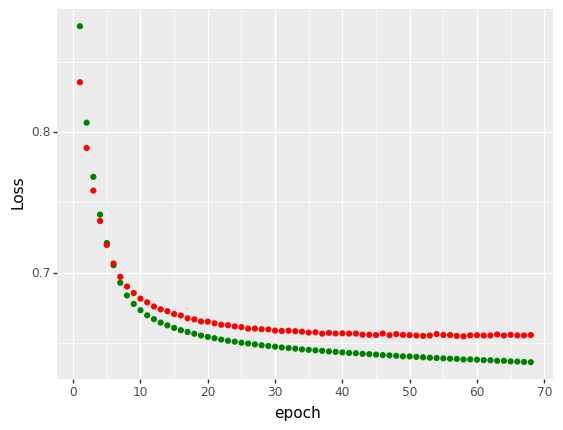

<ggplot: (138749058850)>

In [661]:
from keras.callbacks import EarlyStopping

# define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

oversized_nn7 = Sequential()
oversized_nn7.add(Dense(60, input_dim=X7_train.shape[1], activation='relu', kernel_regularizer=l2(0.0015)))
oversized_nn7.add(Dense(40, activation='relu', kernel_regularizer=l2(0.0015)))
oversized_nn7.add(Dense(15, activation='relu', kernel_regularizer=l2(0.0015)))
oversized_nn7.add(Dense(5, activation='relu', kernel_regularizer=l2(0.0015)))
oversized_nn7.add(Dense(1, activation='sigmoid'))

# Define custom learning rate
custom_adam = Adam(learning_rate=0.0001)

oversized_nn7.compile(loss="binary_crossentropy", optimizer=custom_adam)

# pass early_stopping as a callback in the fit method
history_oversized_nn7_2 = oversized_nn7.fit(X7_train, y7_train, epochs=100, batch_size = 100, validation_data=(X7_val, y7_val), callbacks=[early_stopping])

# After the model has been trained, plot the loss
plot_loss(history_oversized_nn7_2)


In [662]:
from tensorflow.keras.callbacks import EarlyStopping

final_nn7 = Sequential()
final_nn7.add(Dense(60, input_dim=X7_train_validation.shape[1], activation='relu', kernel_regularizer=l2(0.0015)))
final_nn7.add(Dense(40, activation='relu', kernel_regularizer=l2(0.0015)))
final_nn7.add(Dense(15, activation='relu', kernel_regularizer=l2(0.0015)))
final_nn7.add(Dense(5, activation='relu', kernel_regularizer=l2(0.0015)))
final_nn7.add(Dense(1, activation='sigmoid'))

# Define custom learning rate
custom_adam = Adam(learning_rate=0.0001)

final_nn7.compile(loss="binary_crossentropy", optimizer=custom_adam)

# Define the early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

final_nn7.fit(X7_train_validation, y7_train_validation, epochs=100, batch_size = 100, verbose=0, 
              callbacks=[early_stopping], validation_split=0.2)  # 20% of the data will be used for validation

y_hat_test_nn7 = final_nn7.predict(X7_test)
y_hat_test_nn7 = np.where(y_hat_test_nn7 >= 0.5, 1, 0)

print("The f1 score of the 7th nn model is {}".format(f1_score(y7_test, y_hat_test_nn7)))


1368/1368 [==============================] - 2s 2ms/step
The f1 score of the 7th nn model is 0.7311157758759891


1368/1368 [==============================] - 2s 2ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.24      0.67      0.35      6708
           1       0.91      0.61      0.73     37055

    accuracy                           0.62     43763
   macro avg       0.57      0.64      0.54     43763
weighted avg       0.81      0.62      0.67     43763

ROC AUC Score: 0.6922285097809853
Confusion Matrix: 
[[ 4472  2236]
 [14416 22639]]


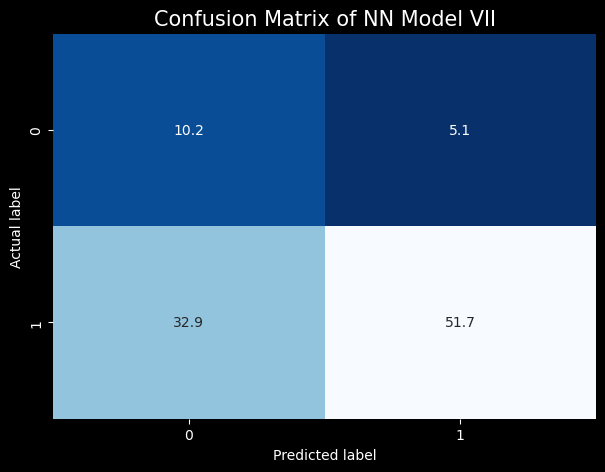

In [663]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Get the predictions
y_hat_test_nn7 = final_nn7.predict(X7_test)
y_hat_test_nn7_class = np.where(y_hat_test_nn7 >= 0.5, 1, 0)

# Classification report
print("Classification Report:\n", classification_report(y7_test, y_hat_test_nn7_class))

# ROC AUC score
print("ROC AUC Score:", roc_auc_score(y7_test, y_hat_test_nn7))

# Confusion Matrix
cm = confusion_matrix(y7_test, y_hat_test_nn7_class)
print(f'Confusion Matrix: \n{cm}')

# Calculate percentages in the confusion matrix
cm_percent = cm / cm.sum() * 100

# Plot confusion matrix with percentages
plt.figure(figsize=(7, 5))
sns.heatmap(cm_percent, annot=True, fmt=".1f", cmap='Blues_r', cbar=False)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix of NN Model VII', size=15)
plt.show()

This model now looks optimal for testing. We follow up by performing a Gridsearch in an attempt to find the optimal combination of neurons, batch size and epochs. 

In [664]:
# function that creates the model
def create_model(neurons=60):
    nn_model7 = Sequential()
    nn_model7.add(Dense(neurons, input_dim=X7_train.shape[1], activation="relu", kernel_regularizer=l2(0.0015)))
    nn_model7.add(Dense(40, activation='relu', kernel_regularizer=l2(0.0015)))
    nn_model7.add(Dense(15, activation='relu', kernel_regularizer=l2(0.0015)))
    nn_model7.add(Dense(5, activation='relu', kernel_regularizer=l2(0.0015)))
    nn_model7.add(Dense(1, activation='sigmoid'))

    # Define custom learning rate
    custom_adam = Adam(learning_rate=0.0001)

    nn_model7.compile(loss='binary_crossentropy', optimizer=custom_adam)
    return nn_model7

seed = 1234
np.random.seed(seed)

# turn the keras model into a sklearn compatible model
# note that the neurons parameter needs to be specified in the interface of KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0, neurons=60)

In [665]:
# define the grid search parameters
batch_size = [100, 150, 200]
epochs = [30, 50, 100]
neurons = [40, 50, 60, 100]
params_grid = dict(batch_size=batch_size, epochs=epochs, neurons=neurons)

In [666]:
params_grid

{'batch_size': [100, 150, 200],
 'epochs': [30, 50, 100],
 'neurons': [40, 50, 60, 100]}

In [667]:
from sklearn.model_selection import PredefinedSplit, GridSearchCV

# use PredefinedSplit to specify which observations are train and which are validation
fold_index = PredefinedSplit([-1]* X7_train.shape[0] + [0] * X7_val.shape[0])

In [668]:
raise SystemExit("Stop right there!")

SystemExit: Stop right there!

To exit: use 'exit', 'quit', or Ctrl-D.


In [ ]:
import datetime
import os
import pickle
from sklearn.model_selection import GridSearchCV

start_time = datetime.datetime.now()
grid_search_nn = GridSearchCV(estimator=model, param_grid=params_grid, n_jobs=-1, cv=fold_index)
grid_search_nn = grid_search_nn.fit(X7_train_validation, y7_train_validation)
end_time = datetime.datetime.now()
print(f'hypertuning with sklearn grid search for neural networks complete in {round((end_time - start_time).seconds/60, 2)} minutes')
# store the results of the grid search to disk
with open('../dataset/nn_grid_search.pickle', 'wb') as handle:
    pickle.dump(grid_search_nn, handle)


``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.


hypertuning with sklearn grid search for neural networks complete in 13.17 minutes
INFO:tensorflow:Assets written to: C:\Users\Lawrence\AppData\Local\Temp\tmpv9_cwp4q\assets


In [ ]:
grid_search_nn

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=KerasClassifier(build_fn=<function create_model at 0x000002D0300D01F0>, neurons=60, verbose=0),
             n_jobs=-1,
             param_grid={'batch_size': [100, 150, 200], 'epochs': [30, 50, 100],
                         'neurons': [40, 50, 60, 100]})

NameError: name 'grid_search_nn' is not defined

In [670]:
print("The best parameter combination is: {} with score: {}".format(grid_search_nn.best_params_, grid_search_nn.best_score_))

NameError: name 'grid_search_nn' is not defined

In [671]:
best_model7 = create_model(100)
best_model7.fit(X7_train_validation, y7_train_validation, epochs=100, batch_size=100, verbose=0)

In [672]:
y7_hat_test = best_model7.predict(X7_test)
y7_hat_test = np.where(y7_hat_test >= 0.5, 1, 0)

score = f1_score(y7_test, y7_hat_test)
print("The F1 score for the best NN of model 7 is: ", score)

1368/1368 [==============================] - 4s 3ms/step
The F1 score for the best NN of model 7 is:  0.7389770723104057


              precision    recall  f1-score   support

           0       0.24      0.66      0.35      6708
           1       0.91      0.62      0.74     37055

    accuracy                           0.63     43763
   macro avg       0.58      0.64      0.55     43763
weighted avg       0.81      0.63      0.68     43763

AUC: 0.6417557319226115
Confusion Matrix: 
[[ 4438  2270]
 [14010 23045]]


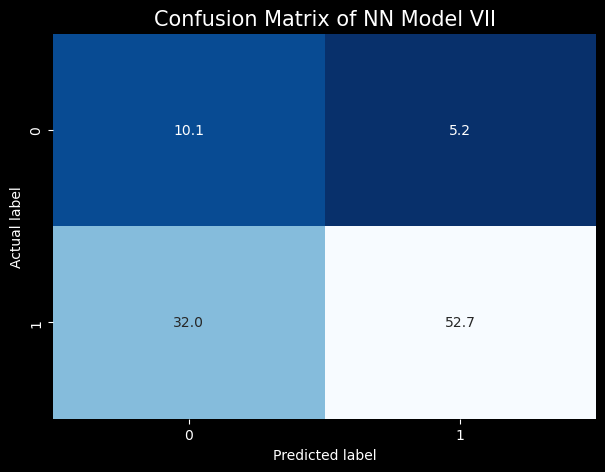

In [673]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score

# Compute and print the classification report
print(classification_report(y7_test, y7_hat_test))

# AUC
auc = roc_auc_score(y7_test, y7_hat_test)
print(f'AUC: {auc}')

# Confusion Matrix
cm = confusion_matrix(y7_test, y7_hat_test)
print(f'Confusion Matrix: \n{cm}')

# Calculate percentages in the confusion matrix
cm_percent = cm / cm.sum() * 100

# Plot confusion matrix with percentages
plt.figure(figsize=(7, 5))
sns.heatmap(cm_percent, annot=True, fmt=".1f", cmap='Blues_r', cbar=False)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix of NN Model VII', size=15)
plt.show()


In [674]:
import shap

# Initialize JavaScript visualization
shap.initjs()

# Select a random subset of the training data
background = X7_train.iloc[np.random.choice(X7_train.shape[0], 100, replace=False)]

# KernelExplainer
explainer = shap.KernelExplainer(best_model7.predict, background)

# Calculate Shap values
shap_values_single = explainer.shap_values(X7_test.iloc[0,:].values.reshape(1,-1))

# Plot
shap.force_plot(explainer.expected_value[0], shap_values_single[0], X7_test.iloc[0,:])


4/4 [==============================] - 0s 3ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

6819/6819 [==============================] - 11s 2ms/step


The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 


In [675]:
raise SystemExit("Stop right there!")

SystemExit: Stop right there!

To exit: use 'exit', 'quit', or Ctrl-D.


# Logistic Regression on Model VI

              precision    recall  f1-score   support

           0       0.24      0.66      0.35      6708
           1       0.91      0.62      0.74     37055

    accuracy                           0.63     43763
   macro avg       0.57      0.64      0.55     43763
weighted avg       0.81      0.63      0.68     43763

ROC AUC score:  0.6899292796482077
Confusion matrix:
 [[ 4400  2308]
 [13976 23079]]


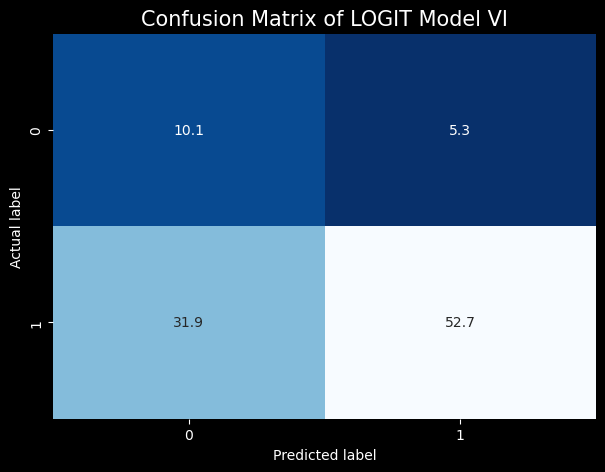

In [677]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create an instance of LogisticRegression
logreg6 = LogisticRegression(penalty='none', max_iter=1000)

# Fit the model using the training data
logreg6.fit(X6_train_validation, y6_train_validation)

# Use the model to make predictions on the test data
y6_pred = logreg6.predict(X6_test)

# Calculate the probabilities of each class
y6_pred_prob = logreg6.predict_proba(X6_test)[:, 1]

# Compute and print the classification report
print(classification_report(y6_test, y6_pred))

# Compute and print the ROC AUC score
print("ROC AUC score: ", roc_auc_score(y6_test, y6_pred_prob))

# Compute and print the confusion matrix
cm6 = confusion_matrix(y6_test, y6_pred)
print("Confusion matrix:\n", cm6)

# Calculate percentages in the confusion matrix
cm6_percent = cm6 / cm6.sum() * 100

# Plot confusion matrix with percentages
plt.figure(figsize=(7, 5))
sns.heatmap(cm6_percent, annot=True, fmt=".1f", cmap='Blues_r', cbar=False)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix of LOGIT Model VI', size=15)
plt.show()


Checking for overfitting

In [678]:
from sklearn.metrics import accuracy_score

# Make predictions on the training data
y6_train_pred = logreg6.predict(X6_train_validation)

# Make predictions on the test data
y6_test_pred = logreg6.predict(X6_test)

# Calculate and print the accuracy on the training data
train_accuracy6 = accuracy_score(y6_train_validation, y6_train_pred)
print("Training accuracy: ", train_accuracy6)

# Calculate and print the accuracy on the test data
test_accuracy6 = accuracy_score(y6_test, y6_test_pred)
print("Test accuracy: ", test_accuracy6)


Training accuracy:  0.6366366926607216
Test accuracy:  0.62790485112995


Training accuracy & test accuracy are very close, with a slightly better performance on the training data of approximately 0.008, which is negligible. Therefore, we can conclude that there is no overfitting.

In [679]:
import statsmodels.api as sm

# Adding constant is required for statsmodels logistic regression
X6_train_validation_sm = sm.add_constant(X6_train_validation)

# Fit model
logit_model=sm.Logit(y6_train_validation, X6_train_validation_sm)
result=logit_model.fit()

# Output model summary
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.634906
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                53602
Model:                          Logit   Df Residuals:                    53528
Method:                           MLE   Df Model:                           73
Date:                Mon, 19 Jun 2023   Pseudo R-squ.:                 0.08402
Time:                        18:14:59   Log-Likelihood:                -34032.
converged:                       True   LL-Null:                       -37154.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.1342      0.044     -3.044      0.002   

In [680]:
import numpy as np

# Assuming you have the coefficient for the intercept term
intercept_coef6 = -0.1178

# Calculate the log-odds of the base model
log_odds_base_model6 = intercept_coef6

# Calculate the odds of the base model
odds_base_model6 = np.exp(log_odds_base_model6)

# Display the log-odds and odds of the base model
print("Log-Odds of the Base Model:", log_odds_base_model6)
print("Odds of the Base Model:", odds_base_model6)

Log-Odds of the Base Model: -0.1178
Odds of the Base Model: 0.8888738096002463


In [681]:
import math

# Define the odds value
odds = odds_base_model6

# Calculate the probability
probability = odds / (1 + odds)

# Print the probability
print("Probability:", probability)


Probability: 0.4705840088853601


In [682]:
pd.set_option('display.max_rows', None)

# Get a Series object mapping each column name to its respective coefficient
coefficients = pd.Series(logreg6.coef_[0], index=X6_train_validation.columns)

# Print the coefficients sorted by absolute value
print(coefficients.abs().sort_values(ascending=False))


sub_grade_G3                   1.845498
sub_grade_G1                   1.811790
sub_grade_F4                   1.800315
sub_grade_F5                   1.796821
sub_grade_F3                   1.780609
sub_grade_F2                   1.687156
sub_grade_E4                   1.662197
sub_grade_E2                   1.524313
sub_grade_D4                   1.493104
sub_grade_E5                   1.487936
sub_grade_G5                   1.486741
sub_grade_G2                   1.470787
sub_grade_E1                   1.459744
sub_grade_D3                   1.419857
sub_grade_D2                   1.390109
sub_grade_D1                   1.387453
sub_grade_E3                   1.372794
sub_grade_C3                   1.361386
sub_grade_F1                   1.336835
sub_grade_C5                   1.325279
sub_grade_D5                   1.321555
sub_grade_C4                   1.300652
sub_grade_G4                   1.230867
sub_grade_C1                   1.193709
sub_grade_B5                   1.178771


# Logistic Regression on Model VII

              precision    recall  f1-score   support

           0       0.24      0.65      0.35      6708
           1       0.91      0.62      0.74     37055

    accuracy                           0.63     43763
   macro avg       0.57      0.64      0.54     43763
weighted avg       0.81      0.63      0.68     43763

ROC AUC score:  0.6909576829298613
Confusion matrix:
 [[ 4388  2320]
 [13987 23068]]


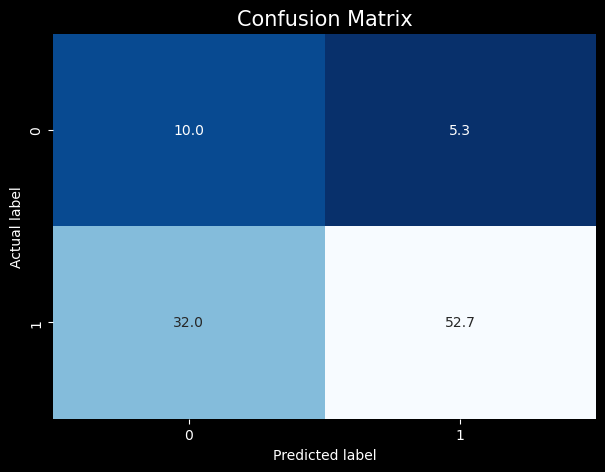

In [683]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create an instance of LogisticRegression
logreg7 = LogisticRegression(penalty='none', max_iter=1000)

# Fit the model using the training data
logreg7.fit(X7_train_validation, y7_train_validation)

# Use the model to make predictions on the test data
y7_pred = logreg7.predict(X7_test)

# Calculate the probabilities of each class
y7_pred_prob = logreg7.predict_proba(X7_test)[:, 1]

# Compute and print the classification report
print(classification_report(y7_test, y7_pred))

# Compute and print the ROC AUC score
print("ROC AUC score: ", roc_auc_score(y7_test, y7_pred_prob))

# Compute and print the confusion matrix
cm7 = confusion_matrix(y7_test, y7_pred)
print("Confusion matrix:\n", cm7)

# Calculate percentages in the confusion matrix
cm7_percent = cm7 / cm7.sum() * 100

# Plot confusion matrix with percentages
plt.figure(figsize=(7, 5))
sns.heatmap(cm7_percent, annot=True, fmt=".1f", cmap='Blues_r', cbar=False)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix', size=15)
plt.show()


Checking for overfitting

In [684]:
from sklearn.metrics import accuracy_score

# Make predictions on the training data
y7_train_pred = logreg7.predict(X7_train_validation)

# Make predictions on the test data
y7_test_pred = logreg7.predict(X7_test)

# Calculate and print the accuracy on the training data
train_accuracy7 = accuracy_score(y7_train_validation, y7_train_pred)
print("Training accuracy: ", train_accuracy7)

# Calculate and print the accuracy on the test data
test_accuracy7 = accuracy_score(y6_test, y7_test_pred)
print("Test accuracy: ", test_accuracy7)


Training accuracy:  0.6376814297973956
Test accuracy:  0.627379293010077


Training accuracy & test accuracy are very close. Therefore, we can conclude that there is no overfitting.

In [685]:
import statsmodels.api as sm

# Adding constant is required for statsmodels logistic regression
X7_train_validation_sm = sm.add_constant(X7_train_validation)

# Fit model
logit_model=sm.Logit(y6_train_validation, X7_train_validation_sm)
result=logit_model.fit()

# Output model summary
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.634260
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                53602
Model:                          Logit   Df Residuals:                    53523
Method:                           MLE   Df Model:                           78
Date:                Mon, 19 Jun 2023   Pseudo R-squ.:                 0.08496
Time:                        18:15:07   Log-Likelihood:                -33998.
converged:                       True   LL-Null:                       -37154.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.2591      0.053     -4.890      0.000   

In [686]:
import numpy as np

# Assuming you have the coefficient for the intercept term
intercept_coef = -0.2551

# Calculate the log-odds of the base model
log_odds_base_model = intercept_coef

# Calculate the odds of the base model
odds_base_model = np.exp(log_odds_base_model)

# Display the log-odds and odds of the base model
print("Log-Odds of the Base Model:", log_odds_base_model)
print("Odds of the Base Model:", odds_base_model)


Log-Odds of the Base Model: -0.2551
Odds of the Base Model: 0.7748390101857382


In [687]:
# Extract the coefficients from the fitted model
coefficients = result.params

# Create a DataFrame for easy viewing and sorting
coefficients_df = pd.DataFrame(coefficients, columns=['Coefficient'])

# Sort the coefficients in descending order of absolute value
sorted_coefficients = coefficients_df.reindex(coefficients_df.Coefficient.abs().sort_values(ascending=False).index)

print(sorted_coefficients)


                             Coefficient
fed_funds                       1.361801
sub_grade_G3                   -1.309992
sub_grade_F4                   -1.290343
sub_grade_F5                   -1.287506
sub_grade_G1                   -1.286109
sub_grade_F3                   -1.280858
sub_grade_E4                   -1.215333
sub_grade_F2                   -1.202472
sub_grade_D4                   -1.126218
sub_grade_E2                   -1.107370
sub_grade_C3                   -1.095201
sub_grade_D3                   -1.069172
sub_grade_D1                   -1.063327
sub_grade_E1                   -1.059657
sub_grade_D2                   -1.053340
sub_grade_E5                   -1.025314
sub_grade_C4                   -1.020624
sub_grade_C5                   -1.019063
sub_grade_B5                   -0.964216
sub_grade_C1                   -0.963973
sub_grade_G5                   -0.950735
sub_grade_G2                   -0.949888
sub_grade_E3                   -0.941881
sub_grade_D5    

In [688]:
raise SystemExit("Stop right there!")

SystemExit: Stop right there!

To exit: use 'exit', 'quit', or Ctrl-D.


# Hybrid Model Neural Network/Logistic Regression

## LR/NN Model 6

In [689]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import pandas as pd
from plotnine import ggplot, aes, geom_point, scale_x_continuous, ylab
from tensorflow.keras.callbacks import EarlyStopping

Epoch 1/50
858/858 [==============================] - 10s 10ms/step - loss: 0.6933 - val_loss: 0.6676
Epoch 2/50
858/858 [==============================] - 3s 3ms/step - loss: 0.6539 - val_loss: 0.6555
Epoch 3/50
858/858 [==============================] - 4s 4ms/step - loss: 0.6459 - val_loss: 0.6508
Epoch 4/50
858/858 [==============================] - 3s 4ms/step - loss: 0.6428 - val_loss: 0.6498
Epoch 5/50
858/858 [==============================] - 3s 3ms/step - loss: 0.6412 - val_loss: 0.6490
Epoch 6/50
858/858 [==============================] - 3s 3ms/step - loss: 0.6402 - val_loss: 0.6479
Epoch 7/50
858/858 [==============================] - 3s 3ms/step - loss: 0.6392 - val_loss: 0.6485
Epoch 8/50
858/858 [==============================] - 3s 3ms/step - loss: 0.6389 - val_loss: 0.6488
Epoch 9/50
858/858 [==============================] - 3s 4ms/step - loss: 0.6384 - val_loss: 0.6458
Epoch 10/50
858/858 [==============================] - 3s 3ms/step - loss: 0.6381 - val_loss: 0.64

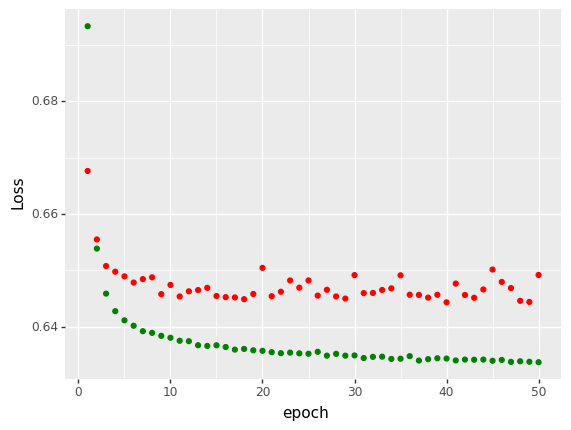

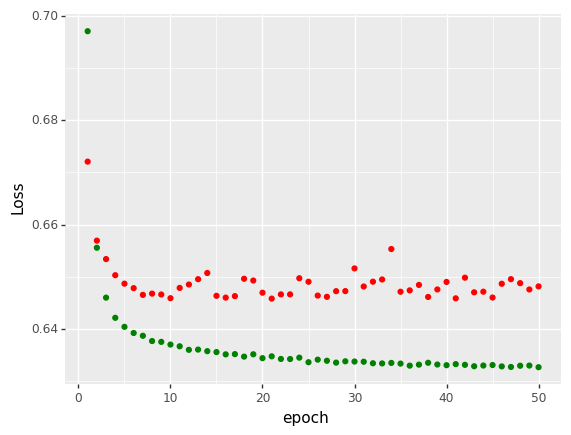


336/336 [==============================] - 1s 1ms/step
Validation Set Classification report: 
               precision    recall  f1-score   support

           0       0.61      0.69      0.65      5298
           1       0.65      0.57      0.61      5423

    accuracy                           0.63     10721
   macro avg       0.63      0.63      0.63     10721
weighted avg       0.63      0.63      0.63     10721

Validation Set ROC AUC score:  0.6795475376573377
Validation Set Confusion Matrix: 
 [[3641 1657]
 [2338 3085]]


In [690]:
def build_nn(input_dim, neurons=40):
    model = tf.keras.Sequential()
    model.add(Dense(neurons, input_dim=input_dim, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(Dense(40, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(Dense(15, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

def plot_loss(history):
    loss_df = pd.DataFrame({
        'train_loss': history.history['loss'],
        'val_loss': history.history['val_loss']
    })
    loss_df = loss_df.assign(epoch = np.arange(1, len(loss_df['train_loss']) + 1))

    p = (
        ggplot(loss_df) +
        geom_point(aes(x='epoch', y='train_loss'), color='green') +
        geom_point(aes(x='epoch', y='val_loss'), color='red') +
        scale_x_continuous(breaks = np.arange(0, 150, 10)) +
        ylab("Loss")
    )
    return p

# Base model 1: logistic regression
lr6 = LogisticRegression(max_iter=1000)
lr6.fit(X6_train, y6_train)

# Base model 2: neural network
nn6 = build_nn(X6_train.shape[1])
history_nn6 = nn6.fit(X6_train, y6_train, epochs=50, batch_size=50, validation_data=(X6_val, y6_val)) # added validation_data

# Get predictions from base models
train_preds_lr6 = lr6.predict(X6_train)
train_preds_nn6 = nn6.predict(X6_train).ravel()

# Stack base model predictions and original features
X6_train_preds = np.column_stack((train_preds_lr6, train_preds_nn6, X6_train))

# Validation
val_preds_lr6 = lr6.predict(X6_val)
val_preds_nn6 = nn6.predict(X6_val).ravel()

# Stack validation set base model predictions and original features
X_val_preds6 = np.column_stack((val_preds_lr6, val_preds_nn6, X6_val))

# Final model: neural network
final_model6 = build_nn(X6_train_preds.shape[1])
history_final6 = final_model6.fit(X6_train_preds, y6_train, epochs=50, batch_size=50, validation_data=(X_val_preds6, y6_val))

# Plot loss
p_nn = plot_loss(history_nn6)
print(p_nn)
p_final = plot_loss(history_final6)
print(p_final)

# Making predictions on validation set with final model
y6_pred_val = final_model6.predict(X_val_preds6)

# Print out the results for the validation set
print("Validation Set Classification report: \n", classification_report(y6_val, (y6_pred_val>0.5).astype(int)))
print("Validation Set ROC AUC score: ", roc_auc_score(y6_val, y6_pred_val))
print("Validation Set Confusion Matrix: \n", confusion_matrix(y6_val, (y6_pred_val>0.5).astype(int)))


In [691]:
# Once you're satisfied with the model's performance on the validation set, evaluate it on the test set
test_preds_lr6 = lr6.predict(X6_test)
test_preds_nn6 = nn6.predict(X6_test).ravel()

# Stack test set base model predictions and original features
X_test_preds6 = np.column_stack((test_preds_lr6, test_preds_nn6, X6_test))

# Making predictions on test set with final model
y6_pred_test = final_model6.predict(X_test_preds6)

# Print out the results for the test set
print("Test Set Classification report: \n", classification_report(y6_test, (y6_pred_test>0.5).astype(int)))
print("Test Set ROC AUC score: ", roc_auc_score(y6_test, y6_pred_test))
print("Test Set Confusion Matrix: \n", confusion_matrix(y6_test, (y6_pred_test>0.5).astype(int)))


1368/1368 [==============================] - 2s 1ms/step
Test Set Classification report: 
               precision    recall  f1-score   support

           0       0.23      0.70      0.35      6708
           1       0.91      0.58      0.71     37055

    accuracy                           0.60     43763
   macro avg       0.57      0.64      0.53     43763
weighted avg       0.81      0.60      0.65     43763

Test Set ROC AUC score:  0.69029291097932
Test Set Confusion Matrix: 
 [[ 4668  2040]
 [15575 21480]]


Second try: we separate the base models from the validation and test for easier tuning.

1341/1341 [==============================] - 2s 1ms/step


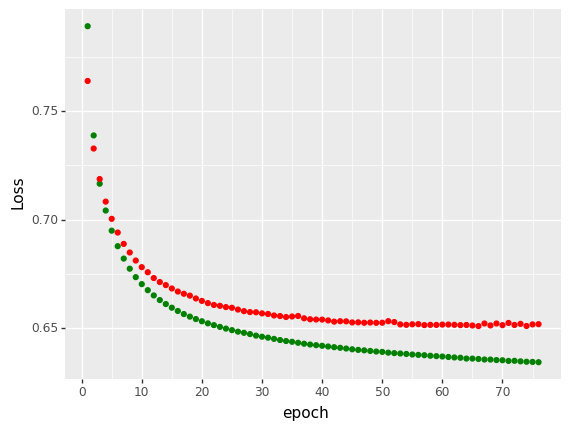

In [692]:
def build_nn(input_dim, neurons=40):
    model = tf.keras.Sequential()
    model.add(Dense(neurons, input_dim=input_dim, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(Dense(40, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(Dense(15, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(Dense(1, activation='sigmoid'))

    # Define custom learning rate
    custom_adam = Adam(learning_rate=0.0001)

    model.compile(loss='binary_crossentropy', optimizer=custom_adam)
    return model

# Define EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)

# Base model 1: logistic regression
lr6 = LogisticRegression(penalty='none', max_iter=1000)
lr6.fit(X6_train, y6_train)

# Base model 2: neural network
nn6 = build_nn(X6_train.shape[1])
history_nn6 = nn6.fit(
    X6_train, 
    y6_train, 
    epochs=100, 
    batch_size=100, 
    validation_data=(X6_val, y6_val), 
    verbose=0, 
    callbacks=[early_stop])

# Get predictions from base models
train_preds_lr6 = lr6.predict(X6_train)
train_preds_nn6 = nn6.predict(X6_train).ravel()

# Stack base model predictions and original features
X6_train_preds = np.column_stack((train_preds_lr6, train_preds_nn6, X6_train))

def plot_loss(history):
    loss_df = pd.DataFrame({
        'train_loss': history.history['loss'],
        'val_loss': history.history['val_loss']
    })
    loss_df = loss_df.assign(epoch = np.arange(1, len(loss_df['train_loss']) + 1))

    p = (
        ggplot(loss_df) +
        geom_point(aes(x='epoch', y='train_loss'), color='green') +
        geom_point(aes(x='epoch', y='val_loss'), color='red') +
        scale_x_continuous(breaks = np.arange(0, 150, 10)) +
        ylab("Loss")
    )
    return p

# Plot loss
p_nn = plot_loss(history_nn6)
print(p_nn)


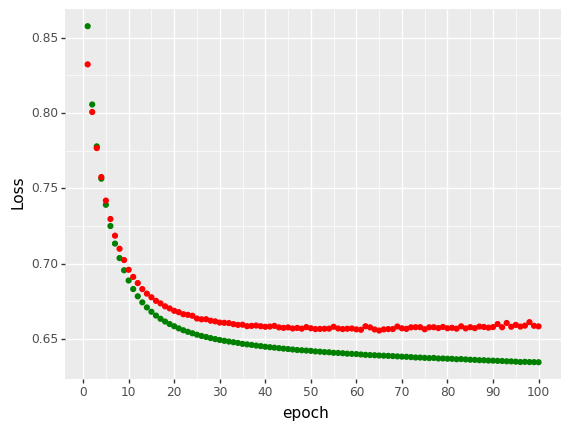


336/336 [==============================] - 1s 2ms/step
Validation Set Classification report: 
               precision    recall  f1-score   support

           0       0.62      0.63      0.62      5298
           1       0.63      0.62      0.62      5423

    accuracy                           0.62     10721
   macro avg       0.62      0.62      0.62     10721
weighted avg       0.62      0.62      0.62     10721

Validation Set ROC AUC score:  0.6790540646368213
Validation Set Confusion Matrix: 
 [[3334 1964]
 [2081 3342]]


In [693]:
def build_nn(input_dim):
    model = tf.keras.Sequential()
    model.add(Dense(60, input_dim=input_dim, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(Dense(40, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(Dense(15, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(Dense(5, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(Dense(1, activation='sigmoid'))

    # Define custom learning rate
    custom_adam = Adam(learning_rate=0.0001)

    model.compile(loss='binary_crossentropy', optimizer=custom_adam)
    return model

# Final model: neural network
final_model6 = build_nn(X6_train_preds.shape[1])
history_final6 = final_model6.fit(X6_train_preds, y6_train, epochs=100, batch_size=100, validation_data=(X_val_preds6, y6_val), verbose=0)

p_final = plot_loss(history_final6)
print(p_final)

# Validation
val_preds_lr6 = lr6.predict(X6_val)
val_preds_nn6 = nn6.predict(X6_val).ravel()

# Stack validation set base model predictions and original features
X_val_preds6 = np.column_stack((val_preds_lr6, val_preds_nn6, X6_val))

# Making predictions on validation set with final model
y6_pred_val = final_model6.predict(X_val_preds6)

# Print out the results for the validation set
print("Validation Set Classification report: \n", classification_report(y6_val, (y6_pred_val>0.5).astype(int)))
print("Validation Set ROC AUC score: ", roc_auc_score(y6_val, y6_pred_val))
print("Validation Set Confusion Matrix: \n", confusion_matrix(y6_val, (y6_pred_val>0.5).astype(int)))


1368/1368 [==============================] - 2s 1ms/step
Test Set Classification report: 
               precision    recall  f1-score   support

           0       0.24      0.64      0.35      6708
           1       0.91      0.64      0.75     37055

    accuracy                           0.64     43763
   macro avg       0.57      0.64      0.55     43763
weighted avg       0.80      0.64      0.69     43763

Test Set ROC AUC score:  0.6884406083174883
Test Set Confusion Matrix: 
 [[ 4261  2447]
 [13517 23538]]


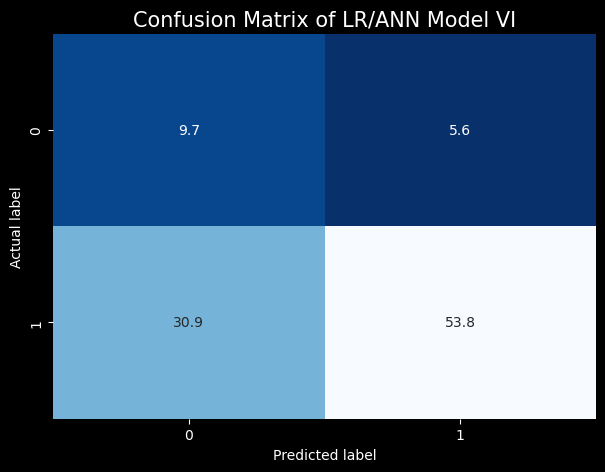

In [694]:
# Test
test_preds_lr6 = lr6.predict(X6_test)
test_preds_nn6 = nn6.predict(X6_test).ravel()

# Stack test set base model predictions and original features
X_test_preds6 = np.column_stack((test_preds_lr6, test_preds_nn6, X6_test))

# Making predictions on test set with final model
y6_pred_test = final_model6.predict(X_test_preds6)

# Print out the results for the test set
print("Test Set Classification report: \n", classification_report(y6_test, (y6_pred_test>0.5).astype(int)))
print("Test Set ROC AUC score: ", roc_auc_score(y6_test, y6_pred_test))
print("Test Set Confusion Matrix: \n", confusion_matrix(y6_test, (y6_pred_test>0.5).astype(int)))

# Confusion Matrix
cm = confusion_matrix(y6_test, (y6_pred_test>0.5).astype(int))

# Calculate percentages in the confusion matrix
cm_percent = cm / cm.sum() * 100

# Plot confusion matrix with percentages
plt.figure(figsize=(7, 5))
sns.heatmap(cm_percent, annot=True, fmt=".1f", cmap='Blues_r', cbar=False)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix of LR/ANN Model VI', size=15)
plt.show()


Third try: we apply random search

In [695]:
from kerastuner import RandomSearch
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('neurons_1', min_value=40, max_value=80, step=10),
                    activation='relu', 
                    kernel_regularizer=tf.keras.regularizers.l2(0.001),
                    input_dim=X6_train_preds.shape[1]))
    model.add(Dense(units=hp.Int('neurons_2', min_value=30, max_value=60, step=10), 
                    activation='relu', 
                    kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(Dense(15, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(Dense(5, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy')
    return model

tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,  # number of trials
    executions_per_trial=3,  # number of models (with different weights) to run for each trial
    directory='random_search',
    project_name='neurons_tuning2'
)

tuner.search_space_summary()

tuner.search(X6_train_preds, y6_train, epochs=5, validation_split=0.2)

print(tuner.get_best_hyperparameters()[0].values)


INFO:tensorflow:Reloading Tuner from random_search\neurons_tuning2\tuner0.json


Search space summary
Default search space size: 2
neurons_1 (Int)
{'default': None, 'conditions': [], 'min_value': 40, 'max_value': 80, 'step': 10, 'sampling': 'linear'}
neurons_2 (Int)
{'default': None, 'conditions': [], 'min_value': 30, 'max_value': 60, 'step': 10, 'sampling': 'linear'}
INFO:tensorflow:Oracle triggered exit
{'neurons_1': 50, 'neurons_2': 60}


In [696]:
def build_nn():
    model = tf.keras.Sequential()
    model.add(Dense(50, input_dim=X6_train_preds.shape[1], activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(Dense(60, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(Dense(15, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(Dense(5, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(Dense(1, activation='sigmoid'))

    # Define custom learning rate
    custom_adam = Adam(learning_rate=0.0001)

    model.compile(loss='binary_crossentropy', optimizer=custom_adam)
    return model

final_model = build_nn()
history_final = final_model.fit(X6_train_preds, y6_train, epochs=100, batch_size=100, validation_data=(X_val_preds6, y6_val), verbose=0)

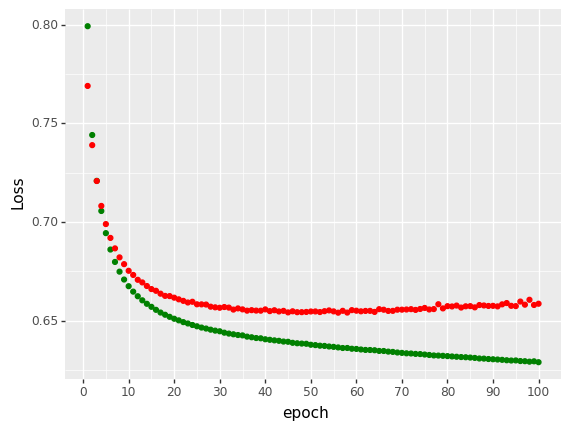

In [697]:
# Plot loss
p_final = plot_loss(history_final)
print(p_final)


In [698]:
# Making predictions on validation set with final model
y6_pred_val = final_model.predict(X_val_preds6)

# Print out the results for the validation set
print("Validation Set Classification report: \n", classification_report(y6_val, (y6_pred_val>0.5).astype(int)))
print("Validation Set ROC AUC score: ", roc_auc_score(y6_val, y6_pred_val))
print("Validation Set Confusion Matrix: \n", confusion_matrix(y6_val, (y6_pred_val>0.5).astype(int)))


336/336 [==============================] - 1s 1ms/step
Validation Set Classification report: 
               precision    recall  f1-score   support

           0       0.61      0.64      0.63      5298
           1       0.63      0.61      0.62      5423

    accuracy                           0.62     10721
   macro avg       0.62      0.62      0.62     10721
weighted avg       0.62      0.62      0.62     10721

Validation Set ROC AUC score:  0.6785107674782832
Validation Set Confusion Matrix: 
 [[3392 1906]
 [2127 3296]]


1368/1368 [==============================] - 3s 2ms/step
Test Set Classification report: 
               precision    recall  f1-score   support

           0       0.24      0.65      0.35      6708
           1       0.91      0.62      0.74     37055

    accuracy                           0.62     43763
   macro avg       0.57      0.63      0.54     43763
weighted avg       0.80      0.62      0.68     43763

Test Set ROC AUC score:  0.6859498346790179
Test Set Confusion Matrix: 
 [[ 4346  2362]
 [14108 22947]]


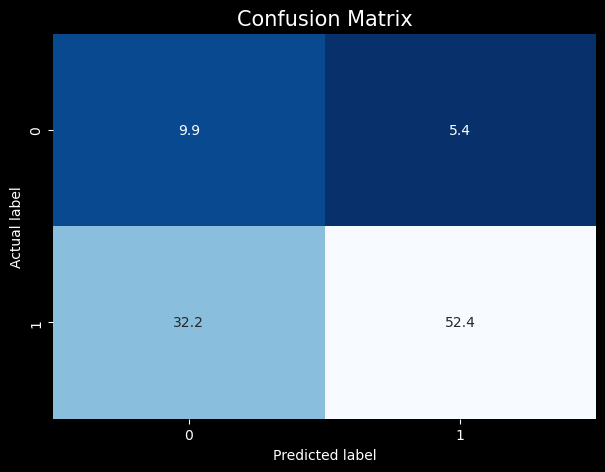

In [701]:
# Once you're satisfied with the model's performance on the validation set, evaluate it on the test set
test_preds_lr6 = lr6.predict(X6_test)
test_preds_nn6 = nn6.predict(X6_test).ravel()

# Stack test set base model predictions and original features
X_test_preds6 = np.column_stack((test_preds_lr6, test_preds_nn6, X6_test))

# Making predictions on test set with final model
y6_pred_test = final_model.predict(X_test_preds6)

# Print out the results for the test set
print("Test Set Classification report: \n", classification_report(y6_test, (y6_pred_test>0.5).astype(int)))
print("Test Set ROC AUC score: ", roc_auc_score(y6_test, y6_pred_test))

cmlrann6 = confusion_matrix(y6_test, (y6_pred_test>0.5).astype(int))
print("Test Set Confusion Matrix: \n", cmlrann6)

# Calculate percentages in the confusion matrix
cmlrann6_percent = cmlrann6 / cmlrann6.sum() * 100

# Plot confusion matrix with percentages
plt.figure(figsize=(7, 5))
sns.heatmap(cmlrann6_percent, annot=True, fmt=".1f", cmap='Blues_r', cbar=False)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix', size=15)
plt.show()


In [700]:
raise SystemExit("End of Part one")

SystemExit: End of Part one

To exit: use 'exit', 'quit', or Ctrl-D.


## LR/NN Model 7

Epoch 1/50
858/858 [==============================] - 12s 12ms/step - loss: 0.6939 - val_loss: 0.6690
Epoch 2/50
858/858 [==============================] - 3s 4ms/step - loss: 0.6549 - val_loss: 0.6567
Epoch 3/50
858/858 [==============================] - 3s 4ms/step - loss: 0.6469 - val_loss: 0.6514
Epoch 4/50
858/858 [==============================] - 3s 4ms/step - loss: 0.6433 - val_loss: 0.6502
Epoch 5/50
858/858 [==============================] - 4s 5ms/step - loss: 0.6414 - val_loss: 0.6499
Epoch 6/50
858/858 [==============================] - 4s 4ms/step - loss: 0.6404 - val_loss: 0.6473
Epoch 7/50
858/858 [==============================] - 3s 4ms/step - loss: 0.6395 - val_loss: 0.6469
Epoch 8/50
858/858 [==============================] - 3s 4ms/step - loss: 0.6385 - val_loss: 0.6468
Epoch 9/50
858/858 [==============================] - 3s 4ms/step - loss: 0.6377 - val_loss: 0.6509
Epoch 10/50
858/858 [==============================] - 4s 4ms/step - loss: 0.6377 - val_loss: 0.64

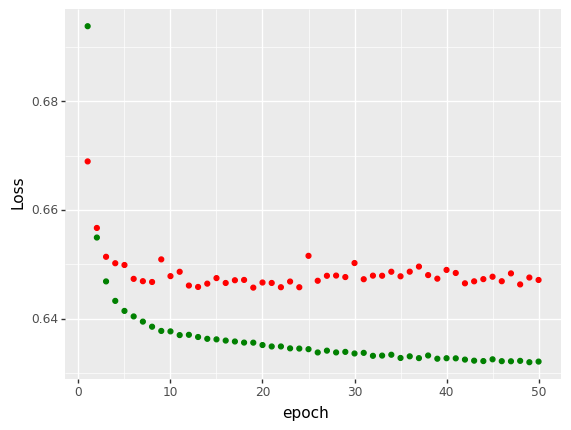

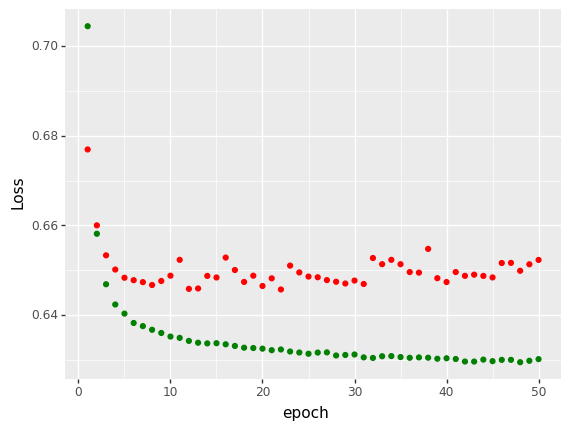


336/336 [==============================] - 1s 2ms/step
Validation Set Classification report: 
               precision    recall  f1-score   support

           0       0.62      0.65      0.63      5298
           1       0.64      0.60      0.62      5423

    accuracy                           0.63     10721
   macro avg       0.63      0.63      0.63     10721
weighted avg       0.63      0.63      0.63     10721

Validation Set ROC AUC score:  0.6762940371070272
Validation Set Confusion Matrix: 
 [[3448 1850]
 [2157 3266]]


In [ ]:
def build_nn(input_dim, neurons=40):
    model = tf.keras.Sequential()
    model.add(Dense(neurons, input_dim=input_dim, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(Dense(40, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(Dense(15, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

def plot_loss(history):
    loss_df = pd.DataFrame({
        'train_loss': history.history['loss'],
        'val_loss': history.history['val_loss']
    })
    loss_df = loss_df.assign(epoch = np.arange(1, len(loss_df['train_loss']) + 1))

    p = (
        ggplot(loss_df) +
        geom_point(aes(x='epoch', y='train_loss'), color='green') +
        geom_point(aes(x='epoch', y='val_loss'), color='red') +
        scale_x_continuous(breaks = np.arange(0, 150, 10)) +
        ylab("Loss")
    )
    return p

# Base model 1: logistic regression
lr7 = LogisticRegression(max_iter=1000)
lr7.fit(X7_train, y7_train)

# Base model 2: neural network
nn7 = build_nn(X7_train.shape[1])
history_nn7 = nn7.fit(X7_train, y7_train, epochs=50, batch_size=50, validation_data=(X7_val, y7_val)) # added validation_data

# Get predictions from base models
train_preds_lr7 = lr7.predict(X7_train)
train_preds_nn7 = nn7.predict(X7_train).ravel()

# Stack base model predictions and original features
X7_train_preds = np.column_stack((train_preds_lr7, train_preds_nn7, X7_train))

# Validation
val_preds_lr7 = lr7.predict(X7_val)
val_preds_nn7 = nn7.predict(X7_val).ravel()

# Stack validation set base model predictions and original features
X_val_preds7 = np.column_stack((val_preds_lr7, val_preds_nn7, X7_val))

# Final model: neural network
final_model7 = build_nn(X7_train_preds.shape[1])
history_final7 = final_model7.fit(X7_train_preds, y7_train, epochs=50, batch_size=50, validation_data=(X_val_preds7, y7_val))

# Plot loss
p_nn = plot_loss(history_nn7)
print(p_nn)
p_final = plot_loss(history_final7)
print(p_final)

# Making predictions on validation set with final model
y7_pred_val = final_model7.predict(X_val_preds7)

# Print out the results for the validation set
print("Validation Set Classification report: \n", classification_report(y7_val, (y7_pred_val>0.5).astype(int)))
print("Validation Set ROC AUC score: ", roc_auc_score(y7_val, y7_pred_val))
print("Validation Set Confusion Matrix: \n", confusion_matrix(y7_val, (y7_pred_val>0.5).astype(int)))


In [ ]:
# Once you're satisfied with the model's performance on the validation set, evaluate it on the test set
test_preds_lr7 = lr7.predict(X7_test)
test_preds_nn7 = nn7.predict(X7_test).ravel()

# Stack test set base model predictions and original features
X_test_preds7 = np.column_stack((test_preds_lr7, test_preds_nn7, X7_test))

# Making predictions on test set with final model
y7_pred_test = final_model7.predict(X_test_preds7)

# Print out the results for the test set
print("Test Set Classification report: \n", classification_report(y7_test, (y7_pred_test>0.5).astype(int)))
print("Test Set ROC AUC score: ", roc_auc_score(y7_test, y7_pred_test))
print("Test Set Confusion Matrix: \n", confusion_matrix(y7_test, (y7_pred_test>0.5).astype(int)))


1368/1368 [==============================] - 2s 2ms/step
Test Set Classification report: 
               precision    recall  f1-score   support

           0       0.24      0.66      0.35      6708
           1       0.91      0.61      0.73     37055

    accuracy                           0.62     43763
   macro avg       0.57      0.64      0.54     43763
weighted avg       0.81      0.62      0.67     43763

Test Set ROC AUC score:  0.6893598268524918
Test Set Confusion Matrix: 
 [[ 4431  2277]
 [14284 22771]]


Second try

1341/1341 [==============================] - 3s 2ms/step


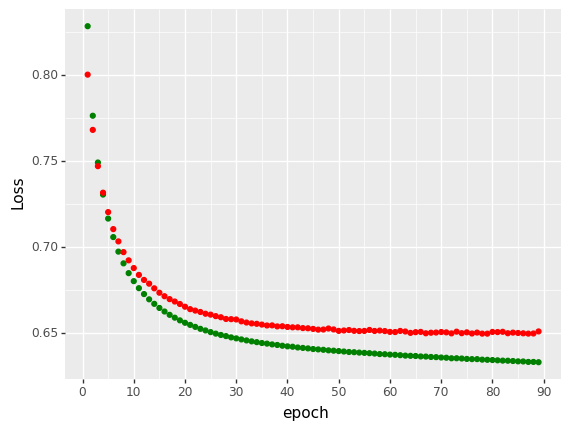

In [ ]:
def build_nn(input_dim, neurons=40):
    model = tf.keras.Sequential()
    model.add(Dense(neurons, input_dim=input_dim, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0015)))
    model.add(Dense(40, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0015)))
    model.add(Dense(15, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0015)))
    model.add(Dense(1, activation='sigmoid'))

    # Define custom learning rate
    custom_adam = Adam(learning_rate=0.0001)

    model.compile(loss='binary_crossentropy', optimizer=custom_adam)
    return model

# Define EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)

# Base model 1: logistic regression
lr7 = LogisticRegression(penalty='none', max_iter=1000)
lr7.fit(X7_train, y7_train)

# Base model 2: neural network
nn7 = build_nn(X7_train.shape[1])
history_nn7 = nn7.fit(
    X7_train, 
    y7_train, 
    epochs=100, 
    batch_size=100, 
    validation_data=(X7_val, y7_val), 
    verbose=0, 
    callbacks=[early_stop])

# Get predictions from base models
train_preds_lr7 = lr7.predict(X7_train)
train_preds_nn7 = nn7.predict(X7_train).ravel()

# Stack base model predictions and original features
X7_train_preds = np.column_stack((train_preds_lr7, train_preds_nn7, X7_train))

def plot_loss(history):
    loss_df = pd.DataFrame({
        'train_loss': history.history['loss'],
        'val_loss': history.history['val_loss']
    })
    loss_df = loss_df.assign(epoch = np.arange(1, len(loss_df['train_loss']) + 1))

    p = (
        ggplot(loss_df) +
        geom_point(aes(x='epoch', y='train_loss'), color='green') +
        geom_point(aes(x='epoch', y='val_loss'), color='red') +
        scale_x_continuous(breaks = np.arange(0, 150, 10)) +
        ylab("Loss")
    )
    return p

# Plot loss
p_nn = plot_loss(history_nn7)
print(p_nn)


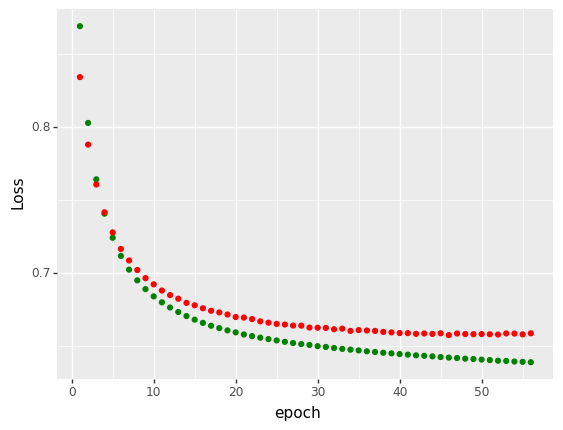


336/336 [==============================] - 1s 1ms/step
Validation Set Classification report: 
               precision    recall  f1-score   support

           0       0.63      0.61      0.62      5298
           1       0.63      0.65      0.64      5423

    accuracy                           0.63     10721
   macro avg       0.63      0.63      0.63     10721
weighted avg       0.63      0.63      0.63     10721

Validation Set ROC AUC score:  0.6828839624191998
Validation Set Confusion Matrix: 
 [[3219 2079]
 [1914 3509]]


In [ ]:
def build_nn(input_dim):
    model = tf.keras.Sequential()
    model.add(Dense(60, input_dim=input_dim, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0015)))
    model.add(Dense(40, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0015)))
    model.add(Dense(15, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0015)))
    model.add(Dense(5, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0015)))
    model.add(Dense(1, activation='sigmoid'))

    # Define custom learning rate
    custom_adam = Adam(learning_rate=0.0001)

    model.compile(loss='binary_crossentropy', optimizer=custom_adam)
    return model

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Final model: neural network
final_model7 = build_nn(X7_train_preds.shape[1])
history_final7 = final_model7.fit(X7_train_preds, y7_train, epochs=100, batch_size=100, 
                                  validation_data=(X_val_preds7, y7_val), verbose=0, 
                                  callbacks=[early_stopping])

p_final = plot_loss(history_final7)
print(p_final)

# Validation
val_preds_lr7 = lr7.predict(X7_val)
val_preds_nn7 = nn7.predict(X7_val).ravel()

# Stack validation set base model predictions and original features
X_val_preds7 = np.column_stack((val_preds_lr7, val_preds_nn7, X7_val))

# Making predictions on validation set with final model
y7_pred_val = final_model7.predict(X_val_preds7)

# Print out the results for the validation set
print("Validation Set Classification report: \n", classification_report(y7_val, (y7_pred_val>0.5).astype(int)))
print("Validation Set ROC AUC score: ", roc_auc_score(y7_val, y7_pred_val))
print("Validation Set Confusion Matrix: \n", confusion_matrix(y7_val, (y7_pred_val>0.5).astype(int)))


1368/1368 [==============================] - 3s 2ms/step
Test Set Classification report: 
               precision    recall  f1-score   support

           0       0.25      0.62      0.35      6708
           1       0.91      0.66      0.76     37055

    accuracy                           0.65     43763
   macro avg       0.58      0.64      0.56     43763
weighted avg       0.80      0.65      0.70     43763

Test Set ROC AUC score:  0.6909422604008433
Test Set Confusion Matrix: 
 [[ 4168  2540]
 [12779 24276]]


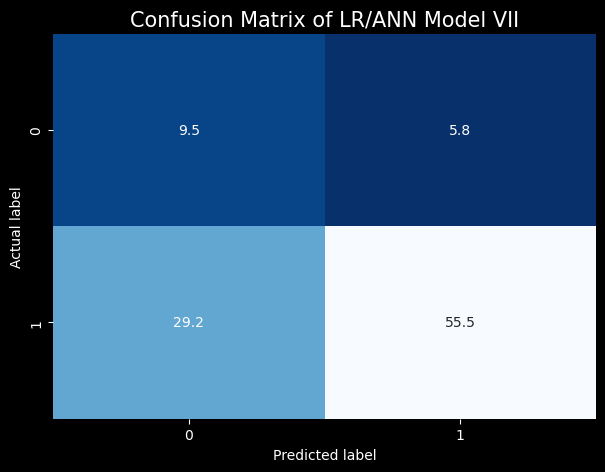

In [ ]:
# Test
test_preds_lr7 = lr7.predict(X7_test)
test_preds_nn7 = nn7.predict(X7_test).ravel()

# Stack test set base model predictions and original features
X_test_preds7 = np.column_stack((test_preds_lr7, test_preds_nn7, X7_test))

# Making predictions on test set with final model
y7_pred_test = final_model7.predict(X_test_preds7)

# Print out the results for the test set
print("Test Set Classification report: \n", classification_report(y7_test, (y7_pred_test>0.5).astype(int)))
print("Test Set ROC AUC score: ", roc_auc_score(y7_test, y7_pred_test))
print("Test Set Confusion Matrix: \n", confusion_matrix(y7_test, (y7_pred_test>0.5).astype(int)))

# Confusion Matrix
cm = confusion_matrix(y7_test, (y7_pred_test>0.5).astype(int))

# Calculate percentages in the confusion matrix
cm_percent = cm / cm.sum() * 100

# Plot confusion matrix with percentages
plt.figure(figsize=(7, 5))
sns.heatmap(cm_percent, annot=True, fmt=".1f", cmap='Blues_r', cbar=False)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix of LR/ANN Model VII', size=15)
plt.show()


Third try

In [ ]:
from kerastuner import RandomSearch
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('neurons_1', min_value=40, max_value=80, step=10),
                    activation='relu', 
                    kernel_regularizer=tf.keras.regularizers.l2(0.001),
                    input_dim=X7_train_preds.shape[1]))
    model.add(Dense(units=hp.Int('neurons_2', min_value=30, max_value=60, step=10), 
                    activation='relu', 
                    kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(Dense(15, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(Dense(5, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy')
    return model

tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,  # number of trials
    executions_per_trial=3,  # number of models (with different weights) to run for each trial
    directory='random_search',
    project_name='neurons_tuning_model7_1'
)

tuner.search_space_summary()

tuner.search(X7_train_preds, y7_train, epochs=5, validation_split=0.2)

print(tuner.get_best_hyperparameters()[0].values)


INFO:tensorflow:Reloading Tuner from random_search\neurons_tuning_model7_1\tuner0.json
Search space summary
Default search space size: 2
neurons_1 (Int)
{'default': None, 'conditions': [], 'min_value': 40, 'max_value': 80, 'step': 10, 'sampling': 'linear'}
neurons_2 (Int)
{'default': None, 'conditions': [], 'min_value': 30, 'max_value': 60, 'step': 10, 'sampling': 'linear'}
INFO:tensorflow:Oracle triggered exit
{'neurons_1': 70, 'neurons_2': 50}


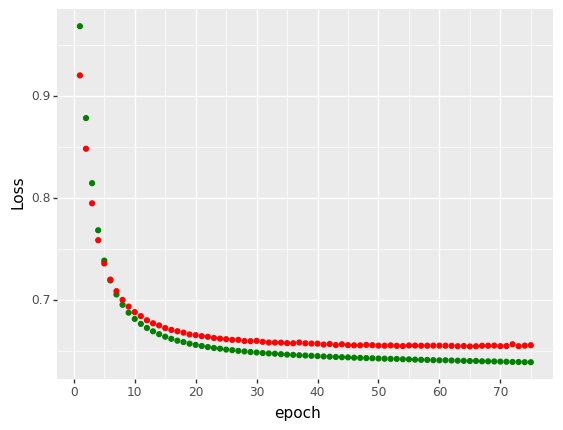

In [ ]:
from keras.callbacks import EarlyStopping

def build_nn():
    model = tf.keras.Sequential()
    model.add(Dense(70, input_dim=X7_train_preds.shape[1], activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.002)))
    model.add(Dense(50, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.002)))
    model.add(Dense(15, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.002)))
    model.add(Dense(5, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.002)))
    model.add(Dense(1, activation='sigmoid'))

    # Define custom learning rate
    custom_adam = Adam(learning_rate=0.0001)

    model.compile(loss='binary_crossentropy', optimizer=custom_adam)
    return model

final_model = build_nn()

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_final = final_model.fit(X7_train_preds, y7_train, epochs=100, batch_size=100, validation_data=(X_val_preds7, y7_val), verbose=0, callbacks=[early_stopping])

# Plot loss
p_final = plot_loss(history_final)
print(p_final)

In [ ]:
# Making predictions on validation set with final model
y7_pred_val = final_model.predict(X_val_preds7)

# Print out the results for the validation set
print("Validation Set Classification report: \n", classification_report(y7_val, (y7_pred_val>0.5).astype(int)))
print("Validation Set ROC AUC score: ", roc_auc_score(y7_val, y7_pred_val))
print("Validation Set Confusion Matrix: \n", confusion_matrix(y7_val, (y7_pred_val>0.5).astype(int)))


336/336 [==============================] - 1s 2ms/step
Validation Set Classification report: 
               precision    recall  f1-score   support

           0       0.62      0.65      0.63      5298
           1       0.64      0.61      0.62      5423

    accuracy                           0.63     10721
   macro avg       0.63      0.63      0.63     10721
weighted avg       0.63      0.63      0.63     10721

Validation Set ROC AUC score:  0.6836572894262773
Validation Set Confusion Matrix: 
 [[3433 1865]
 [2121 3302]]


1368/1368 [==============================] - 3s 2ms/step
Test Set Classification report: 
               precision    recall  f1-score   support

           0       0.24      0.66      0.35      6708
           1       0.91      0.62      0.74     37055

    accuracy                           0.63     43763
   macro avg       0.57      0.64      0.54     43763
weighted avg       0.81      0.63      0.68     43763

Test Set ROC AUC score:  0.6931475251497656
Test Set Confusion Matrix: 
[[ 4403  2305]
 [14052 23003]]


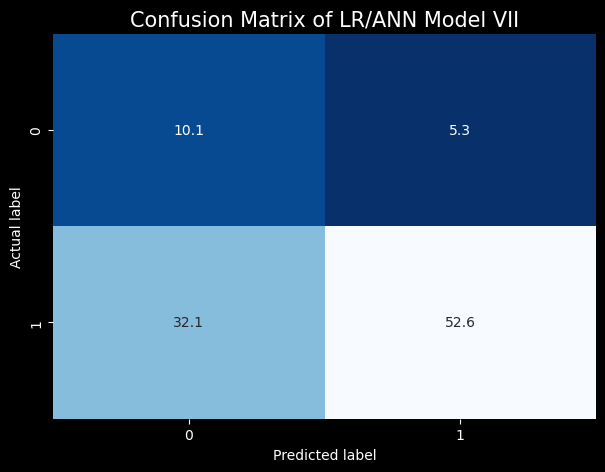

In [ ]:
# Once you're satisfied with the model's performance on the validation set, evaluate it on the test set
test_preds_lr7 = lr7.predict(X7_test)
test_preds_nn7 = nn7.predict(X7_test).ravel()

# Stack test set base model predictions and original features
X_test_preds7 = np.column_stack((test_preds_lr7, test_preds_nn7, X7_test))

# Making predictions on test set with final model
y7_pred_test = final_model.predict(X_test_preds7)

# Print out the results for the test set
print("Test Set Classification report: \n", classification_report(y7_test, (y7_pred_test>0.5).astype(int)))
print("Test Set ROC AUC score: ", roc_auc_score(y7_test, y7_pred_test))

cm = confusion_matrix(y7_test, (y7_pred_test>0.5).astype(int))

print(f"Test Set Confusion Matrix: \n{cm}" )

# Calculate percentages in the confusion matrix
cm_percent = cm / cm.sum() * 100

# Plot confusion matrix with percentages
plt.figure(figsize=(7, 5))
sns.heatmap(cm_percent, annot=True, fmt=".1f", cmap='Blues_r', cbar=False)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix of LR/ANN Model VII', size=15)
plt.show()

In [ ]:
raise SystemExit("End of Part one")

SystemExit: End of Part one

To exit: use 'exit', 'quit', or Ctrl-D.


# Part Two: Class Weight

This part follows the same procedure as part one, but instead of applying random undersampling to the majority class, we will apply class weights to the minority class.

We start by splitting the data 80/20 again.

In [ ]:
# Prepare the target 0 = default, 1 = paid off
y = df_merged['loan_status']
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
# Split the data for Model 6
X6_train_cw, X6_test_cw, y6_train_cw, y6_test_cw = train_test_split(X6, y, test_size=0.2, random_state=42)

# Split the data for Model 7
X7_train_cw, X7_test_cw, y7_train_cw, y7_test_cw = train_test_split(X7, y, test_size=0.2, random_state=42)

Apply Scaling Technique, using the same functions as in Part One

In [ ]:
# Fit and transform the numerical features of the undersampled training data
X6_train_scaled_cw = preprocessor6.fit_transform(X6_train_cw)
X6_test_cw = preprocessor6.transform(X6_test_cw)

X7_train_scaled_cw = preprocessor7.fit_transform(X7_train_cw)
X7_test_cw = preprocessor7.transform(X7_test_cw)

Training data will be split once again 80/20 between train and validation. Class weights will be applied when modelling.

In [ ]:
X6_train_cw, X6_val_cw, y6_train_cw, y6_val_cw = train_test_split(X6_train_scaled_cw, y6_train_cw, test_size=0.2, random_state=1234)

X7_train_cw, X7_val_cw, y7_train_cw, y7_val_cw = train_test_split(X7_train_scaled_cw, y7_train_cw, test_size=0.2, random_state=1234)

In [ ]:
# Print the shape of each set for Model 6
print("Train set shape:", X6_train_cw.shape, y6_train_cw.shape)
print("Validation set shape:", X6_val_cw.shape, y6_val_cw.shape)
print("Test set shape:", X6_test_cw.shape, y6_test_cw.shape)

Train set shape: (140040, 74) (140040,)
Validation set shape: (35010, 74) (35010,)
Test set shape: (43763, 74) (43763,)


In [ ]:
# Print the shape of each set for Model 7
print("Train set shape:", X7_train_cw.shape, y7_train_cw.shape)
print("Validation set shape:", X7_val_cw.shape, y7_val_cw.shape)
print("Test set shape:", X7_test_cw.shape, y7_test_cw.shape)


Train set shape: (140040, 79) (140040,)
Validation set shape: (35010, 79) (35010,)
Test set shape: (43763, 79) (43763,)


In [ ]:
# Get column names from original DataFrame
original_columns = X6.columns

# Convert numpy arrays back to pandas DataFrame
X6_train_cw = pd.DataFrame(X6_train_cw, columns=original_columns)
X6_val_cw = pd.DataFrame(X6_val_cw, columns=original_columns)
X6_test_cw = pd.DataFrame(X6_test_cw, columns=original_columns)


In [ ]:
# Get column names from original DataFrame
original_columns = X7.columns

# Convert numpy arrays back to pandas DataFrame
X7_train_cw = pd.DataFrame(X7_train_cw, columns=original_columns)
X7_val_cw = pd.DataFrame(X7_val_cw, columns=original_columns)
X7_test_cw = pd.DataFrame(X7_test_cw, columns=original_columns)


In [ ]:
# Check column consistency between training and test sets
train_columns = set(X6_train_cw.columns)
val_columns = set(X6_val_cw.columns)
test_columns = set(X6_test_cw.columns)

# Columns present in training set but not in validation or test set
missing_columns_val = train_columns - val_columns
missing_columns_test = train_columns - test_columns

# Columns present in validation or test set but not in training set
extra_columns_val = val_columns - train_columns
extra_columns_test = test_columns - train_columns

print("Columns present in training set but not in validation set:", missing_columns_val)
print("Columns present in training set but not in test set:", missing_columns_test)
print("Columns present in validation set but not in training set:", extra_columns_val)
print("Columns present in test set but not in training set:", extra_columns_test)

Columns present in training set but not in validation set: set()
Columns present in training set but not in test set: set()
Columns present in validation set but not in training set: set()
Columns present in test set but not in training set: set()


In [ ]:
raise SystemExit("Stop right there!")

SystemExit: Stop right there!

C:\Users\Lawrence\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3386: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.



### Neural Network Model VI Class Weight

In [ ]:
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.utils import class_weight
print('tensorflow: %s' % tensorflow.__version__)
print('keras: %s' % keras.__version__)

tensorflow: 2.10.0
keras: 2.10.0


In [ ]:
print(f"The number of neurons for the input layer must be: {X6_train_cw.shape[1]}")

The number of neurons for the input layer must be: 74


In [ ]:
# define the neural network model class instance
simple_nn_cw6 = Sequential()
# add the first input layer with 29 nodes and the first hidden layer, with  relu activation function
# note that the first command does two things: create a first input layer with 29 nodes, and then a hidden layer
# we set the number of neurons to be equal to the (# of nodes in the input layer + # neurons in the output layer)/2,
# i.e. the mean of the number of neurons in the input layer and the output layer. This is usually a good heuristic to get started.
simple_nn_cw6.add(Dense(38, input_dim=X6_train_cw.shape[1], activation='relu'))
# add the output layer with sigmoid function (the sigmoid function is exactly the same as that used in the formulation of logisitc regression
simple_nn_cw6.add(Dense(1, activation='sigmoid'))

In [ ]:
print(simple_nn_cw6.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 38)                2850      
                                                                 
 dense_1 (Dense)             (None, 1)                 39        
                                                                 
Total params: 2,889
Trainable params: 2,889
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
simple_nn_cw6.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
print(X6_train_cw.shape)
print(y6_train_cw.shape)
print(X6_val_cw.shape)
print(y6_val_cw.shape)

(140040, 74)
(140040,)
(35010, 74)
(35010,)


Applying Class Weight to the training set

In [ ]:
# Calculate class weights
sample_weights = class_weight.compute_sample_weight('balanced', y6_train_cw)

In [ ]:
# Define model architecture
def create_model():
    model = Sequential()
    model.add(Dense(38, input_dim=X6_train_cw.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

# Create a new instance of the model
simple_nn6_cw = create_model()

# Now fit the model with sample weights
simple_nn6_cw.fit(X6_train_cw, y6_train_cw, epochs=100, batch_size=150, sample_weight=sample_weights)


Epoch 1/100
934/934 [==============================] - 5s 4ms/step - loss: 0.6417
Epoch 2/100
934/934 [==============================] - 3s 3ms/step - loss: 0.6342
Epoch 3/100
934/934 [==============================] - 3s 3ms/step - loss: 0.6325
Epoch 4/100
934/934 [==============================] - 3s 3ms/step - loss: 0.6314
Epoch 5/100
934/934 [==============================] - 2s 2ms/step - loss: 0.6305
Epoch 6/100
934/934 [==============================] - 2s 2ms/step - loss: 0.6296
Epoch 7/100
934/934 [==============================] - 3s 4ms/step - loss: 0.6288
Epoch 8/100
934/934 [==============================] - 3s 3ms/step - loss: 0.6280
Epoch 9/100
934/934 [==============================] - 2s 2ms/step - loss: 0.6275
Epoch 10/100
934/934 [==============================] - 2s 2ms/step - loss: 0.6271
Epoch 11/100
934/934 [==============================] - 3s 3ms/step - loss: 0.6262
Epoch 12/100
934/934 [==============================] - 3s 3ms/step - loss: 0.6258
Epoch 13/100


dict_keys(['loss'])


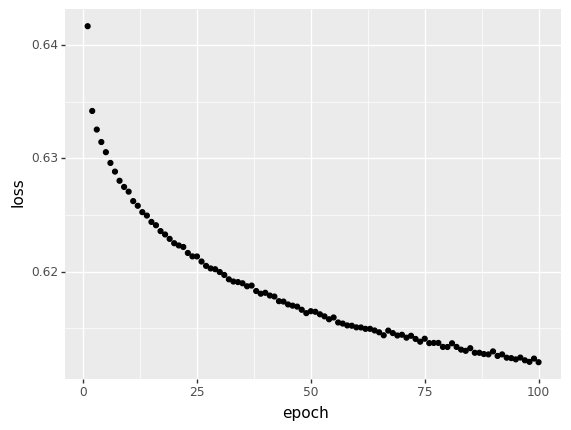

<ggplot: (193305861057)>

In [ ]:
from plotnine import ggplot, aes, geom_point
import numpy as np
import pandas as pd

# see what information has been logged during the training process
print(simple_nn6_cw.history.history.keys())

# plot the training loss over epochs
loss_df = pd.DataFrame(simple_nn6_cw.history.history['loss'])
loss_df.columns = ['loss']
loss_df = loss_df.assign(epoch = np.arange(1, len(loss_df) + 1))

(
    ggplot(loss_df, aes(x='epoch', y='loss')) +
    geom_point()
)


In [ ]:
# Define model architecture
def create_model():
    model = Sequential()
    model.add(Dense(38, input_dim=X6_train.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

# Create a new instance of the model
simple_nn6_cw = create_model()

# Now fit the model
simple_nn6_cw.fit(X6_train_cw, y6_train_cw, epochs=100, batch_size = 150, sample_weight=sample_weights, validation_data=(X6_val_cw, y6_val_cw))

Epoch 1/100
934/934 [==============================] - 3s 3ms/step - loss: 0.6408 - val_loss: 0.6234
Epoch 2/100
934/934 [==============================] - 3s 3ms/step - loss: 0.6346 - val_loss: 0.6213
Epoch 3/100
934/934 [==============================] - 4s 4ms/step - loss: 0.6330 - val_loss: 0.6403
Epoch 4/100
934/934 [==============================] - 3s 3ms/step - loss: 0.6317 - val_loss: 0.6428
Epoch 5/100
934/934 [==============================] - 4s 4ms/step - loss: 0.6307 - val_loss: 0.6227
Epoch 6/100
934/934 [==============================] - 5s 6ms/step - loss: 0.6298 - val_loss: 0.6362
Epoch 7/100
934/934 [==============================] - 2s 3ms/step - loss: 0.6290 - val_loss: 0.6093
Epoch 8/100
934/934 [==============================] - 3s 4ms/step - loss: 0.6284 - val_loss: 0.6296
Epoch 9/100
934/934 [==============================] - 4s 4ms/step - loss: 0.6275 - val_loss: 0.6308
Epoch 10/100
934/934 [==============================] - 2s 3ms/step - loss: 0.6270 - val_lo

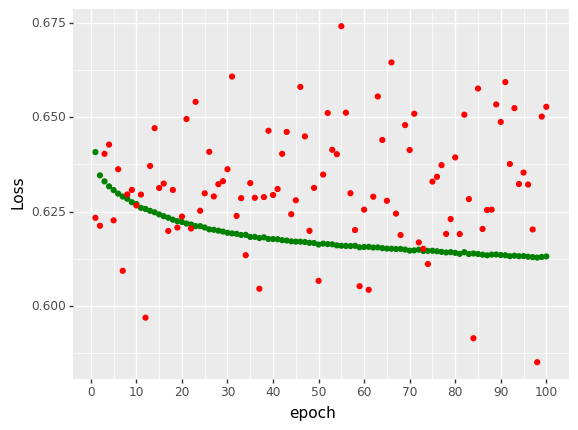

<ggplot: (193304123639)>

In [ ]:
from plotnine import ggplot, aes, geom_point, scale_x_continuous, ylab
import numpy as np
import pandas as pd

# plot the training loss over epochs
def plot_loss(nn_model):
    loss_df = pd.DataFrame({
        'train_loss': nn_model.history.history['loss'],
        'val_loss': nn_model.history.history['val_loss']
    })
    loss_df = loss_df.assign(epoch = np.arange(1, len(loss_df['train_loss']) + 1))

    p = (
        ggplot(loss_df) +
        geom_point(aes(x='epoch', y='train_loss'), color='green') +
        geom_point(aes(x='epoch', y='val_loss'), color='red') +
        scale_x_continuous(breaks = np.arange(0, 150, 10)) +
        ylab("Loss")
    )
    return p

plot_loss(simple_nn6_cw)


The validation loss is extremely scattered, which is not surprising since there is no data balancing applied. So, below we will apply the same code with data balancing.

In [ ]:
sample_weights = class_weight.compute_sample_weight('balanced', y6_train_cw)
sample_weights[y6_train_cw == 0] *= 2  # Assign even higher weights to class 1

In [ ]:
from keras.regularizers import l2

# Define model architecture
def create_model():
    model = Sequential()
    model.add(Dense(38, input_dim=X6_train.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

# Create a new instance of the model
simple_nn6_cw = create_model()

# Now fit the model
simple_nn6_cw.fit(X6_train_cw, y6_train_cw, epochs=100, batch_size = 100, sample_weight=sample_weights, validation_data=(X6_val_cw, y6_val_cw))

Epoch 1/100
1401/1401 [==============================] - 5s 3ms/step - loss: 0.8841 - val_loss: 0.8829
Epoch 2/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.8753 - val_loss: 0.9411
Epoch 3/100
1401/1401 [==============================] - 3s 2ms/step - loss: 0.8726 - val_loss: 0.9042
Epoch 4/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.8707 - val_loss: 0.9050
Epoch 5/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.8691 - val_loss: 0.8668
Epoch 6/100
1401/1401 [==============================] - 3s 2ms/step - loss: 0.8678 - val_loss: 0.8756
Epoch 7/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.8668 - val_loss: 0.9336
Epoch 8/100
1401/1401 [==============================] - 3s 2ms/step - loss: 0.8657 - val_loss: 0.8878
Epoch 9/100
1401/1401 [==============================] - 3s 2ms/step - loss: 0.8645 - val_loss: 0.9148
Epoch 10/100
1401/1401 [==============================] - 6s 4ms/step - l

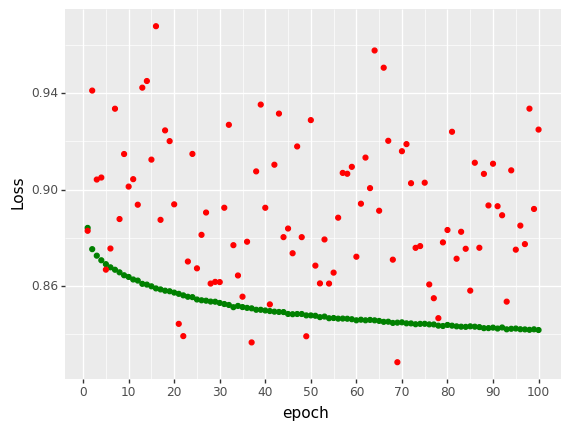

<ggplot: (193306564602)>

In [ ]:
from plotnine import ggplot, aes, geom_point, scale_x_continuous, ylab
import numpy as np
import pandas as pd

# plot the training loss over epochs
def plot_loss(nn_model):
    loss_df = pd.DataFrame({
        'train_loss': nn_model.history.history['loss'],
        'val_loss': nn_model.history.history['val_loss']
    })
    loss_df = loss_df.assign(epoch = np.arange(1, len(loss_df['train_loss']) + 1))

    p = (
        ggplot(loss_df) +
        geom_point(aes(x='epoch', y='train_loss'), color='green') +
        geom_point(aes(x='epoch', y='val_loss'), color='red') +
        scale_x_continuous(breaks = np.arange(0, 150, 10)) +
        ylab("Loss")
    )
    return p

plot_loss(simple_nn6_cw)


Unfortunately, databalancing on its own has not provided the desired results. We will try again using an additional layer, L2 regularizer and an adjusted learning rate.

In [ ]:
from keras.optimizers import Adam

# Define model architecture
def create_model():
    model = Sequential()
    model.add(Dense(38, input_dim=X6_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(19, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(1, activation='sigmoid'))

    # Define custom learning rate
    custom_adam = Adam(learning_rate=0.00005)  
    
    model.compile(loss='binary_crossentropy', optimizer=custom_adam)
    return model

# Create a new instance of the model
simple_nn6_cw = create_model()

# Now fit the model
simple_nn6_cw.fit(X6_train_cw, y6_train_cw, epochs=100, batch_size = 200, sample_weight=sample_weights, validation_data=(X6_val_cw, y6_val_cw))


Epoch 1/100
701/701 [==============================] - 3s 4ms/step - loss: 1.0083 - val_loss: 0.9931
Epoch 2/100
701/701 [==============================] - 2s 3ms/step - loss: 0.9665 - val_loss: 0.9921
Epoch 3/100
701/701 [==============================] - 2s 3ms/step - loss: 0.9507 - val_loss: 0.9784
Epoch 4/100
701/701 [==============================] - 2s 3ms/step - loss: 0.9413 - val_loss: 0.9631
Epoch 5/100
701/701 [==============================] - 3s 4ms/step - loss: 0.9346 - val_loss: 0.9595
Epoch 6/100
701/701 [==============================] - 2s 4ms/step - loss: 0.9293 - val_loss: 0.9588
Epoch 7/100
701/701 [==============================] - 2s 3ms/step - loss: 0.9249 - val_loss: 0.9496
Epoch 8/100
701/701 [==============================] - 2s 3ms/step - loss: 0.9212 - val_loss: 0.9454
Epoch 9/100
701/701 [==============================] - 2s 3ms/step - loss: 0.9180 - val_loss: 0.9431
Epoch 10/100
701/701 [==============================] - 2s 3ms/step - loss: 0.9152 - val_lo

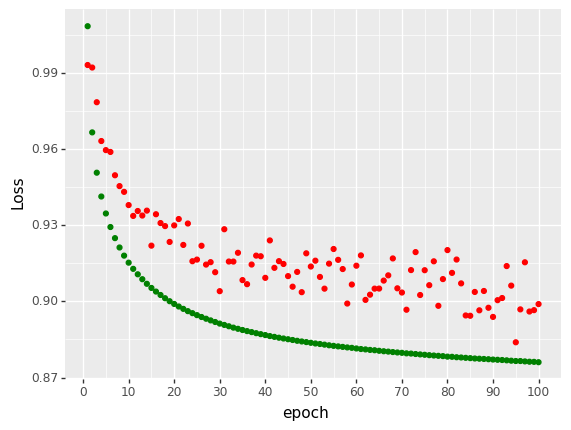

<ggplot: (193301255747)>

In [ ]:
from plotnine import ggplot, aes, geom_point, scale_x_continuous, ylab
import numpy as np
import pandas as pd

# plot the training loss over epochs
def plot_loss(nn_model):
    loss_df = pd.DataFrame({
        'train_loss': nn_model.history.history['loss'],
        'val_loss': nn_model.history.history['val_loss']
    })
    loss_df = loss_df.assign(epoch = np.arange(1, len(loss_df['train_loss']) + 1))

    p = (
        ggplot(loss_df) +
        geom_point(aes(x='epoch', y='train_loss'), color='green') +
        geom_point(aes(x='epoch', y='val_loss'), color='red') +
        scale_x_continuous(breaks = np.arange(0, 150, 10)) +
        ylab("Loss")
    )
    return p

plot_loss(simple_nn6_cw)


The results are fairly positive compared to the first couple of plots. Though the validation loss is still a bit scattered, we can see a downward moving trend which indicated that the model is learning. Since this is only a simple neural network, we check how this model performs in order to compare it to a more sophisticated model, i.e., with more hidden layers.

In [ ]:
# list of the original column names
original_columns = X6.columns 

# Convert numpy arrays back to pandas DataFrame
X6_train1 = pd.DataFrame(X6_train_cw, columns=original_columns)
X6_val1 = pd.DataFrame(X6_val_cw, columns=original_columns)

# y7_train and y7_val are 1-D numpy arrays, you can convert them to pandas Series
y6_train1 = pd.Series(y6_train_cw)
y6_val1 = pd.Series(y6_val_cw)

# Now you can concatenate
X6_train_validation_cw = pd.concat([X6_train1, X6_val1])
y6_train_validation_cw = pd.concat([y6_train1, y6_val1])

print(X6_train_validation_cw.shape)
print(y6_train_validation_cw.shape)

(175050, 74)
(175050,)


In [ ]:
# Calculate class weights
sample_weights_train_val6 = class_weight.compute_sample_weight('balanced', y6_train_validation_cw)

In [ ]:
from sklearn.metrics import f1_score

# Define custom learning rate
custom_adam = Adam(learning_rate=0.00005)  

final_nn6_cw = Sequential()
final_nn6_cw.add(Dense(38, input_dim=X6_train_cw.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
final_nn6_cw.add(Dense(19, activation='relu',  kernel_regularizer=l2(0.001)))
final_nn6_cw.add(Dense(1, activation='sigmoid'))
final_nn6_cw.compile(loss='binary_crossentropy', optimizer=custom_adam)
final_nn6_cw.fit(X6_train_validation_cw, y6_train_validation_cw, sample_weight=sample_weights_train_val6, epochs=50, batch_size = 20, verbose=0)
y_hat_test_nn6_cw = final_nn6_cw.predict(X6_test_cw)
y_hat_test_nn6_cw = np.where(y_hat_test_nn6_cw >= 0.5, 1, 0)
print("The f1 score of the 6th nn model is {}".format(f1_score(y6_test_cw, y_hat_test_nn6_cw)))

1368/1368 [==============================] - 3s 2ms/step
The f1 score of the 6th nn model is 0.727473061654379


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score

# Classification report
print("Classification Report:\n", classification_report(y6_test_cw, y_hat_test_nn6_cw))

# AUC
auc = roc_auc_score(y6_test_cw, y_hat_test_nn6_cw)

print(f'AUC: {auc}')

# Confusion Matrix
cm = confusion_matrix(y6_test_cw, y_hat_test_nn6_cw)
print(f'Confusion Matrix: \n{cm}')

Classification Report:
               precision    recall  f1-score   support

           0       0.24      0.67      0.35      6708
           1       0.91      0.61      0.73     37055

    accuracy                           0.62     43763
   macro avg       0.57      0.64      0.54     43763
weighted avg       0.81      0.62      0.67     43763

AUC: 0.6380233350688959
Confusion Matrix: 
[[ 4496  2212]
 [14607 22448]]


From the classification report, we can see that the F1 score of class zero and class 1 are 0.35 and 0.73 respectively. This is comparable to the F1 scores of other models. Moreover, the accuracy score also seems fairly optimistic at 0.62, although most of the correctly predicted loans are for the fully paid loans. Additionally, the AUC score of 0.64 indicates that the model still has difficulties of correctly distinguishing between charged off loans and fully paid loans.

For the next set of codes, we will build a more complex model to hopefully capture even more unseen data.

Epoch 1/100
1401/1401 [==============================] - 7s 3ms/step - loss: 0.4030 - val_loss: 0.4018
Epoch 2/100
1401/1401 [==============================] - 5s 3ms/step - loss: 0.3975 - val_loss: 0.4005
Epoch 3/100
1401/1401 [==============================] - 5s 3ms/step - loss: 0.3962 - val_loss: 0.4006
Epoch 4/100
1401/1401 [==============================] - 7s 5ms/step - loss: 0.3950 - val_loss: 0.4007
Epoch 5/100
1401/1401 [==============================] - 7s 5ms/step - loss: 0.3943 - val_loss: 0.4009
Epoch 6/100
1401/1401 [==============================] - 5s 4ms/step - loss: 0.3930 - val_loss: 0.4018
Epoch 7/100
1401/1401 [==============================] - 6s 4ms/step - loss: 0.3920 - val_loss: 0.4017
Epoch 8/100
1401/1401 [==============================] - 6s 4ms/step - loss: 0.3910 - val_loss: 0.4020
Epoch 9/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.3899 - val_loss: 0.4025
Epoch 10/100
1401/1401 [==============================] - 5s 3ms/step - l

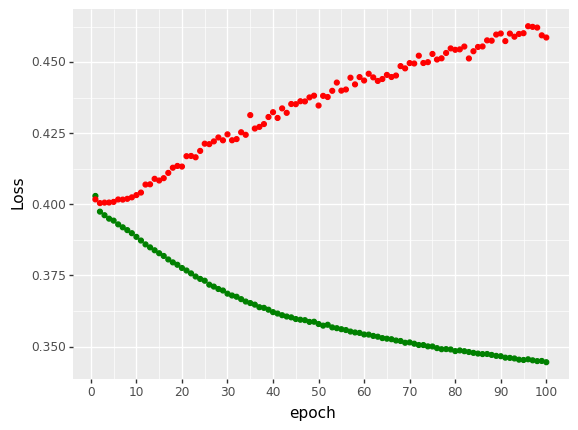

<ggplot: (193306636427)>

In [ ]:
from keras.regularizers import l2
from plotnine import ggplot, aes, geom_point, scale_x_continuous, ylab
import pandas as pd
import numpy as np

def plot_loss(history):
    loss_df = pd.DataFrame({
        'train_loss': history.history['loss'],
        'val_loss': history.history['val_loss']
    })
    loss_df = loss_df.assign(epoch = np.arange(1, len(loss_df['train_loss']) + 1))

    p = (
        ggplot(loss_df) +
        geom_point(aes(x='epoch', y='train_loss'), color='green') +
        geom_point(aes(x='epoch', y='val_loss'), color='red') +
        scale_x_continuous(breaks = np.arange(0, 150, 10)) +
        ylab("Loss")
    )
    return p

oversized_nn6 = Sequential()
oversized_nn6.add(Dense(60, input_dim=X6_train_cw.shape[1], activation='relu'))
oversized_nn6.add(Dense(40, activation='relu'))
oversized_nn6.add(Dense(15, activation='relu'))
oversized_nn6.add(Dense(1, activation='sigmoid'))
oversized_nn6.compile(loss="binary_crossentropy", optimizer="adam")

history_oversized_nn6 = oversized_nn6.fit(X6_train_cw, y6_train_cw, epochs=100, batch_size = 100, validation_data=(X6_val_cw, y6_val_cw))

# After the model has been trained, plot the loss
plot_loss(history_oversized_nn6)


The model starts to overfit immediately as expected. In the following models, we make an attempt to make sure that both the training loss and validation loss will gradually decrease with a small gap in between. We do this by adding class weights, L2 regularizer, adjusting learning rate/neurons/hidden layers/batch size etc. 

Epoch 1/100
1401/1401 [==============================] - 6s 4ms/step - loss: 0.8852 - val_loss: 0.9543
Epoch 2/100
1401/1401 [==============================] - 5s 4ms/step - loss: 0.8753 - val_loss: 0.9376
Epoch 3/100
1401/1401 [==============================] - 5s 4ms/step - loss: 0.8720 - val_loss: 0.9085
Epoch 4/100
1401/1401 [==============================] - 6s 4ms/step - loss: 0.8693 - val_loss: 0.9621
Epoch 5/100
1401/1401 [==============================] - 5s 3ms/step - loss: 0.8665 - val_loss: 0.9284
Epoch 6/100
1401/1401 [==============================] - 5s 4ms/step - loss: 0.8634 - val_loss: 0.9340
Epoch 7/100
1401/1401 [==============================] - 5s 4ms/step - loss: 0.8606 - val_loss: 0.9287
Epoch 8/100
1401/1401 [==============================] - 5s 3ms/step - loss: 0.8579 - val_loss: 0.9002
Epoch 9/100
1401/1401 [==============================] - 5s 4ms/step - loss: 0.8545 - val_loss: 0.9174
Epoch 10/100
1401/1401 [==============================] - 5s 4ms/step - l

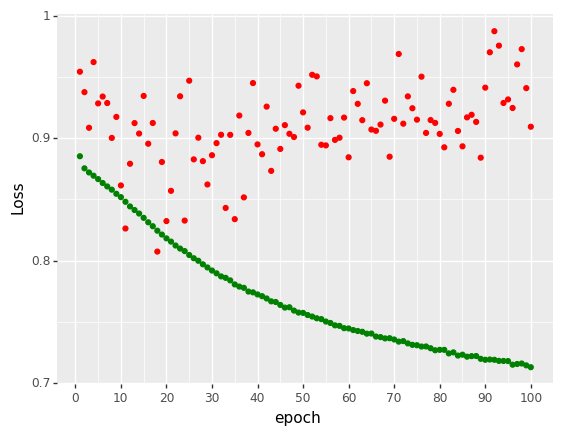

<ggplot: (193306970010)>

In [ ]:
from keras.regularizers import l2
from plotnine import ggplot, aes, geom_point, scale_x_continuous, ylab
import pandas as pd
import numpy as np

def plot_loss(history):
    loss_df = pd.DataFrame({
        'train_loss': history.history['loss'],
        'val_loss': history.history['val_loss']
    })
    loss_df = loss_df.assign(epoch = np.arange(1, len(loss_df['train_loss']) + 1))

    p = (
        ggplot(loss_df) +
        geom_point(aes(x='epoch', y='train_loss'), color='green') +
        geom_point(aes(x='epoch', y='val_loss'), color='red') +
        scale_x_continuous(breaks = np.arange(0, 150, 10)) +
        ylab("Loss")
    )
    return p


oversized_nn6 = Sequential()
oversized_nn6.add(Dense(60, input_dim=X6_train_cw.shape[1], activation='relu'))
oversized_nn6.add(Dense(40, activation='relu'))
oversized_nn6.add(Dense(15, activation='relu'))
oversized_nn6.add(Dense(1, activation='sigmoid'))
oversized_nn6.compile(loss="binary_crossentropy", optimizer="adam")

history_oversized_nn6 = oversized_nn6.fit(X6_train_cw, y6_train_cw, epochs=100, batch_size = 100, sample_weight=sample_weights, validation_data=(X6_val_cw, y6_val_cw))

# After the model has been trained, plot the loss
plot_loss(history_oversized_nn6)


After implementing sample weight, the model is still extremely underfit. We will add a custom learning rate in the next code.

Epoch 1/100
1401/1401 [==============================] - 6s 3ms/step - loss: 0.9110 - val_loss: 0.9130
Epoch 2/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.8804 - val_loss: 0.9110
Epoch 3/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.8774 - val_loss: 0.9071
Epoch 4/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.8753 - val_loss: 0.9142
Epoch 5/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.8738 - val_loss: 0.9047
Epoch 6/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.8726 - val_loss: 0.9180
Epoch 7/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.8713 - val_loss: 0.8691
Epoch 8/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.8703 - val_loss: 0.8980
Epoch 9/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.8693 - val_loss: 0.9089
Epoch 10/100
1401/1401 [==============================] - 4s 3ms/step - l

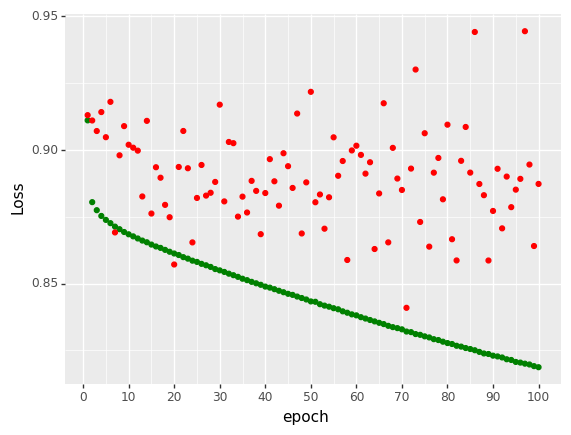

<ggplot: (193334651769)>

In [ ]:
from keras.regularizers import l2
from plotnine import ggplot, aes, geom_point, scale_x_continuous, ylab
import pandas as pd
import numpy as np

def plot_loss(history):
    loss_df = pd.DataFrame({
        'train_loss': history.history['loss'],
        'val_loss': history.history['val_loss']
    })
    loss_df = loss_df.assign(epoch = np.arange(1, len(loss_df['train_loss']) + 1))

    p = (
        ggplot(loss_df) +
        geom_point(aes(x='epoch', y='train_loss'), color='green') +
        geom_point(aes(x='epoch', y='val_loss'), color='red') +
        scale_x_continuous(breaks = np.arange(0, 150, 10)) +
        ylab("Loss")
    )
    return p

# Define custom learning rate
custom_adam = Adam(learning_rate=0.0001)

oversized_nn6 = Sequential()
oversized_nn6.add(Dense(60, input_dim=X6_train_cw.shape[1], activation='relu'))
oversized_nn6.add(Dense(40, activation='relu'))
oversized_nn6.add(Dense(15, activation='relu'))
oversized_nn6.add(Dense(1, activation='sigmoid'))
oversized_nn6.compile(loss="binary_crossentropy", optimizer=custom_adam)

history_oversized_nn6 = oversized_nn6.fit(X6_train_cw, y6_train_cw, epochs=100, batch_size = 100, sample_weight=sample_weights, validation_data=(X6_val_cw, y6_val_cw))

# After the model has been trained, plot the loss
plot_loss(history_oversized_nn6)


The custom learning improved the model slightly by showing a somewwhat downward trend in the first 30 epochs. However, the losses are still too scattered. We attempt to fix that applying L2 regularization.

Epoch 1/100
1401/1401 [==============================] - 6s 4ms/step - loss: 1.0280 - val_loss: 1.0219
Epoch 2/100
1401/1401 [==============================] - 6s 4ms/step - loss: 0.9717 - val_loss: 0.9807
Epoch 3/100
1401/1401 [==============================] - 5s 3ms/step - loss: 0.9492 - val_loss: 0.9676
Epoch 4/100
1401/1401 [==============================] - 5s 4ms/step - loss: 0.9347 - val_loss: 0.9384
Epoch 5/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.9247 - val_loss: 0.9200
Epoch 6/100
1401/1401 [==============================] - 6s 4ms/step - loss: 0.9172 - val_loss: 0.9232
Epoch 7/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.9115 - val_loss: 0.9196
Epoch 8/100
1401/1401 [==============================] - 5s 3ms/step - loss: 0.9071 - val_loss: 0.9242
Epoch 9/100
1401/1401 [==============================] - 5s 4ms/step - loss: 0.9035 - val_loss: 0.9280
Epoch 10/100
1401/1401 [==============================] - 5s 3ms/step - l

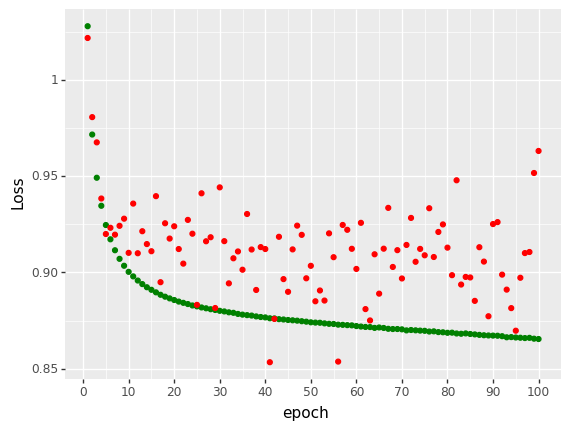

<ggplot: (193334454330)>

In [ ]:
from keras.regularizers import l2
from plotnine import ggplot, aes, geom_point, scale_x_continuous, ylab
import pandas as pd
import numpy as np

def plot_loss(history):
    loss_df = pd.DataFrame({
        'train_loss': history.history['loss'],
        'val_loss': history.history['val_loss']
    })
    loss_df = loss_df.assign(epoch = np.arange(1, len(loss_df['train_loss']) + 1))

    p = (
        ggplot(loss_df) +
        geom_point(aes(x='epoch', y='train_loss'), color='green') +
        geom_point(aes(x='epoch', y='val_loss'), color='red') +
        scale_x_continuous(breaks = np.arange(0, 150, 10)) +
        ylab("Loss")
    )
    return p

# Define custom learning rate
custom_adam = Adam(learning_rate=0.0001)

oversized_nn6 = Sequential()
oversized_nn6.add(Dense(60, input_dim=X6_train_cw.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
oversized_nn6.add(Dense(40, activation='relu', kernel_regularizer=l2(0.001)))
oversized_nn6.add(Dense(15, activation='relu', kernel_regularizer=l2(0.001)))
oversized_nn6.add(Dense(1, activation='sigmoid'))
oversized_nn6.compile(loss="binary_crossentropy", optimizer=custom_adam)

history_oversized_nn6 = oversized_nn6.fit(X6_train_cw, y6_train_cw, epochs=100, batch_size = 100, sample_weight=sample_weights, validation_data=(X6_val_cw, y6_val_cw))

# After the model has been trained, plot the loss
plot_loss(history_oversized_nn6)


The L2 regularization had minimal effect on the overfit issue, so we decrease the learning rate to 0.00001 to see the difference.

Epoch 1/100
1401/1401 [==============================] - 5s 3ms/step - loss: 0.8340 - val_loss: 0.8458
Epoch 2/100
1401/1401 [==============================] - 3s 2ms/step - loss: 0.7972 - val_loss: 0.7932
Epoch 3/100
1401/1401 [==============================] - 3s 2ms/step - loss: 0.7787 - val_loss: 0.7764
Epoch 4/100
1401/1401 [==============================] - 3s 2ms/step - loss: 0.7669 - val_loss: 0.7652
Epoch 5/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.7585 - val_loss: 0.7600
Epoch 6/100
1401/1401 [==============================] - 3s 2ms/step - loss: 0.7518 - val_loss: 0.7489
Epoch 7/100
1401/1401 [==============================] - 3s 2ms/step - loss: 0.7462 - val_loss: 0.7448
Epoch 8/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.7412 - val_loss: 0.7435
Epoch 9/100
1401/1401 [==============================] - 3s 2ms/step - loss: 0.7367 - val_loss: 0.7353
Epoch 10/100
1401/1401 [==============================] - 4s 3ms/step - l

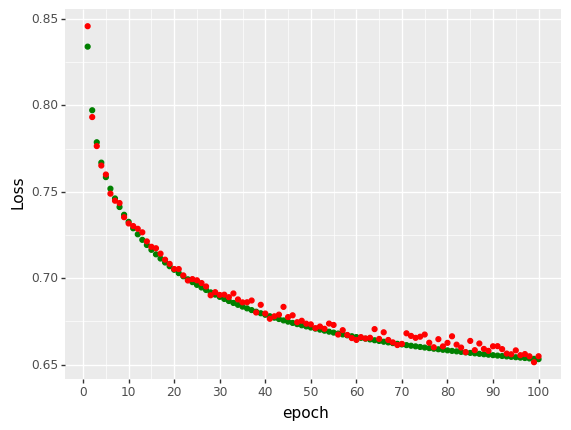

<ggplot: (138770887235)>

In [ ]:
from keras.regularizers import l2
from plotnine import ggplot, aes, geom_point, scale_x_continuous, ylab
import pandas as pd
import numpy as np
from keras.optimizers import Adam

def plot_loss(history):
    loss_df = pd.DataFrame({
        'train_loss': history.history['loss'],
        'val_loss': history.history['val_loss']
    })
    loss_df = loss_df.assign(epoch = np.arange(1, len(loss_df['train_loss']) + 1))

    p = (
        ggplot(loss_df) +
        geom_point(aes(x='epoch', y='train_loss'), color='green') +
        geom_point(aes(x='epoch', y='val_loss'), color='red') +
        scale_x_continuous(breaks = np.arange(0, 150, 10)) +
        ylab("Loss")
    )
    return p

# Define custom learning rate
custom_adam = Adam(learning_rate=0.00001)

oversized_nn6 = Sequential()
oversized_nn6.add(Dense(60, input_dim=X6_train_cw.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
oversized_nn6.add(Dense(40, activation='relu', kernel_regularizer=l2(0.001)))
oversized_nn6.add(Dense(15, activation='relu', kernel_regularizer=l2(0.001)))
oversized_nn6.add(Dense(1, activation='sigmoid'))
oversized_nn6.compile(loss="binary_crossentropy", optimizer=custom_adam)

history_oversized_nn6 = oversized_nn6.fit(X6_train_cw, y6_train_cw, epochs=100, batch_size = 100, sample_weight=sample_weights, validation_data=(X6_val_cw, y6_val_cw))

# After the model has been trained, plot the loss
plot_loss(history_oversized_nn6)


In [ ]:
from sklearn.metrics import f1_score

# Define custom learning rate
custom_adam = Adam(learning_rate=0.00001)

# Class Weights
sample_weights = class_weight.compute_sample_weight('balanced', y6_train_validation_cw)
sample_weights[y6_train_validation_cw == 0] *= 2

final_nn6 = Sequential()
final_nn6.add(Dense(60, input_dim=X6_train_cw.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
final_nn6.add(Dense(40, activation='relu', kernel_regularizer=l2(0.001)))
final_nn6.add(Dense(15, activation='relu', kernel_regularizer=l2(0.001)))
final_nn6.add(Dense(1, activation='sigmoid'))
final_nn6.compile(loss="binary_crossentropy", optimizer=custom_adam)
final_nn6.fit(X6_train_validation_cw, y6_train_validation_cw, epochs=50, batch_size = 20, sample_weight=sample_weights, verbose=0)
y_hat_test_nn6 = final_nn6.predict(X6_test)
y_hat_test_nn6 = np.where(y_hat_test_nn6 >= 0.5, 1, 0)
print("The f1 score of the 6th nn model is {}".format(f1_score(y6_test_cw, y_hat_test_nn6)))

1368/1368 [==============================] - 4s 2ms/step
The f1 score of the 6th nn model is 0.43024684928653273


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Get the predictions
y_hat_test_nn6 = final_nn6.predict(X6_test_cw)
y_hat_test_nn6_class = np.where(y_hat_test_nn6 >= 0.5, 1, 0)

# Classification report
print("Classification Report:\n", classification_report(y6_test_cw, y_hat_test_nn6_class))

# ROC AUC score
print("ROC AUC Score:", roc_auc_score(y6_test_cw, y_hat_test_nn6))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y6_test_cw, y_hat_test_nn6_class))


1368/1368 [==============================] - 2s 1ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.19      0.91      0.31      6708
           1       0.94      0.28      0.43     37055

    accuracy                           0.38     43763
   macro avg       0.56      0.59      0.37     43763
weighted avg       0.83      0.38      0.41     43763

ROC AUC Score: 0.6936720460254773
Confusion Matrix:
 [[ 6085   623]
 [26728 10327]]


The F1 scores and accuracy score is relatively low while the AUC score is acceptable. In the confusion matrix we can also see that this model has predicted the highest number of true negatives (defaults) so far. As a tradeoff, there is also a high number of false negatives, though low numbers of false positives and true positives. Overall, this might indicate that applying class weights enables the model to better generalize and predict the default class, than undersampling.

We will now use this model and perform a grid search in an attempt to find the best hyper parameters.

We will now use this model and perform a grid search in an attempt to find the best hyper parameters.

In [ ]:
from scikeras.wrappers import KerasClassifier


# function that creates the model
# note that we pass the number of neurons as a parameter to the network
def create_model(neurons=1):
    nn_model6 = Sequential()
    nn_model6.add(Dense(neurons, input_dim=X6_train_cw.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
    nn_model6.add(Dense(40, activation='relu', kernel_regularizer=l2(0.001)))
    nn_model6.add(Dense(15, activation='relu', kernel_regularizer=l2(0.001)))
    nn_model6.add(Dense(1, activation='sigmoid'))

    # Define custom learning rate
    custom_adam = Adam(learning_rate=0.00001)
    
    nn_model6.compile(loss='binary_crossentropy', optimizer=custom_adam)
    return nn_model6

seed = 1234
np.random.seed(seed)

# turn the keras model into a sklearn compatible model
# note that the neurons parameter needs to be specified in the interface of KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0, neurons=1)

In [ ]:
# define the grid search parameters
batch_size = [50, 100, 200]
epochs = [30, 50]
neurons = [20, 30, 40, 50, 60]
params_grid = dict(batch_size=batch_size, epochs=epochs, neurons=neurons)

In [ ]:
params_grid

{'batch_size': [50, 100, 200],
 'epochs': [30, 50],
 'neurons': [20, 30, 40, 50, 60]}

In [ ]:
from sklearn.model_selection import PredefinedSplit, GridSearchCV

# use PredefinedSplit to specify which observations are train and which are validation
fold_index = PredefinedSplit([-1]* X6_train_cw.shape[0] + [0] * X6_val_cw.shape[0])

In [ ]:
raise SystemExit("Stop right there!")

In [ ]:
import datetime
import os
import pickle
from sklearn.model_selection import GridSearchCV

start_time = datetime.datetime.now()
grid_search_nn = GridSearchCV(estimator=model, param_grid=params_grid, n_jobs=-1, cv=fold_index)
grid_search_nn = grid_search_nn.fit(X6_train_validation_cw, y6_train_validation_cw)
end_time = datetime.datetime.now()
print(f'hypertuning with sklearn grid search for neural networks complete in {round((end_time - start_time).seconds/60, 2)} minutes')
# store the results of the grid search to disk
with open('../dataset/nn_grid_search.pickle', 'wb') as handle:
    pickle.dump(grid_search_nn, handle)


In [ ]:
grid_search_nn

NameError: name 'grid_search_nn' is not defined

In [ ]:
print("The best parameter combination for NN6CW is: {} with score: {}".format(grid_search_nn.best_params_, grid_search_nn.best_score_))

NameError: name 'grid_search_nn' is not defined

In [ ]:
best_model6_cw = create_model(30)
best_model6_cw.fit(X6_train_validation_cw, y6_train_validation_cw, epochs=30, batch_size=50, verbose=0)

  71/1368 [>.............................] - ETA: 1s

1368/1368 [==============================] - 3s 2ms/step


c:\Users\Lawrence\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
c:\Users\Lawrence\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
c:\Users\Lawrence\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      6708
           1       0.85      1.00      0.92     37055

    accuracy                           0.85     43763
   macro avg       0.42      0.50      0.46     43763
weighted avg       0.72      0.85      0.78     43763

AUC: 0.5
Confusion Matrix: 
[[    0  6708]
 [    0 37055]]


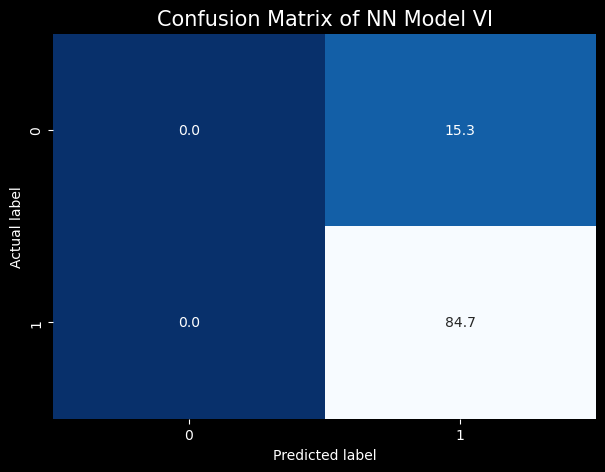

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score

y6_hat_test_cw = best_model6_cw.predict(X6_test_cw)
y6_hat_test_cw = np.where(y6_hat_test_cw >= 0.5, 1, 0)
f1_score(y6_test_cw, y6_hat_test_cw)

# Classification report
print("Classification Report:\n", classification_report(y6_test_cw, y6_hat_test_cw))

# AUC
auc = roc_auc_score(y6_test_cw, y6_hat_test_cw)
print(f'AUC: {auc}')

# Confusion Matrix
cm = confusion_matrix(y6_test_cw, y6_hat_test_cw)
print(f'Confusion Matrix: \n{cm}')

# Calculate percentages in the confusion matrix
cm_percent = cm / cm.sum() * 100

# Plot confusion matrix with percentages
plt.figure(figsize=(7, 5))
sns.heatmap(cm_percent, annot=True, fmt=".1f", cmap='Blues_r', cbar=False)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix of NN Model VI', size=15)
plt.show()


In [ ]:
import shap

# Initialize JavaScript visualization
shap.initjs()

# Select a random subset of the training data
background = X6_train_cw.iloc[np.random.choice(X6_train_cw.shape[0], 100, replace=False)]

# KernelExplainer
explainer = shap.KernelExplainer(best_model6_cw.predict, background)

# Calculate Shap values
shap_values_single = explainer.shap_values(X6_test.iloc[0,:].values.reshape(1,-1))

# Plot
shap.force_plot(explainer.expected_value[0], shap_values_single[0], X6_test.iloc[0,:])


4/4 [==============================] - 0s 3ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

6757/6757 [==============================] - 9s 1ms/step


The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 


Even after a grid search, the best performing model seems to be the neural network with 60 neurons in the input layer, 40 and 15 neurons in the hidden layers, with an L2 regularizer of factor 0.001, and a custom learning rate.

### Neural Network Model VII Class Weight

In [ ]:
print(f"The number of neurons for the input layer must be: {X7_train_cw.shape[1]}")

The number of neurons for the input layer must be: 79


In [ ]:
# define the neural network model class instance
simple_nn_cw7 = Sequential()
# add the first input layer with 29 nodes and the first hidden layer, with  relu activation function
# note that the first command does two things: create a first input layer with 29 nodes, and then a hidden layer
# we set the number of neurons to be equal to the (# of nodes in the input layer + # neurons in the output layer)/2,
# i.e. the mean of the number of neurons in the input layer and the output layer. This is usually a good heuristic to get started.
simple_nn_cw7.add(Dense(40, input_dim=X7_train_cw.shape[1], activation='relu'))
# add the output layer with sigmoid function (the sigmoid function is exactly the same as that used in the formulation of logisitc regression
simple_nn_cw7.add(Dense(1, activation='sigmoid'))

In [ ]:
print(simple_nn_cw7.summary())

Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_193 (Dense)           (None, 40)                3200      
                                                                 
 dense_194 (Dense)           (None, 1)                 41        
                                                                 
Total params: 3,241
Trainable params: 3,241
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
simple_nn_cw7.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
print(X7_train_cw.shape)
print(y7_train_cw.shape)
print(X7_val_cw.shape)
print(y7_val_cw.shape)

(140040, 79)
(140040,)
(35010, 79)
(35010,)


Applying Class Weight to the training set

In [ ]:
# Calculate class weights
sample_weights = class_weight.compute_sample_weight('balanced', y7_train_cw)

In [ ]:
# Define model architecture
def create_model():
    model = Sequential()
    model.add(Dense(40, input_dim=X7_train_cw.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

# Create a new instance of the model
simple_nn7_cw = create_model()

# Now fit the model with sample weights
simple_nn7_cw.fit(X7_train_cw, y7_train_cw, epochs=100, batch_size=150, sample_weight=sample_weights)


Epoch 1/100
934/934 [==============================] - 3s 2ms/step - loss: 0.6422
Epoch 2/100
934/934 [==============================] - 3s 3ms/step - loss: 0.6337
Epoch 3/100
934/934 [==============================] - 3s 3ms/step - loss: 0.6316
Epoch 4/100
934/934 [==============================] - 2s 2ms/step - loss: 0.6301
Epoch 5/100
934/934 [==============================] - 2s 2ms/step - loss: 0.6288
Epoch 6/100
934/934 [==============================] - 2s 2ms/step - loss: 0.6277
Epoch 7/100
934/934 [==============================] - 2s 3ms/step - loss: 0.6270
Epoch 8/100
934/934 [==============================] - 2s 2ms/step - loss: 0.6258
Epoch 9/100
934/934 [==============================] - 2s 3ms/step - loss: 0.6250
Epoch 10/100
934/934 [==============================] - 2s 2ms/step - loss: 0.6243
Epoch 11/100
934/934 [==============================] - 3s 3ms/step - loss: 0.6239
Epoch 12/100
934/934 [==============================] - 2s 2ms/step - loss: 0.6230
Epoch 13/100


dict_keys(['loss'])


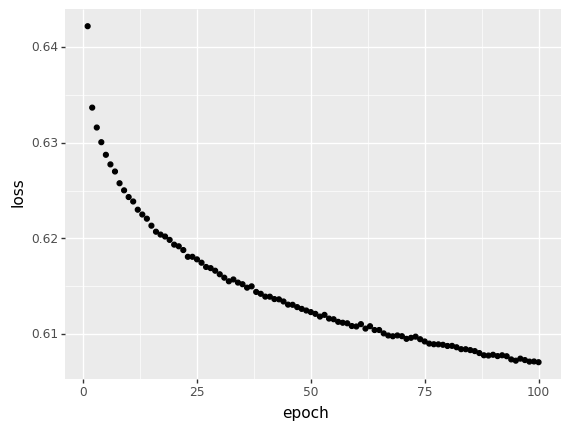

<ggplot: (193301975902)>

In [ ]:
from plotnine import ggplot, aes, geom_point
import numpy as np
import pandas as pd

# see what information has been logged during the training process
print(simple_nn7_cw.history.history.keys())

# plot the training loss over epochs
loss_df = pd.DataFrame(simple_nn7_cw.history.history['loss'])
loss_df.columns = ['loss']
loss_df = loss_df.assign(epoch = np.arange(1, len(loss_df) + 1))

(
    ggplot(loss_df, aes(x='epoch', y='loss')) +
    geom_point()
)


In [ ]:
# Define model architecture
def create_model():
    model = Sequential()
    model.add(Dense(40, input_dim=X7_train_cw.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

# Create a new instance of the model
simple_nn7_cw = create_model()

# Now fit the model
simple_nn7_cw.fit(X7_train_cw, y7_train_cw, epochs=100, batch_size = 150, sample_weight=sample_weights, validation_data=(X7_val_cw, y7_val_cw))

Epoch 1/100
934/934 [==============================] - 3s 2ms/step - loss: 0.6413 - val_loss: 0.6183
Epoch 2/100
934/934 [==============================] - 2s 2ms/step - loss: 0.6337 - val_loss: 0.6283
Epoch 3/100
934/934 [==============================] - 2s 2ms/step - loss: 0.6316 - val_loss: 0.6390
Epoch 4/100
934/934 [==============================] - 2s 2ms/step - loss: 0.6301 - val_loss: 0.6245
Epoch 5/100
934/934 [==============================] - 2s 2ms/step - loss: 0.6289 - val_loss: 0.6343
Epoch 6/100
934/934 [==============================] - 2s 2ms/step - loss: 0.6279 - val_loss: 0.6430
Epoch 7/100
934/934 [==============================] - 2s 2ms/step - loss: 0.6270 - val_loss: 0.6372
Epoch 8/100
934/934 [==============================] - 2s 2ms/step - loss: 0.6262 - val_loss: 0.6395
Epoch 9/100
934/934 [==============================] - 2s 2ms/step - loss: 0.6252 - val_loss: 0.6170
Epoch 10/100
934/934 [==============================] - 2s 2ms/step - loss: 0.6247 - val_lo

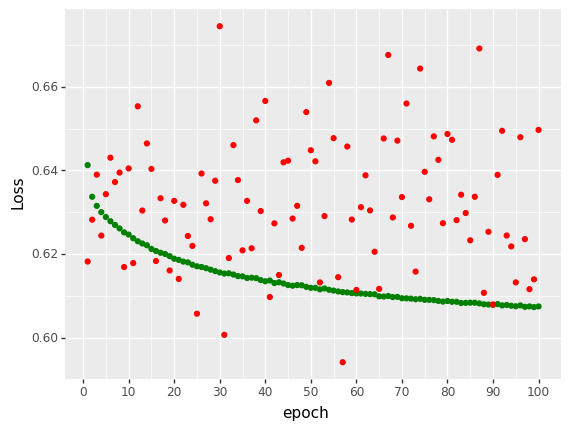

<ggplot: (193308847493)>

In [ ]:
from plotnine import ggplot, aes, geom_point, scale_x_continuous, ylab
import numpy as np
import pandas as pd

# plot the training loss over epochs
def plot_loss(nn_model):
    loss_df = pd.DataFrame({
        'train_loss': nn_model.history.history['loss'],
        'val_loss': nn_model.history.history['val_loss']
    })
    loss_df = loss_df.assign(epoch = np.arange(1, len(loss_df['train_loss']) + 1))

    p = (
        ggplot(loss_df) +
        geom_point(aes(x='epoch', y='train_loss'), color='green') +
        geom_point(aes(x='epoch', y='val_loss'), color='red') +
        scale_x_continuous(breaks = np.arange(0, 150, 10)) +
        ylab("Loss")
    )
    return p

plot_loss(simple_nn7_cw)


As we expected, the validation loss is extremely scattered like it was initially for model 6. The model does not have class weights applied or an adjusted weight and L2 regularization. We start with applying class weight balancing to see the difference.

In [ ]:
sample_weights = class_weight.compute_sample_weight('balanced', y7_train_cw)
sample_weights[y7_train_cw == 0] *= 1 

In [ ]:
from keras.regularizers import l2

# Define model architecture
def create_model():
    model = Sequential()
    model.add(Dense(40, input_dim=X7_train.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

# Create a new instance of the model
simple_nn7_cw = create_model()

# Now fit the model
simple_nn7_cw.fit(X7_train_cw, y7_train_cw, epochs=100, batch_size = 100, sample_weight=sample_weights, validation_data=(X7_val_cw, y7_val_cw))

Epoch 1/100
1401/1401 [==============================] - 4s 2ms/step - loss: 0.6406 - val_loss: 0.6420
Epoch 2/100
1401/1401 [==============================] - 3s 2ms/step - loss: 0.6332 - val_loss: 0.6372
Epoch 3/100
1401/1401 [==============================] - 3s 2ms/step - loss: 0.6312 - val_loss: 0.6167
Epoch 4/100
1401/1401 [==============================] - 3s 2ms/step - loss: 0.6297 - val_loss: 0.6273
Epoch 5/100
1401/1401 [==============================] - 3s 2ms/step - loss: 0.6286 - val_loss: 0.6389
Epoch 6/100
1401/1401 [==============================] - 3s 2ms/step - loss: 0.6274 - val_loss: 0.6413
Epoch 7/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.6265 - val_loss: 0.6112
Epoch 8/100
1401/1401 [==============================] - 3s 2ms/step - loss: 0.6258 - val_loss: 0.6268
Epoch 9/100
1401/1401 [==============================] - 3s 2ms/step - loss: 0.6248 - val_loss: 0.6106
Epoch 10/100
1401/1401 [==============================] - 3s 2ms/step - l

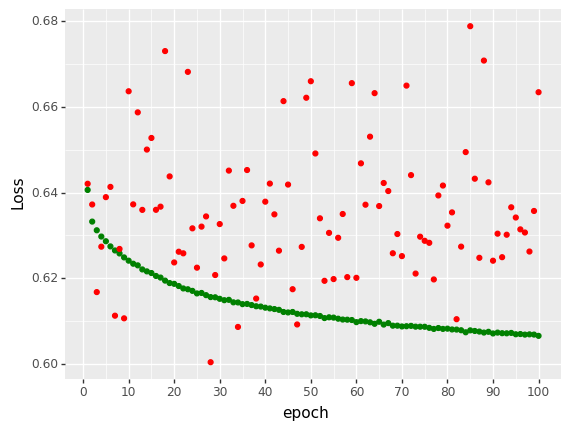

<ggplot: (193302503418)>

In [ ]:
from plotnine import ggplot, aes, geom_point, scale_x_continuous, ylab
import numpy as np
import pandas as pd

# plot the training loss over epochs
def plot_loss(nn_model):
    loss_df = pd.DataFrame({
        'train_loss': nn_model.history.history['loss'],
        'val_loss': nn_model.history.history['val_loss']
    })
    loss_df = loss_df.assign(epoch = np.arange(1, len(loss_df['train_loss']) + 1))

    p = (
        ggplot(loss_df) +
        geom_point(aes(x='epoch', y='train_loss'), color='green') +
        geom_point(aes(x='epoch', y='val_loss'), color='red') +
        scale_x_continuous(breaks = np.arange(0, 150, 10)) +
        ylab("Loss")
    )
    return p

plot_loss(simple_nn7_cw)


Although the validation loss is still scattered, it is more condensed compared to the previous graph. We now apply a custom learning rate.

In [ ]:
from keras.regularizers import l2

# Define model architecture
def create_model():
    model = Sequential()
    model.add(Dense(40, input_dim=X7_train.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Define custom learning rate
    custom_adam = Adam(learning_rate=0.00005)  

    model.compile(loss='binary_crossentropy', optimizer=custom_adam)
    return model

# Create a new instance of the model
simple_nn7_cw = create_model()

# Now fit the model
simple_nn7_cw.fit(X7_train_cw, y7_train_cw, epochs=100, batch_size = 100, sample_weight=sample_weights, validation_data=(X7_val_cw, y7_val_cw))

Epoch 1/100
1401/1401 [==============================] - 5s 3ms/step - loss: 0.7087 - val_loss: 0.6552
Epoch 2/100
1401/1401 [==============================] - 5s 3ms/step - loss: 0.6550 - val_loss: 0.6485
Epoch 3/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.6431 - val_loss: 0.6448
Epoch 4/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.6397 - val_loss: 0.6393
Epoch 5/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.6382 - val_loss: 0.6417
Epoch 6/100
1401/1401 [==============================] - 5s 3ms/step - loss: 0.6371 - val_loss: 0.6406
Epoch 7/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.6363 - val_loss: 0.6395
Epoch 8/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.6357 - val_loss: 0.6373
Epoch 9/100
1401/1401 [==============================] - 6s 4ms/step - loss: 0.6351 - val_loss: 0.6325
Epoch 10/100
1401/1401 [==============================] - 4s 3ms/step - l

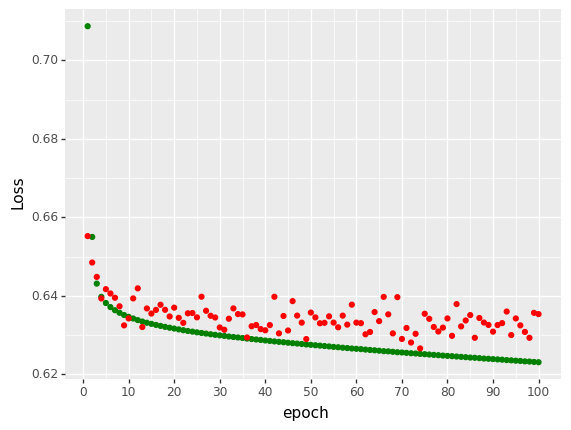

<ggplot: (193302406506)>

In [ ]:
from plotnine import ggplot, aes, geom_point, scale_x_continuous, ylab
import numpy as np
import pandas as pd

# plot the training loss over epochs
def plot_loss(nn_model):
    loss_df = pd.DataFrame({
        'train_loss': nn_model.history.history['loss'],
        'val_loss': nn_model.history.history['val_loss']
    })
    loss_df = loss_df.assign(epoch = np.arange(1, len(loss_df['train_loss']) + 1))

    p = (
        ggplot(loss_df) +
        geom_point(aes(x='epoch', y='train_loss'), color='green') +
        geom_point(aes(x='epoch', y='val_loss'), color='red') +
        scale_x_continuous(breaks = np.arange(0, 150, 10)) +
        ylab("Loss")
    )
    return p

plot_loss(simple_nn7_cw)


Adjusting the learning rate has greatly improved the model in the sense that the validation loss is less scattered. However, there is some of validation losses are beneath the training loss. We will now apply L2 regularization. 

In [ ]:
from keras.regularizers import l2

# Define model architecture
def create_model():
    model = Sequential()
    model.add(Dense(40, input_dim=X7_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(1, activation='sigmoid'))

    # Define custom learning rate
    custom_adam = Adam(learning_rate=0.00005)  

    model.compile(loss='binary_crossentropy', optimizer=custom_adam)
    return model

# Create a new instance of the model
simple_nn7_cw = create_model()

# Now fit the model
simple_nn7_cw.fit(X7_train_cw, y7_train_cw, epochs=100, batch_size = 100, sample_weight=sample_weights, validation_data=(X7_val_cw, y7_val_cw))

Epoch 1/100
1401/1401 [==============================] - 5s 3ms/step - loss: 0.7438 - val_loss: 0.7373
Epoch 2/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.6932 - val_loss: 0.6949
Epoch 3/100
1401/1401 [==============================] - 5s 3ms/step - loss: 0.6763 - val_loss: 0.6769
Epoch 4/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.6678 - val_loss: 0.6674
Epoch 5/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.6624 - val_loss: 0.6634
Epoch 6/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.6585 - val_loss: 0.6609
Epoch 7/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.6556 - val_loss: 0.6539
Epoch 8/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.6532 - val_loss: 0.6564
Epoch 9/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.6513 - val_loss: 0.6550
Epoch 10/100
1401/1401 [==============================] - 5s 3ms/step - l

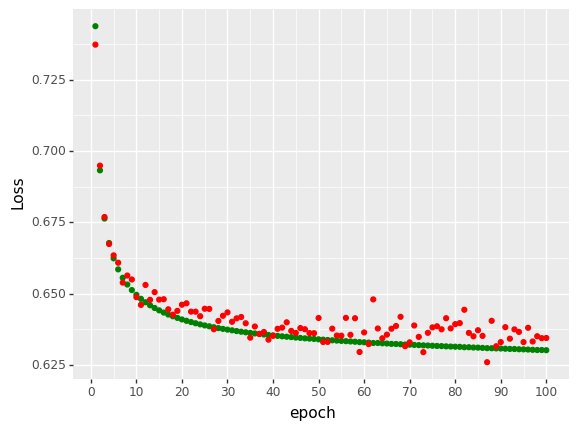

<ggplot: (193304905171)>

In [ ]:
from plotnine import ggplot, aes, geom_point, scale_x_continuous, ylab
import numpy as np
import pandas as pd

# plot the training loss over epochs
def plot_loss(nn_model):
    loss_df = pd.DataFrame({
        'train_loss': nn_model.history.history['loss'],
        'val_loss': nn_model.history.history['val_loss']
    })
    loss_df = loss_df.assign(epoch = np.arange(1, len(loss_df['train_loss']) + 1))

    p = (
        ggplot(loss_df) +
        geom_point(aes(x='epoch', y='train_loss'), color='green') +
        geom_point(aes(x='epoch', y='val_loss'), color='red') +
        scale_x_continuous(breaks = np.arange(0, 150, 10)) +
        ylab("Loss")
    )
    return p

plot_loss(simple_nn7_cw)


Applying L2 regularization with factor 0.001 caused the model to underfit. We add an additional hidden layer and reduced the L2 factor to 0.0001.

In [ ]:
from keras.regularizers import l2

# Define model architecture
def create_model():
    model = Sequential()
    model.add(Dense(40, input_dim=X7_train.shape[1], activation='relu', kernel_regularizer=l2(0.0001)))
    model.add(Dense(20, activation='relu', kernel_regularizer=l2(0.0001)))
    model.add(Dense(1, activation='sigmoid'))

    # Define custom learning rate
    custom_adam = Adam(learning_rate=0.00005)  

    model.compile(loss='binary_crossentropy', optimizer=custom_adam)
    return model

# Create a new instance of the model
simple_nn7_cw = create_model()

# Now fit the model
simple_nn7_cw.fit(X7_train_cw, y7_train_cw, epochs=100, batch_size = 100, sample_weight=sample_weights, validation_data=(X7_val_cw, y7_val_cw))

Epoch 1/100
1401/1401 [==============================] - 5s 3ms/step - loss: 0.6818 - val_loss: 0.6690
Epoch 2/100
1401/1401 [==============================] - 3s 2ms/step - loss: 0.6559 - val_loss: 0.6575
Epoch 3/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.6498 - val_loss: 0.6547
Epoch 4/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.6470 - val_loss: 0.6480
Epoch 5/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.6453 - val_loss: 0.6418
Epoch 6/100
1401/1401 [==============================] - 3s 2ms/step - loss: 0.6439 - val_loss: 0.6454
Epoch 7/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.6429 - val_loss: 0.6446
Epoch 8/100
1401/1401 [==============================] - 3s 2ms/step - loss: 0.6420 - val_loss: 0.6458
Epoch 9/100
1401/1401 [==============================] - 3s 2ms/step - loss: 0.6412 - val_loss: 0.6439
Epoch 10/100
1401/1401 [==============================] - 3s 2ms/step - l

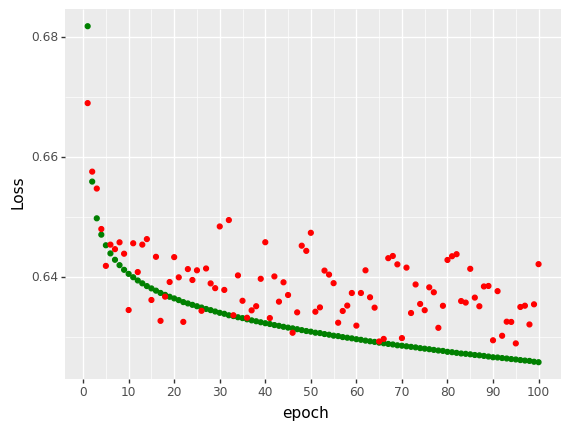

<ggplot: (193318697316)>

In [ ]:
from plotnine import ggplot, aes, geom_point, scale_x_continuous, ylab
import numpy as np
import pandas as pd

# plot the training loss over epochs
def plot_loss(nn_model):
    loss_df = pd.DataFrame({
        'train_loss': nn_model.history.history['loss'],
        'val_loss': nn_model.history.history['val_loss']
    })
    loss_df = loss_df.assign(epoch = np.arange(1, len(loss_df['train_loss']) + 1))

    p = (
        ggplot(loss_df) +
        geom_point(aes(x='epoch', y='train_loss'), color='green') +
        geom_point(aes(x='epoch', y='val_loss'), color='red') +
        scale_x_continuous(breaks = np.arange(0, 150, 10)) +
        ylab("Loss")
    )
    return p

plot_loss(simple_nn7_cw)


The addition of a hidden layer and reduction of L2 regularization caused the validation loss to be scattered again. Perhaps changing the class weights will give better results.

In [ ]:
sample_weights = class_weight.compute_sample_weight('balanced', y7_train_cw)
sample_weights[y7_train_cw == 0] *= 2 

In [ ]:
from keras.regularizers import l2

# Define model architecture
def create_model():
    model = Sequential()
    model.add(Dense(40, input_dim=X7_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(1, activation='sigmoid'))

    # Define custom learning rate
    custom_adam = Adam(learning_rate=0.00005)  

    model.compile(loss='binary_crossentropy', optimizer=custom_adam)
    return model

# Create a new instance of the model
simple_nn7_cw = create_model()

# Now fit the model
simple_nn7_cw.fit(X7_train_cw, y7_train_cw, epochs=100, batch_size = 100, sample_weight=sample_weights, validation_data=(X7_val_cw, y7_val_cw))

Epoch 1/100
1401/1401 [==============================] - 4s 3ms/step - loss: 1.0182 - val_loss: 0.9494
Epoch 2/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.9402 - val_loss: 0.9571
Epoch 3/100
1401/1401 [==============================] - 3s 2ms/step - loss: 0.9246 - val_loss: 0.9478
Epoch 4/100
1401/1401 [==============================] - 3s 2ms/step - loss: 0.9167 - val_loss: 0.9382
Epoch 5/100
1401/1401 [==============================] - 3s 2ms/step - loss: 0.9113 - val_loss: 0.9436
Epoch 6/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.9072 - val_loss: 0.9321
Epoch 7/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.9039 - val_loss: 0.9229
Epoch 8/100
1401/1401 [==============================] - 3s 2ms/step - loss: 0.9011 - val_loss: 0.9204
Epoch 9/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.8987 - val_loss: 0.9218
Epoch 10/100
1401/1401 [==============================] - 3s 2ms/step - l

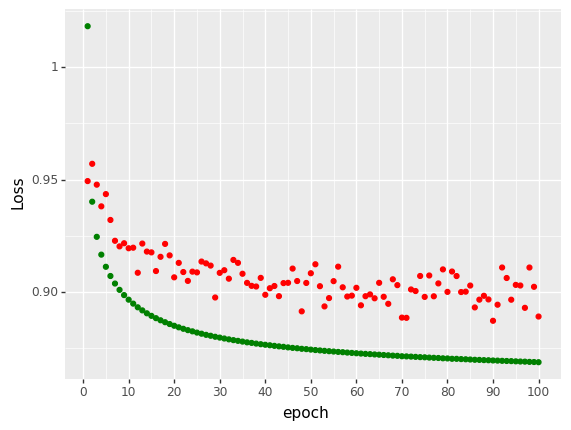

<ggplot: (193319054523)>

In [ ]:
from plotnine import ggplot, aes, geom_point, scale_x_continuous, ylab
import numpy as np
import pandas as pd

# plot the training loss over epochs
def plot_loss(nn_model):
    loss_df = pd.DataFrame({
        'train_loss': nn_model.history.history['loss'],
        'val_loss': nn_model.history.history['val_loss']
    })
    loss_df = loss_df.assign(epoch = np.arange(1, len(loss_df['train_loss']) + 1))

    p = (
        ggplot(loss_df) +
        geom_point(aes(x='epoch', y='train_loss'), color='green') +
        geom_point(aes(x='epoch', y='val_loss'), color='red') +
        scale_x_continuous(breaks = np.arange(0, 150, 10)) +
        ylab("Loss")
    )
    return p

plot_loss(simple_nn7_cw)


The plot looks quite similar to the simple neural network of model 6. Below we tried to apply the same parameters of the simple neural network of model 6 on model 7, but it gives us worse results than the one above.

In [ ]:
from keras.regularizers import l2

# Define model architecture
def create_model():
    model = Sequential()
    model.add(Dense(40, input_dim=X7_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(20, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(1, activation='sigmoid'))

    # Define custom learning rate
    custom_adam = Adam(learning_rate=0.00005)  

    model.compile(loss='binary_crossentropy', optimizer=custom_adam)
    return model

# Create a new instance of the model
simple_nn7_cw = create_model()

# Now fit the model
simple_nn7_cw.fit(X7_train_cw, y7_train_cw, epochs=100, batch_size = 200, sample_weight=sample_weights, validation_data=(X7_val_cw, y7_val_cw))

Epoch 1/100
701/701 [==============================] - 5s 6ms/step - loss: 1.0094 - val_loss: 1.0027
Epoch 2/100
701/701 [==============================] - 4s 5ms/step - loss: 0.9753 - val_loss: 0.9948
Epoch 3/100
701/701 [==============================] - 3s 5ms/step - loss: 0.9588 - val_loss: 0.9667
Epoch 4/100
701/701 [==============================] - 3s 4ms/step - loss: 0.9474 - val_loss: 0.9665
Epoch 5/100
701/701 [==============================] - 3s 4ms/step - loss: 0.9389 - val_loss: 0.9610
Epoch 6/100
701/701 [==============================] - 4s 6ms/step - loss: 0.9325 - val_loss: 0.9500
Epoch 7/100
701/701 [==============================] - 3s 5ms/step - loss: 0.9274 - val_loss: 0.9483
Epoch 8/100
701/701 [==============================] - 3s 4ms/step - loss: 0.9232 - val_loss: 0.9375
Epoch 9/100
701/701 [==============================] - 3s 4ms/step - loss: 0.9196 - val_loss: 0.9515
Epoch 10/100
701/701 [==============================] - 3s 4ms/step - loss: 0.9166 - val_lo

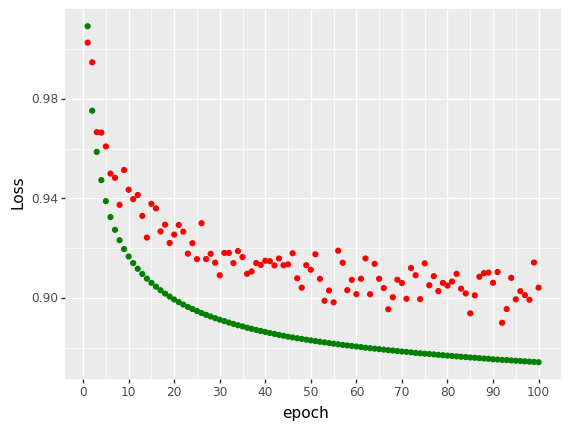

<ggplot: (193305314609)>

In [ ]:
from plotnine import ggplot, aes, geom_point, scale_x_continuous, ylab
import numpy as np
import pandas as pd

# plot the training loss over epochs
def plot_loss(nn_model):
    loss_df = pd.DataFrame({
        'train_loss': nn_model.history.history['loss'],
        'val_loss': nn_model.history.history['val_loss']
    })
    loss_df = loss_df.assign(epoch = np.arange(1, len(loss_df['train_loss']) + 1))

    p = (
        ggplot(loss_df) +
        geom_point(aes(x='epoch', y='train_loss'), color='green') +
        geom_point(aes(x='epoch', y='val_loss'), color='red') +
        scale_x_continuous(breaks = np.arange(0, 150, 10)) +
        ylab("Loss")
    )
    return p

plot_loss(simple_nn7_cw)


Here above is the plot with the same parameters as simple nn model 6. The better model will be used to analyse the final results.

In [ ]:
# list of the original column names
original_columns = X7.columns 

# Convert numpy arrays back to pandas DataFrame
X7_train1 = pd.DataFrame(X7_train_cw, columns=original_columns)
X7_val1 = pd.DataFrame(X7_val_cw, columns=original_columns)

# y7_train and y7_val are 1-D numpy arrays, you can convert them to pandas Series
y7_train1 = pd.Series(y7_train_cw)
y7_val1 = pd.Series(y7_val_cw)

# Now you can concatenate
X7_train_validation_cw = pd.concat([X7_train1, X7_val1])
y7_train_validation_cw = pd.concat([y7_train1, y7_val1])

print(X7_train_validation_cw.shape)
print(y7_train_validation_cw.shape)

(175050, 79)
(175050,)


In [ ]:
from sklearn.utils import class_weight

# Calculate class weights based on combined training and validation set
sample_weights_train_val7 = class_weight.compute_sample_weight('balanced', y7_train_validation_cw)


In [ ]:
from sklearn.metrics import f1_score

final_nn7_cw = Sequential()
final_nn7_cw.add(Dense(40, input_dim=X7_train_cw.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
final_nn7_cw.add(Dense(1, activation='sigmoid'))

# Define custom learning rate
custom_adam = Adam(learning_rate=0.00005)  

final_nn7_cw.compile(loss='binary_crossentropy', optimizer=custom_adam)
final_nn7_cw.fit(X7_train_validation_cw, y7_train_validation_cw, sample_weight=sample_weights_train_val7, epochs=50, batch_size = 20, verbose=0)
y_hat_test_nn7_cw = final_nn7_cw.predict(X7_test_cw)
y_hat_test_nn7_cw = np.where(y_hat_test_nn7_cw >= 0.5, 1, 0)
print("The f1 score of the 7th nn model is {}".format(f1_score(y7_test_cw, y_hat_test_nn7_cw)))


1368/1368 [==============================] - 6s 4ms/step
The f1 score of the 7th nn model is 0.7544711856922058


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score

# Classification report
print("Classification Report:\n", classification_report(y7_test_cw, y_hat_test_nn7_cw))

# AUC
auc = roc_auc_score(y7_test_cw, y_hat_test_nn7_cw)

print(f'AUC: {auc}')

# Confusion Matrix
cm = confusion_matrix(y7_test_cw, y_hat_test_nn7_cw)
print(f'Confusion Matrix: \n{cm}')

Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.64      0.35      6708
           1       0.91      0.65      0.75     37055

    accuracy                           0.64     43763
   macro avg       0.58      0.64      0.55     43763
weighted avg       0.81      0.64      0.69     43763

AUC: 0.6414738780135284
Confusion Matrix: 
[[ 4276  2432]
 [13136 23919]]


The results of model 7 are almost identical to the results of model 6, with the result of model 6 even slightly better. As such, model 6 has fewer features, though better performance. This might be an indication that macroeconomic variables do not enhance the prediction capabilities of individual neural networks. 

We will now proceed to create a more complex neural network model.

Epoch 1/100
1401/1401 [==============================] - 22s 15ms/step - loss: 0.4036 - val_loss: 0.4018
Epoch 2/100
1401/1401 [==============================] - 5s 4ms/step - loss: 0.3970 - val_loss: 0.4006
Epoch 3/100
1401/1401 [==============================] - 5s 3ms/step - loss: 0.3954 - val_loss: 0.4023
Epoch 4/100
1401/1401 [==============================] - 5s 4ms/step - loss: 0.3942 - val_loss: 0.4009
Epoch 5/100
1401/1401 [==============================] - 5s 3ms/step - loss: 0.3929 - val_loss: 0.4010
Epoch 6/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.3918 - val_loss: 0.4041
Epoch 7/100
1401/1401 [==============================] - 5s 4ms/step - loss: 0.3905 - val_loss: 0.4017
Epoch 8/100
1401/1401 [==============================] - 6s 4ms/step - loss: 0.3892 - val_loss: 0.4040
Epoch 9/100
1401/1401 [==============================] - 5s 4ms/step - loss: 0.3880 - val_loss: 0.4032
Epoch 10/100
1401/1401 [==============================] - 5s 3ms/step -

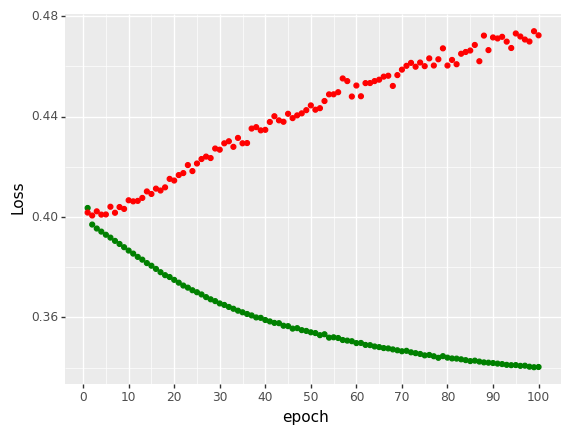

<ggplot: (193319050545)>

In [ ]:
from keras.regularizers import l2
from plotnine import ggplot, aes, geom_point, scale_x_continuous, ylab
import pandas as pd
import numpy as np

def plot_loss(history):
    loss_df = pd.DataFrame({
        'train_loss': history.history['loss'],
        'val_loss': history.history['val_loss']
    })
    loss_df = loss_df.assign(epoch = np.arange(1, len(loss_df['train_loss']) + 1))

    p = (
        ggplot(loss_df) +
        geom_point(aes(x='epoch', y='train_loss'), color='green') +
        geom_point(aes(x='epoch', y='val_loss'), color='red') +
        scale_x_continuous(breaks = np.arange(0, 150, 10)) +
        ylab("Loss")
    )
    return p

oversized_nn7 = Sequential()
oversized_nn7.add(Dense(60, input_dim=X7_train_cw.shape[1], activation='relu'))
oversized_nn7.add(Dense(40, activation='relu'))
oversized_nn7.add(Dense(15, activation='relu'))
oversized_nn7.add(Dense(1, activation='sigmoid'))
oversized_nn7.compile(loss="binary_crossentropy", optimizer="adam")

history_oversized_nn7 = oversized_nn7.fit(X7_train_cw, y7_train_cw, epochs=100, batch_size = 100, validation_data=(X7_val_cw, y7_val_cw))

# After the model has been trained, plot the loss
plot_loss(history_oversized_nn7)


We see that the model starts to overfit immediately as expected. We will make an attempt to optimize the losses by adjusting the hyper parameters.

Epoch 1/100
1401/1401 [==============================] - 5s 3ms/step - loss: 0.6404 - val_loss: 0.6144
Epoch 2/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.6329 - val_loss: 0.6397
Epoch 3/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.6305 - val_loss: 0.6414
Epoch 4/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.6281 - val_loss: 0.6334
Epoch 5/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.6257 - val_loss: 0.6401
Epoch 6/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.6231 - val_loss: 0.6353
Epoch 7/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.6212 - val_loss: 0.6044
Epoch 8/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.6187 - val_loss: 0.6223
Epoch 9/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.6157 - val_loss: 0.6348
Epoch 10/100
1401/1401 [==============================] - 4s 3ms/step - l

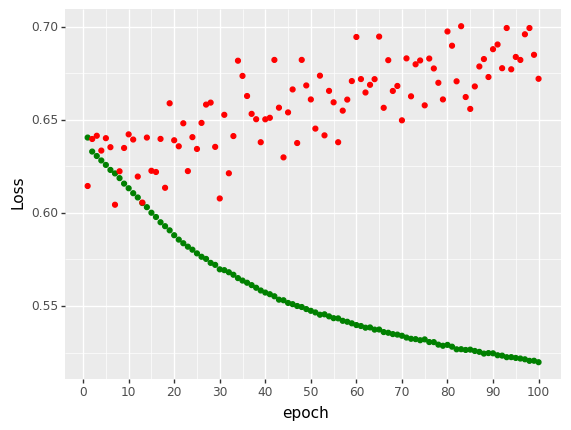

<ggplot: (193307706341)>

In [ ]:
from keras.regularizers import l2
from plotnine import ggplot, aes, geom_point, scale_x_continuous, ylab
import pandas as pd
import numpy as np

def plot_loss(history):
    loss_df = pd.DataFrame({
        'train_loss': history.history['loss'],
        'val_loss': history.history['val_loss']
    })
    loss_df = loss_df.assign(epoch = np.arange(1, len(loss_df['train_loss']) + 1))

    p = (
        ggplot(loss_df) +
        geom_point(aes(x='epoch', y='train_loss'), color='green') +
        geom_point(aes(x='epoch', y='val_loss'), color='red') +
        scale_x_continuous(breaks = np.arange(0, 150, 10)) +
        ylab("Loss")
    )
    return p

sample_weights = class_weight.compute_sample_weight('balanced', y7_train_cw)
sample_weights[y7_train_cw == 0] *= 1 

oversized_nn7 = Sequential()
oversized_nn7.add(Dense(60, input_dim=X7_train_cw.shape[1], activation='relu'))
oversized_nn7.add(Dense(40, activation='relu'))
oversized_nn7.add(Dense(15, activation='relu'))
oversized_nn7.add(Dense(1, activation='sigmoid'))
oversized_nn7.compile(loss="binary_crossentropy", optimizer="adam")

history_oversized_nn7 = oversized_nn7.fit(X7_train_cw, y7_train_cw, epochs=100, batch_size = 100, sample_weight=sample_weights,  validation_data=(X7_val_cw, y7_val_cw))

# After the model has been trained, plot the loss
plot_loss(history_oversized_nn7)


We see a similar increasing patters as before the implementation of class weights. However, the validation loss is now scattered. We increase the class weights and apply a custom learning rate.

Epoch 1/100
1401/1401 [==============================] - 7s 4ms/step - loss: 0.9085 - val_loss: 0.9110
Epoch 2/100
1401/1401 [==============================] - 5s 4ms/step - loss: 0.8833 - val_loss: 0.9139
Epoch 3/100
1401/1401 [==============================] - 5s 3ms/step - loss: 0.8788 - val_loss: 0.8959
Epoch 4/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.8761 - val_loss: 0.9197
Epoch 5/100
1401/1401 [==============================] - 5s 4ms/step - loss: 0.8741 - val_loss: 0.9185
Epoch 6/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.8726 - val_loss: 0.9022
Epoch 7/100
1401/1401 [==============================] - 5s 3ms/step - loss: 0.8712 - val_loss: 0.8872
Epoch 8/100
1401/1401 [==============================] - 5s 4ms/step - loss: 0.8700 - val_loss: 0.9111
Epoch 9/100
1401/1401 [==============================] - 5s 3ms/step - loss: 0.8688 - val_loss: 0.9034
Epoch 10/100
1401/1401 [==============================] - 5s 3ms/step - l

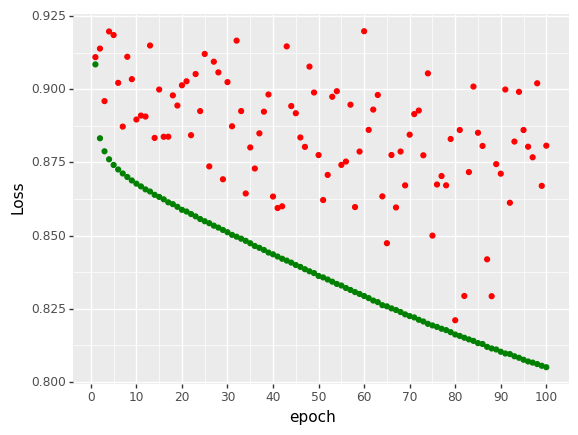

<ggplot: (193308841412)>

In [ ]:
from keras.regularizers import l2
from plotnine import ggplot, aes, geom_point, scale_x_continuous, ylab
import pandas as pd
import numpy as np

def plot_loss(history):
    loss_df = pd.DataFrame({
        'train_loss': history.history['loss'],
        'val_loss': history.history['val_loss']
    })
    loss_df = loss_df.assign(epoch = np.arange(1, len(loss_df['train_loss']) + 1))

    p = (
        ggplot(loss_df) +
        geom_point(aes(x='epoch', y='train_loss'), color='green') +
        geom_point(aes(x='epoch', y='val_loss'), color='red') +
        scale_x_continuous(breaks = np.arange(0, 150, 10)) +
        ylab("Loss")
    )
    return p

# Class Weights
sample_weights = class_weight.compute_sample_weight('balanced', y7_train_cw)
sample_weights[y7_train_cw == 0] *= 2 

# Custom Learning Rate
custom_adam = Adam(learning_rate=0.0001)

oversized_nn7 = Sequential()
oversized_nn7.add(Dense(60, input_dim=X7_train_cw.shape[1], activation='relu'))
oversized_nn7.add(Dense(40, activation='relu'))
oversized_nn7.add(Dense(15, activation='relu'))
oversized_nn7.add(Dense(1, activation='sigmoid'))
oversized_nn7.compile(loss="binary_crossentropy", optimizer=custom_adam)

history_oversized_nn7 = oversized_nn7.fit(X7_train_cw, y7_train_cw, epochs=100, batch_size = 100, sample_weight=sample_weights,  validation_data=(X7_val_cw, y7_val_cw))

# After the model has been trained, plot the loss
plot_loss(history_oversized_nn7)


The validation loss is still scattered. We apply L2 regularization to see if that will limit this issue.

Epoch 1/100
1401/1401 [==============================] - 7s 4ms/step - loss: 1.0322 - val_loss: 0.9907
Epoch 2/100
1401/1401 [==============================] - 6s 4ms/step - loss: 0.9750 - val_loss: 0.9967
Epoch 3/100
1401/1401 [==============================] - 5s 4ms/step - loss: 0.9537 - val_loss: 0.9667
Epoch 4/100
1401/1401 [==============================] - 5s 3ms/step - loss: 0.9395 - val_loss: 0.9839
Epoch 5/100
1401/1401 [==============================] - 5s 3ms/step - loss: 0.9293 - val_loss: 0.9574
Epoch 6/100
1401/1401 [==============================] - 5s 4ms/step - loss: 0.9215 - val_loss: 0.9543
Epoch 7/100
1401/1401 [==============================] - 5s 3ms/step - loss: 0.9153 - val_loss: 0.9504
Epoch 8/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.9103 - val_loss: 0.9457
Epoch 9/100
1401/1401 [==============================] - 5s 4ms/step - loss: 0.9064 - val_loss: 0.9591
Epoch 10/100
1401/1401 [==============================] - 5s 3ms/step - l

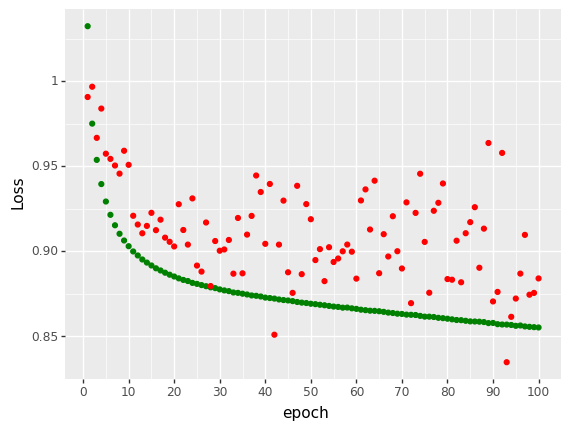

<ggplot: (193318460730)>

In [ ]:
from keras.regularizers import l2
from plotnine import ggplot, aes, geom_point, scale_x_continuous, ylab
import pandas as pd
import numpy as np

def plot_loss(history):
    loss_df = pd.DataFrame({
        'train_loss': history.history['loss'],
        'val_loss': history.history['val_loss']
    })
    loss_df = loss_df.assign(epoch = np.arange(1, len(loss_df['train_loss']) + 1))

    p = (
        ggplot(loss_df) +
        geom_point(aes(x='epoch', y='train_loss'), color='green') +
        geom_point(aes(x='epoch', y='val_loss'), color='red') +
        scale_x_continuous(breaks = np.arange(0, 150, 10)) +
        ylab("Loss")
    )
    return p

# Class Weights
sample_weights = class_weight.compute_sample_weight('balanced', y7_train_cw)
sample_weights[y7_train_cw == 0] *= 2 

# Custom Learning Rate
custom_adam = Adam(learning_rate=0.0001)

oversized_nn7 = Sequential()
oversized_nn7.add(Dense(60, input_dim=X7_train_cw.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
oversized_nn7.add(Dense(40, activation='relu', kernel_regularizer=l2(0.001)))
oversized_nn7.add(Dense(15, activation='relu', kernel_regularizer=l2(0.001)))
oversized_nn7.add(Dense(1, activation='sigmoid'))
oversized_nn7.compile(loss="binary_crossentropy", optimizer=custom_adam)

history_oversized_nn7 = oversized_nn7.fit(X7_train_cw, y7_train_cw, epochs=100, batch_size = 100, sample_weight=sample_weights,  validation_data=(X7_val_cw, y7_val_cw))

# After the model has been trained, plot the loss
plot_loss(history_oversized_nn7)


The application of the custom learning rate, class weights, and L2 regularizer, still has not yielded the desired outcome. We will now tune these hyper parameters to find the optimal results. First we adjust the learning rate to 0.00001.

Epoch 1/100
1401/1401 [==============================] - 7s 4ms/step - loss: 1.0947 - val_loss: 1.0665
Epoch 2/100
1401/1401 [==============================] - 4s 3ms/step - loss: 1.0591 - val_loss: 1.0926
Epoch 3/100
1401/1401 [==============================] - 5s 3ms/step - loss: 1.0410 - val_loss: 1.0888
Epoch 4/100
1401/1401 [==============================] - 5s 4ms/step - loss: 1.0287 - val_loss: 1.0812
Epoch 5/100
1401/1401 [==============================] - 5s 3ms/step - loss: 1.0196 - val_loss: 1.0678
Epoch 6/100
1401/1401 [==============================] - 5s 3ms/step - loss: 1.0123 - val_loss: 1.0616
Epoch 7/100
1401/1401 [==============================] - 5s 3ms/step - loss: 1.0061 - val_loss: 1.0549
Epoch 8/100
1401/1401 [==============================] - 5s 4ms/step - loss: 1.0006 - val_loss: 1.0473
Epoch 9/100
1401/1401 [==============================] - 5s 3ms/step - loss: 0.9957 - val_loss: 1.0450
Epoch 10/100
1401/1401 [==============================] - 5s 3ms/step - l

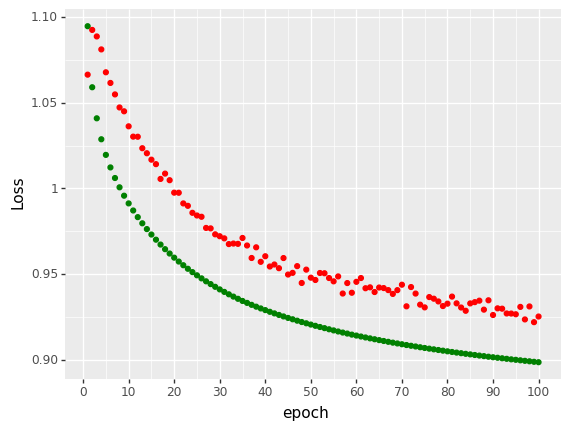

<ggplot: (193319040506)>

In [ ]:
from keras.regularizers import l2
from plotnine import ggplot, aes, geom_point, scale_x_continuous, ylab
import pandas as pd
import numpy as np

def plot_loss(history):
    loss_df = pd.DataFrame({
        'train_loss': history.history['loss'],
        'val_loss': history.history['val_loss']
    })
    loss_df = loss_df.assign(epoch = np.arange(1, len(loss_df['train_loss']) + 1))

    p = (
        ggplot(loss_df) +
        geom_point(aes(x='epoch', y='train_loss'), color='green') +
        geom_point(aes(x='epoch', y='val_loss'), color='red') +
        scale_x_continuous(breaks = np.arange(0, 150, 10)) +
        ylab("Loss")
    )
    return p

# Class Weights
sample_weights = class_weight.compute_sample_weight('balanced', y7_train_cw)
sample_weights[y7_train_cw == 0] *= 2 

# Custom Learning Rate
custom_adam = Adam(learning_rate=0.00001)

oversized_nn7 = Sequential()
oversized_nn7.add(Dense(60, input_dim=X7_train_cw.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
oversized_nn7.add(Dense(40, activation='relu', kernel_regularizer=l2(0.001)))
oversized_nn7.add(Dense(15, activation='relu', kernel_regularizer=l2(0.001)))
oversized_nn7.add(Dense(1, activation='sigmoid'))
oversized_nn7.compile(loss="binary_crossentropy", optimizer=custom_adam)

history_oversized_nn7 = oversized_nn7.fit(X7_train_cw, y7_train_cw, epochs=100, batch_size = 100, sample_weight=sample_weights,  validation_data=(X7_val_cw, y7_val_cw))

# After the model has been trained, plot the loss
plot_loss(history_oversized_nn7)


The adjustment of the learning rate has significantly unscattered the validation loss. Moreover, we see that the validation losses are some what parallel to the training losses. However, the validation loss is far less than the training loss in the first 5 epochs, this might be due to the L2 regularization. So, we can try to tune this by decreasing the L2 factor.

Epoch 1/100
1401/1401 [==============================] - 10s 6ms/step - loss: 1.1114 - val_loss: 1.0689
Epoch 2/100
1401/1401 [==============================] - 7s 5ms/step - loss: 1.0711 - val_loss: 1.0876
Epoch 3/100
1401/1401 [==============================] - 9s 6ms/step - loss: 1.0475 - val_loss: 1.0818
Epoch 4/100
1401/1401 [==============================] - 6s 4ms/step - loss: 1.0304 - val_loss: 1.0667
Epoch 5/100
1401/1401 [==============================] - 8s 5ms/step - loss: 1.0180 - val_loss: 1.0552
Epoch 6/100
1401/1401 [==============================] - 6s 5ms/step - loss: 1.0089 - val_loss: 1.0473
Epoch 7/100
1401/1401 [==============================] - 7s 5ms/step - loss: 1.0021 - val_loss: 1.0366
Epoch 8/100
1401/1401 [==============================] - 8s 6ms/step - loss: 0.9966 - val_loss: 1.0267
Epoch 9/100
1401/1401 [==============================] - 8s 6ms/step - loss: 0.9921 - val_loss: 1.0240
Epoch 10/100
1401/1401 [==============================] - 8s 6ms/step - 

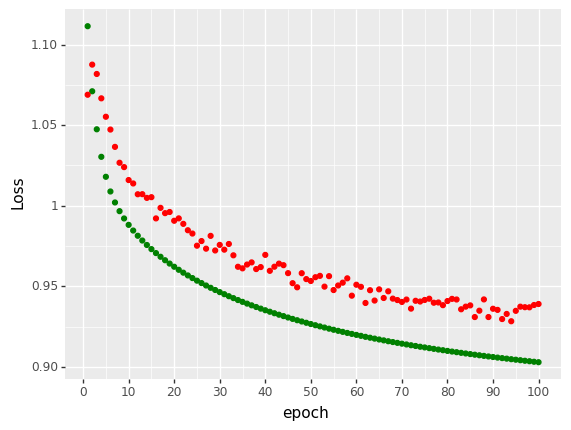

<ggplot: (193318853157)>

In [ ]:
from keras.regularizers import l2
from plotnine import ggplot, aes, geom_point, scale_x_continuous, ylab
import pandas as pd
import numpy as np

def plot_loss(history):
    loss_df = pd.DataFrame({
        'train_loss': history.history['loss'],
        'val_loss': history.history['val_loss']
    })
    loss_df = loss_df.assign(epoch = np.arange(1, len(loss_df['train_loss']) + 1))

    p = (
        ggplot(loss_df) +
        geom_point(aes(x='epoch', y='train_loss'), color='green') +
        geom_point(aes(x='epoch', y='val_loss'), color='red') +
        scale_x_continuous(breaks = np.arange(0, 150, 10)) +
        ylab("Loss")
    )
    return p

# Class Weights
sample_weights = class_weight.compute_sample_weight('balanced', y7_train_cw)
sample_weights[y7_train_cw == 0] *= 2

# Custom Learning Rate
custom_adam = Adam(learning_rate=0.00001)

oversized_nn7 = Sequential()
oversized_nn7.add(Dense(60, input_dim=X7_train_cw.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
oversized_nn7.add(Dense(40, activation='relu', kernel_regularizer=l2(0.001)))
oversized_nn7.add(Dense(15, activation='relu', kernel_regularizer=l2(0.001)))
oversized_nn7.add(Dense(1, activation='sigmoid'))
oversized_nn7.compile(loss="binary_crossentropy", optimizer=custom_adam)

history_oversized_nn7 = oversized_nn7.fit(X7_train_cw, y7_train_cw, epochs=100, batch_size = 100, sample_weight=sample_weights,  validation_data=(X7_val_cw, y7_val_cw))

# After the model has been trained, plot the loss
plot_loss(history_oversized_nn7)


In [ ]:
from sklearn.metrics import f1_score

# Class Weights
sample_weights = class_weight.compute_sample_weight('balanced', y7_train_validation_cw)
sample_weights[y7_train_validation_cw == 0] *= 2

# Custom Learning Rate
custom_adam = Adam(learning_rate=0.00001)

final_nn7_cw = Sequential()
final_nn7_cw.add(Dense(60, input_dim=X7_train_cw.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
final_nn7_cw.add(Dense(40, activation='relu', kernel_regularizer=l2(0.001)))
final_nn7_cw.add(Dense(15, activation='relu', kernel_regularizer=l2(0.001)))
final_nn7_cw.add(Dense(1, activation='sigmoid'))
final_nn7_cw.compile(loss="binary_crossentropy", optimizer=custom_adam)
final_nn7_cw.fit(X7_train_validation_cw, y7_train_validation_cw, epochs=50, batch_size = 20, sample_weight=sample_weights, verbose=0)
y_hat_test_nn7 = final_nn7_cw.predict(X7_test_cw)
y_hat_test_nn7 = np.where(y_hat_test_nn7 >= 0.5, 1, 0)
print("The f1 score of the 6th nn model is {}".format(f1_score(y7_test_cw, y_hat_test_nn7)))

1368/1368 [==============================] - 2s 1ms/step
The f1 score of the 6th nn model is 0.4441465225641449


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Get the predictions
y_hat_test_nn7 = final_nn7_cw.predict(X7_test_cw)
y_hat_test_nn7_class = np.where(y_hat_test_nn7 >= 0.5, 1, 0)

# Classification report
print("Classification Report:\n", classification_report(y7_test_cw, y_hat_test_nn7_class))

# ROC AUC score
print("ROC AUC Score:", roc_auc_score(y7_test_cw, y_hat_test_nn7))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y7_test_cw, y_hat_test_nn7_class))


1368/1368 [==============================] - 2s 2ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.19      0.90      0.31      6708
           1       0.94      0.29      0.44     37055

    accuracy                           0.38     43763
   macro avg       0.56      0.60      0.38     43763
weighted avg       0.83      0.38      0.42     43763

ROC AUC Score: 0.6935709979854762
Confusion Matrix:
 [[ 6046   662]
 [26288 10767]]


The classification report of model 7 is almost identical to model 6. It is perhaps, slightly better at classifying fully paid loans when looking at the confusion matrix. 

We will now use this model and perform a grid search in an attempt to find the best hyper parameters.

from scikeras.wrappers import KerasClassifier


# function that creates the model
# note that we pass the number of neurons as a parameter to the network
def create_model(neurons=1):
    nn_model7 = Sequential()
    nn_model7.add(Dense(neurons, input_dim=X7_train_cw.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
    nn_model7.add(Dense(40, activation='relu', kernel_regularizer=l2(0.001)))
    nn_model7.add(Dense(15, activation='relu', kernel_regularizer=l2(0.001)))
    nn_model7.add(Dense(1, activation='sigmoid'))

    # Define custom learning rate
    custom_adam = Adam(learning_rate=0.00001)
    
    nn_model7.compile(loss='binary_crossentropy', optimizer=custom_adam)
    return nn_model7

seed = 1234
np.random.seed(seed)

# turn the keras model into a sklearn compatible model
# note that the neurons parameter needs to be specified in the interface of KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0, neurons=1)